# 로지스틱 회귀 연구과제 

> https|//www.kaggle.com/datasets/blastchar/telco-customer-churn

로지스틱 회귀를 활용하면 고객 유지를 위한 행동을 예측합니다. 관련된 모든 고객 데이터를 분석하고 집중적인 고객 유지 프로그램을 개발할 수 있다.

다음의 데이터의 각 행은 고객을 나타내고, 각 열에는 메타데이터 열에 설명된 고객 속성이 포함되어 있으며 데이터셋에는 다음과 같은 정보들이 포함되어 있따.

- 지난 달에 떠난 고객 - 해당 열은 Churn이라고 함(종속변수)
- 각 고객이 등록한 서비스 – 전화, 다중 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 - 보호, 기술 지원, TV 및 영화 스트리밍
- 고객 계정 정보 - 고객 유지 기간, 계약, 결제 방법, 전자 청구서, 월별 요금, 총 요금
- 고객에 대한 인구통계 정보 – 성별, 연령대, 파트너 및 부양가족 유무

상세 메타 데이터는 아래와 같습니다.

| 변수명 | 설명 | 비고 |
|---|---|---|
| customerID | 소비자의 식별자 | |
| gender | 성별 | |
| SeniorCitizen | 노인인지의 여부 | |
| Partner | 배우자의 유무 | |
| Dependents | 자녀의 유무 | |
| tenure | 고객의 가입 기간 | | 개월 수 |
| PhoneService | 휴대폰 서비스를 가입 했는지의 여부 | |
| MultipleLines | 여러 개의 통신선을 서비스 받고 있는지의 여부 | Yes, No, No phone service / 휴대폰 서비스를 가입한 고객만 해당됨. |
| InternetService | 인터넷 서비스 제공자 | DSL, Fiber optic, No |
| OnlineSecurity | 온라인 보안 서비스를 가입 했는지의 여부 | Yes, No, No internet service / 인터넷 서비스를 가입한 고객만 해당됨. |
| OnlineBackup | 온라인 백업 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| TechSupport | 기술 서포트 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| StreamingTV | TV 스트리밍 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| StreamingMovies | 영화 스트리밍 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| Contract | 계약 유형 | Month-to-month, One year, Two year |
| PaperlessBilling | 전자 고지서 여부 | |
| PaymentMethod | 요금 지불 방법 | Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic) |
| MonthlyCharges | 매달 고객에게 청구되는 금액 | |
| TotalCharges | 고객에게 청구된 총 금액 | |
| Churn | 지난 한 달 내에 떠난 고객인지의 여부 | |



## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from help_a.util import *
from help_a.plot import *
from help_a.analysis import *
from help_a.classification import *

### [2] 데이터 가져오기

In [2]:
origin = my_read_csv("Telco-Customer-Churn.csv", categories=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'])
origin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
origin['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [4]:
def remove_quotes_and_convert_to_numeric(value):
    if value.strip() == '':
        return None  # 빈 문자열인 경우 None으로 처리하거나 원하는 값으로 대체
    else:
        return float(value.replace("'", ""))
# 데이터프레임의 특정 칼럼에 함수를 적용하여 값을 처리
origin['TotalCharges'] = origin['TotalCharges'].apply(remove_quotes_and_convert_to_numeric)


In [5]:
origin['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

> customerID는 의미없는 변수로 판단

In [48]:
df = origin.copy()
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## #02. 탐색적 데이터 분석

### [1] 성별에 따른 데이터 분포 확인

이항분류의 경우 커널밀도 함수등으로 종속변수 따른 데이터 분포를 확인

다항분류의 경우 산점도 그래프를 통해 종속변수에 따른 데이터 군집이 존재 하는지를 확인

In [6]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### [2]  종속 변수

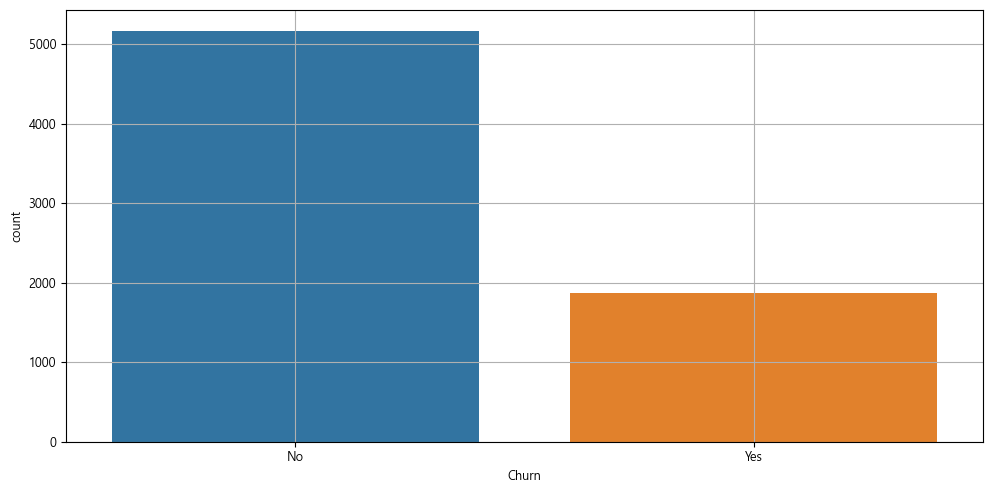

In [7]:
my_countplot(origin, 'Churn')

>남아있는 고객이 떠난 고객보다 많다

### [2]  연속형 변수

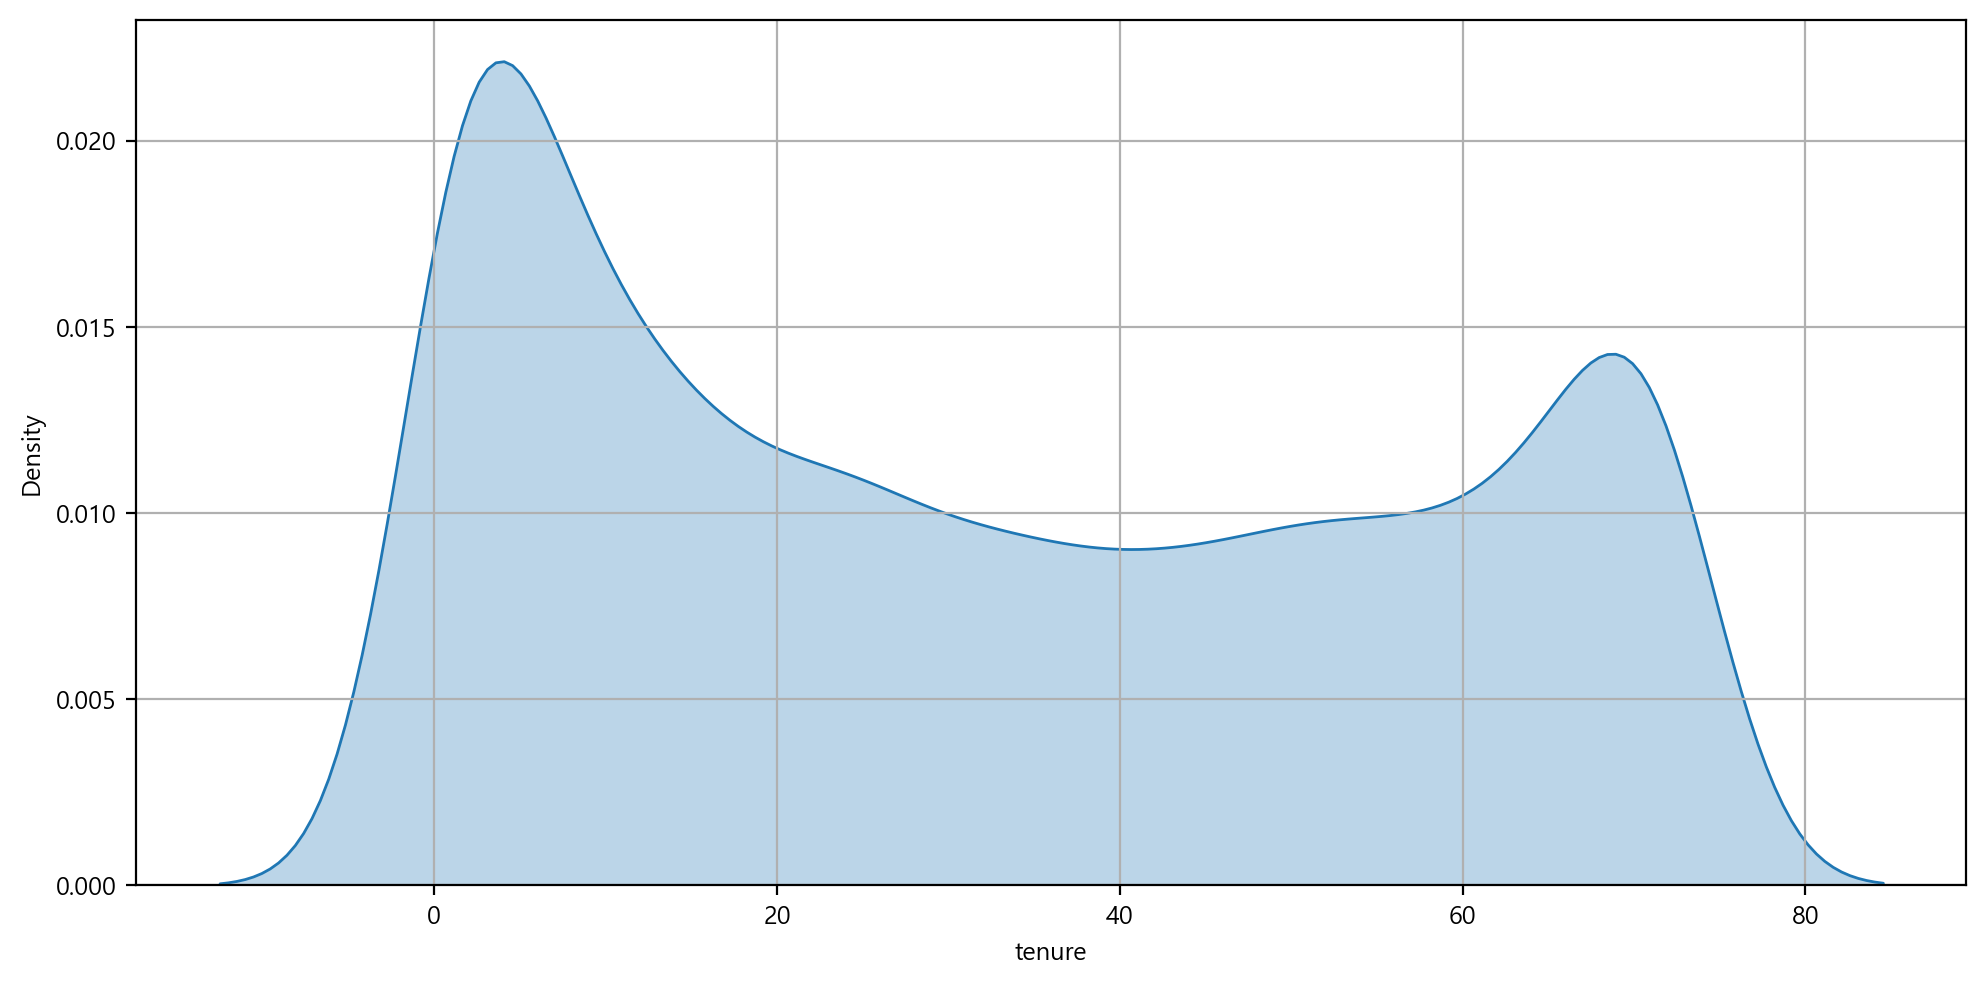

In [8]:
my_kdeplot(origin, 'tenure', fill=True, dpi=200)

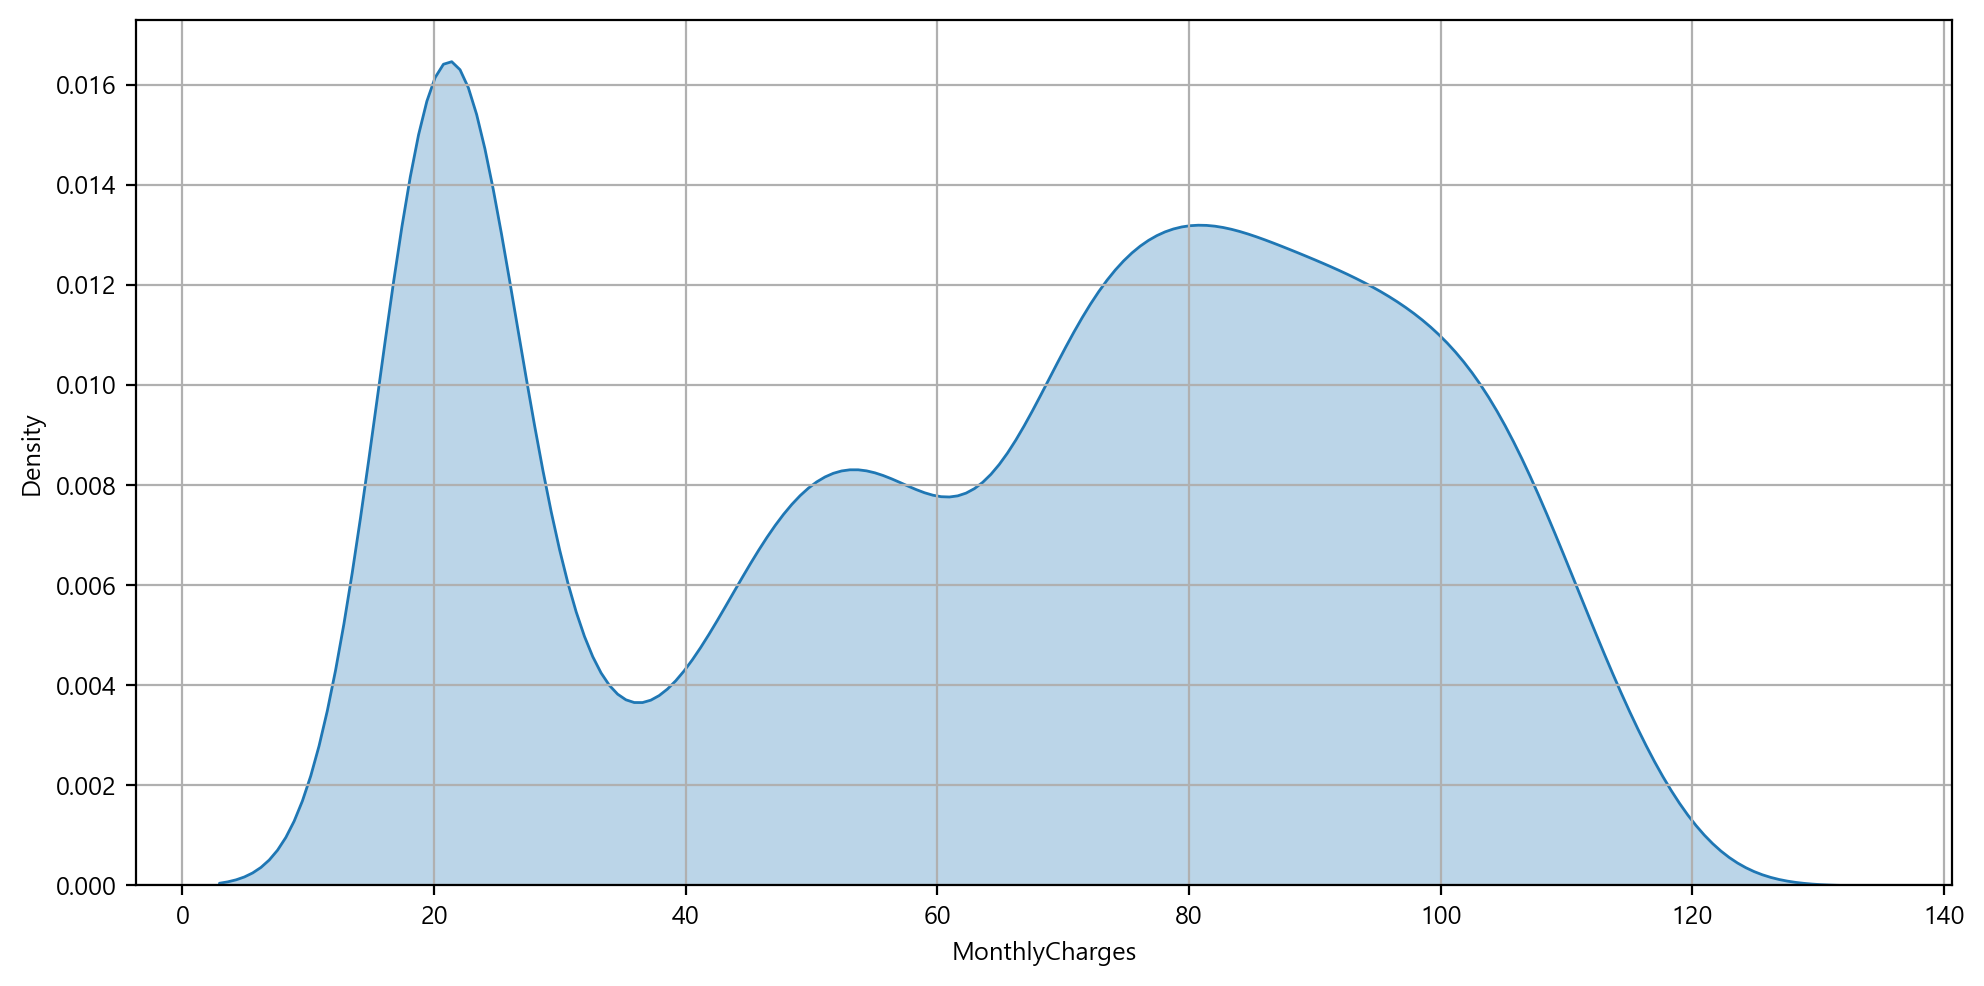

In [9]:
my_kdeplot(origin, 'MonthlyCharges', fill=True, dpi=200)

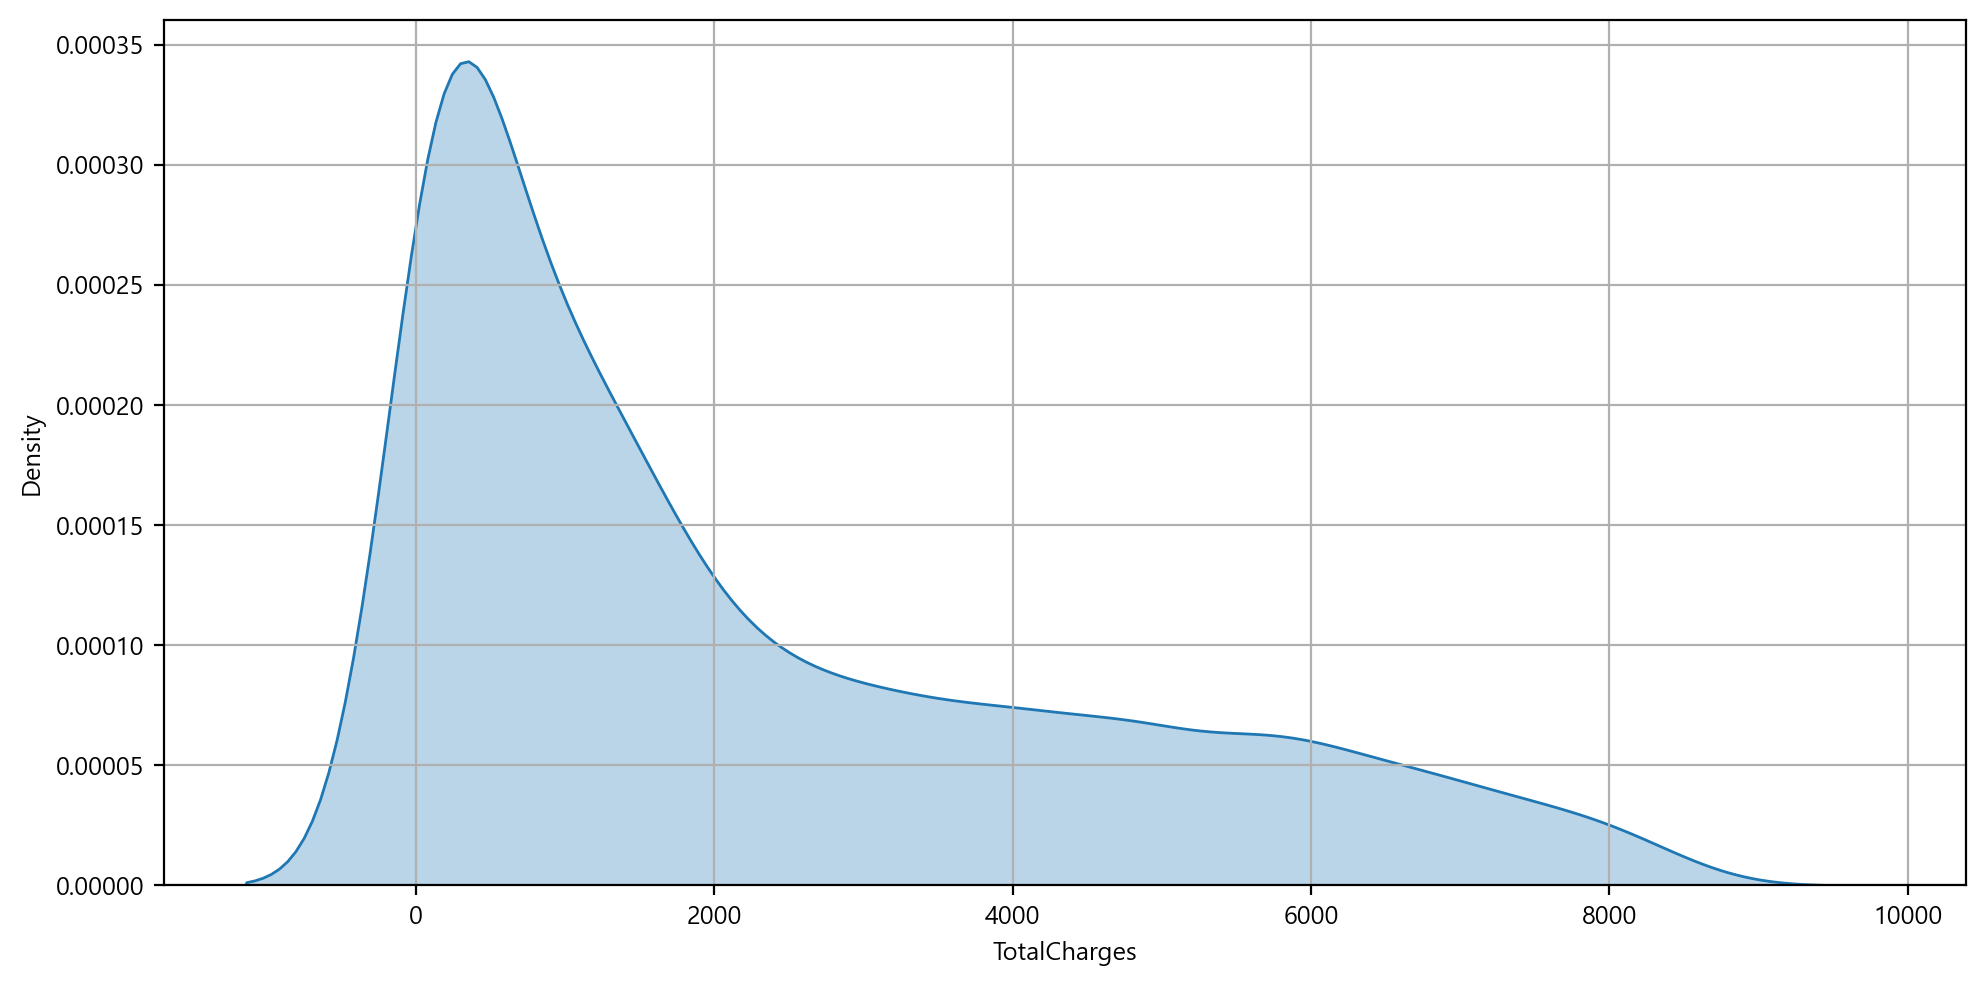

In [10]:
my_kdeplot(origin, 'TotalCharges', fill=True, dpi=200)

### [3] 명목형 변수

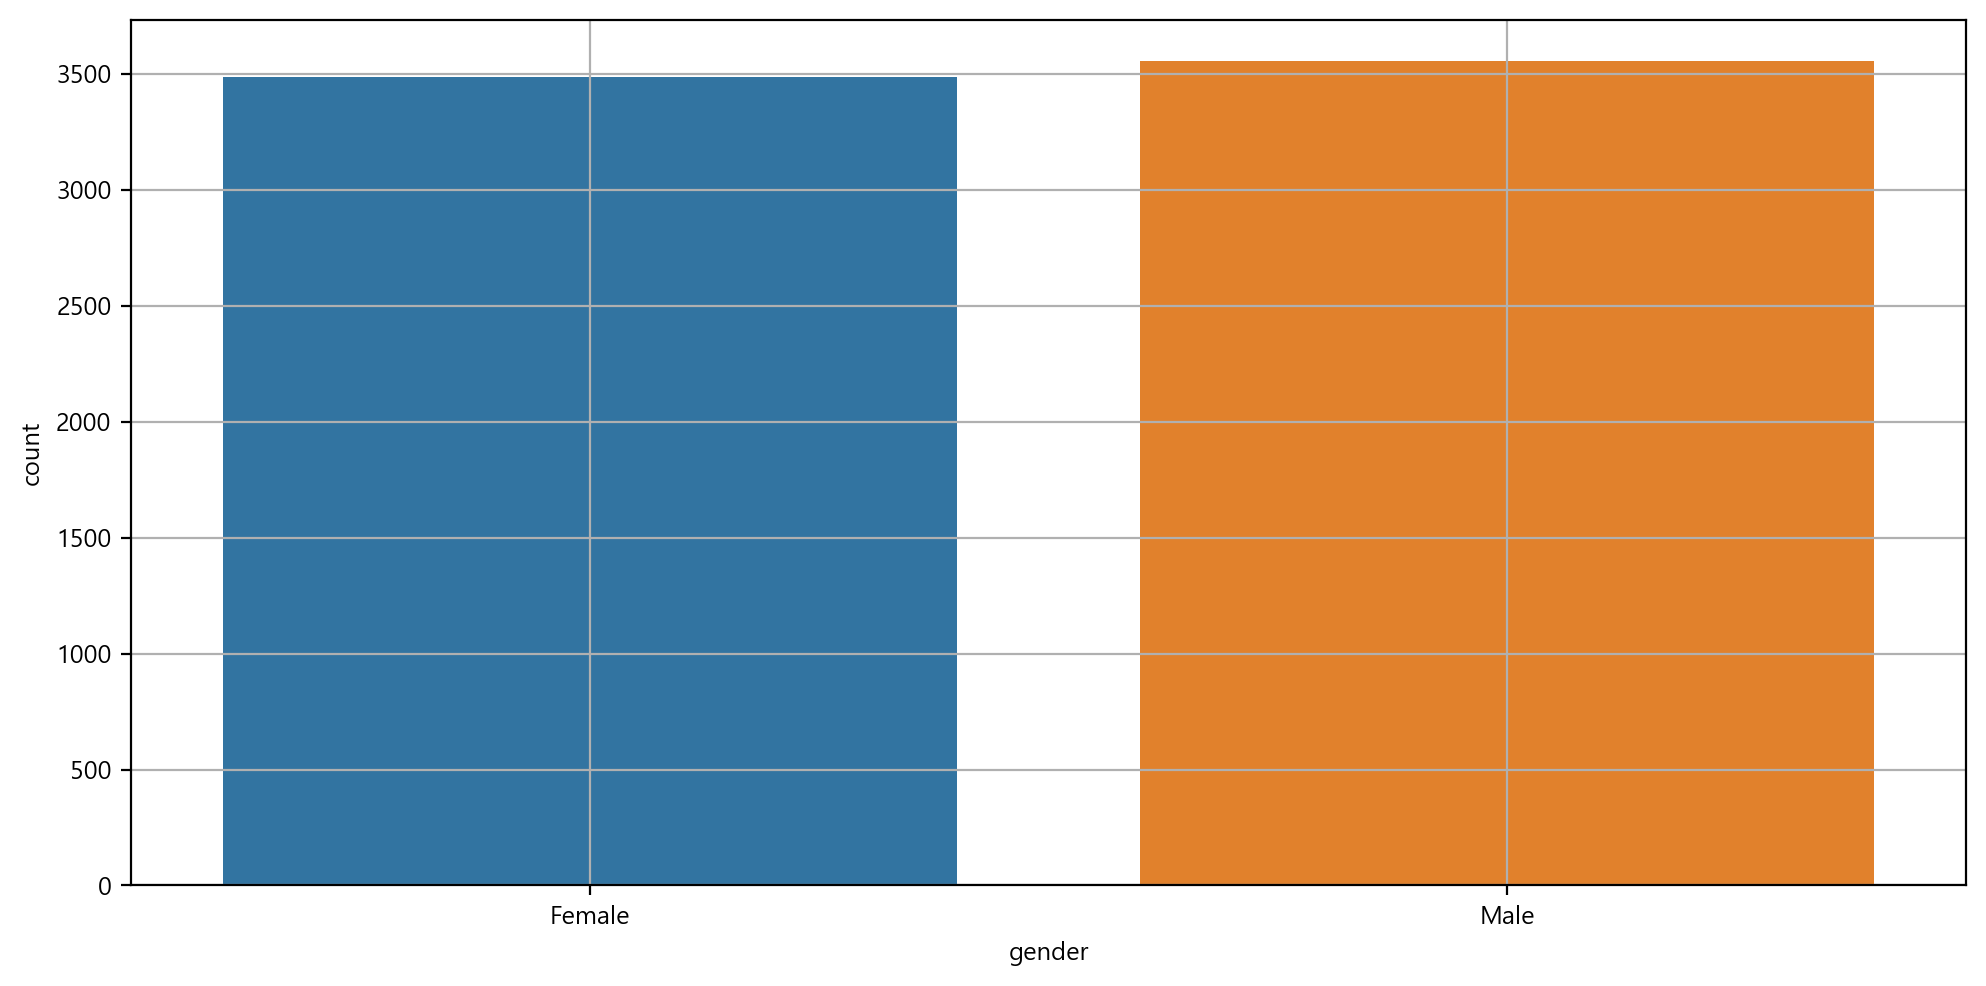

In [11]:
my_countplot(origin, 'gender', dpi=200)

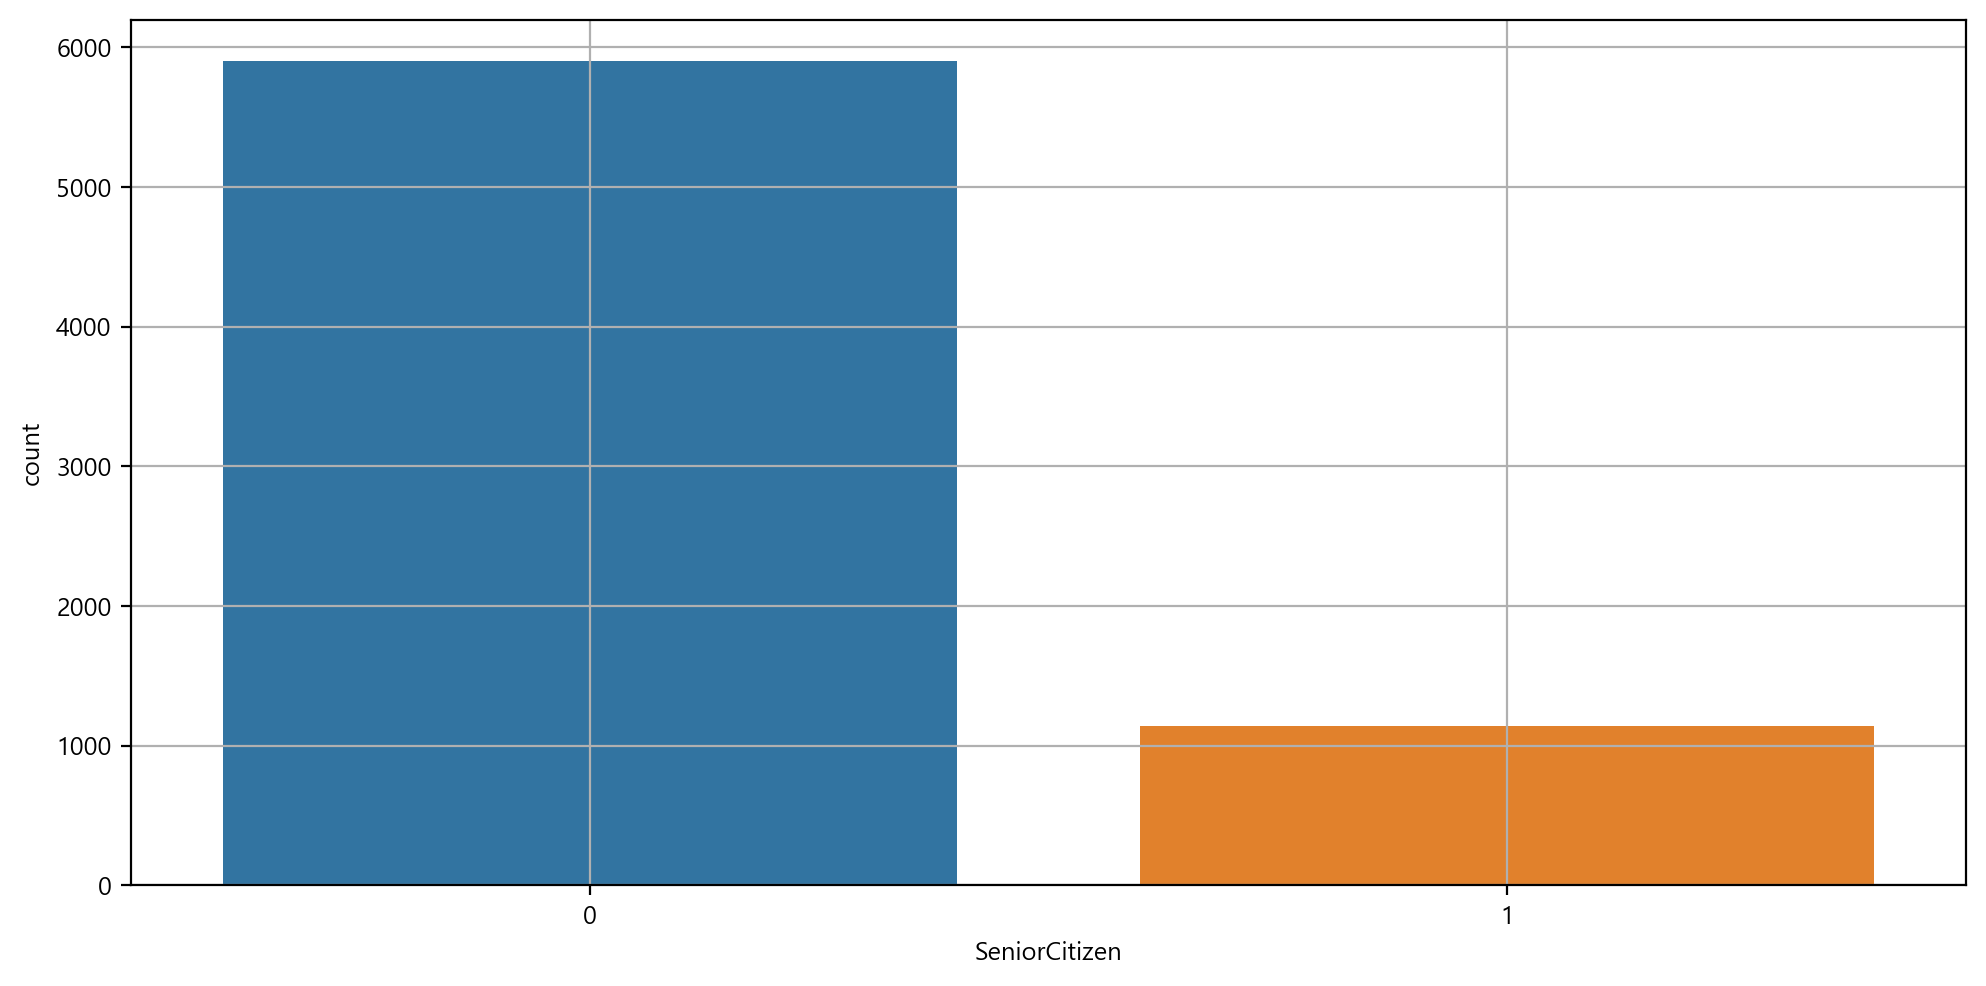

In [12]:
my_countplot(origin, 'SeniorCitizen', dpi=200)

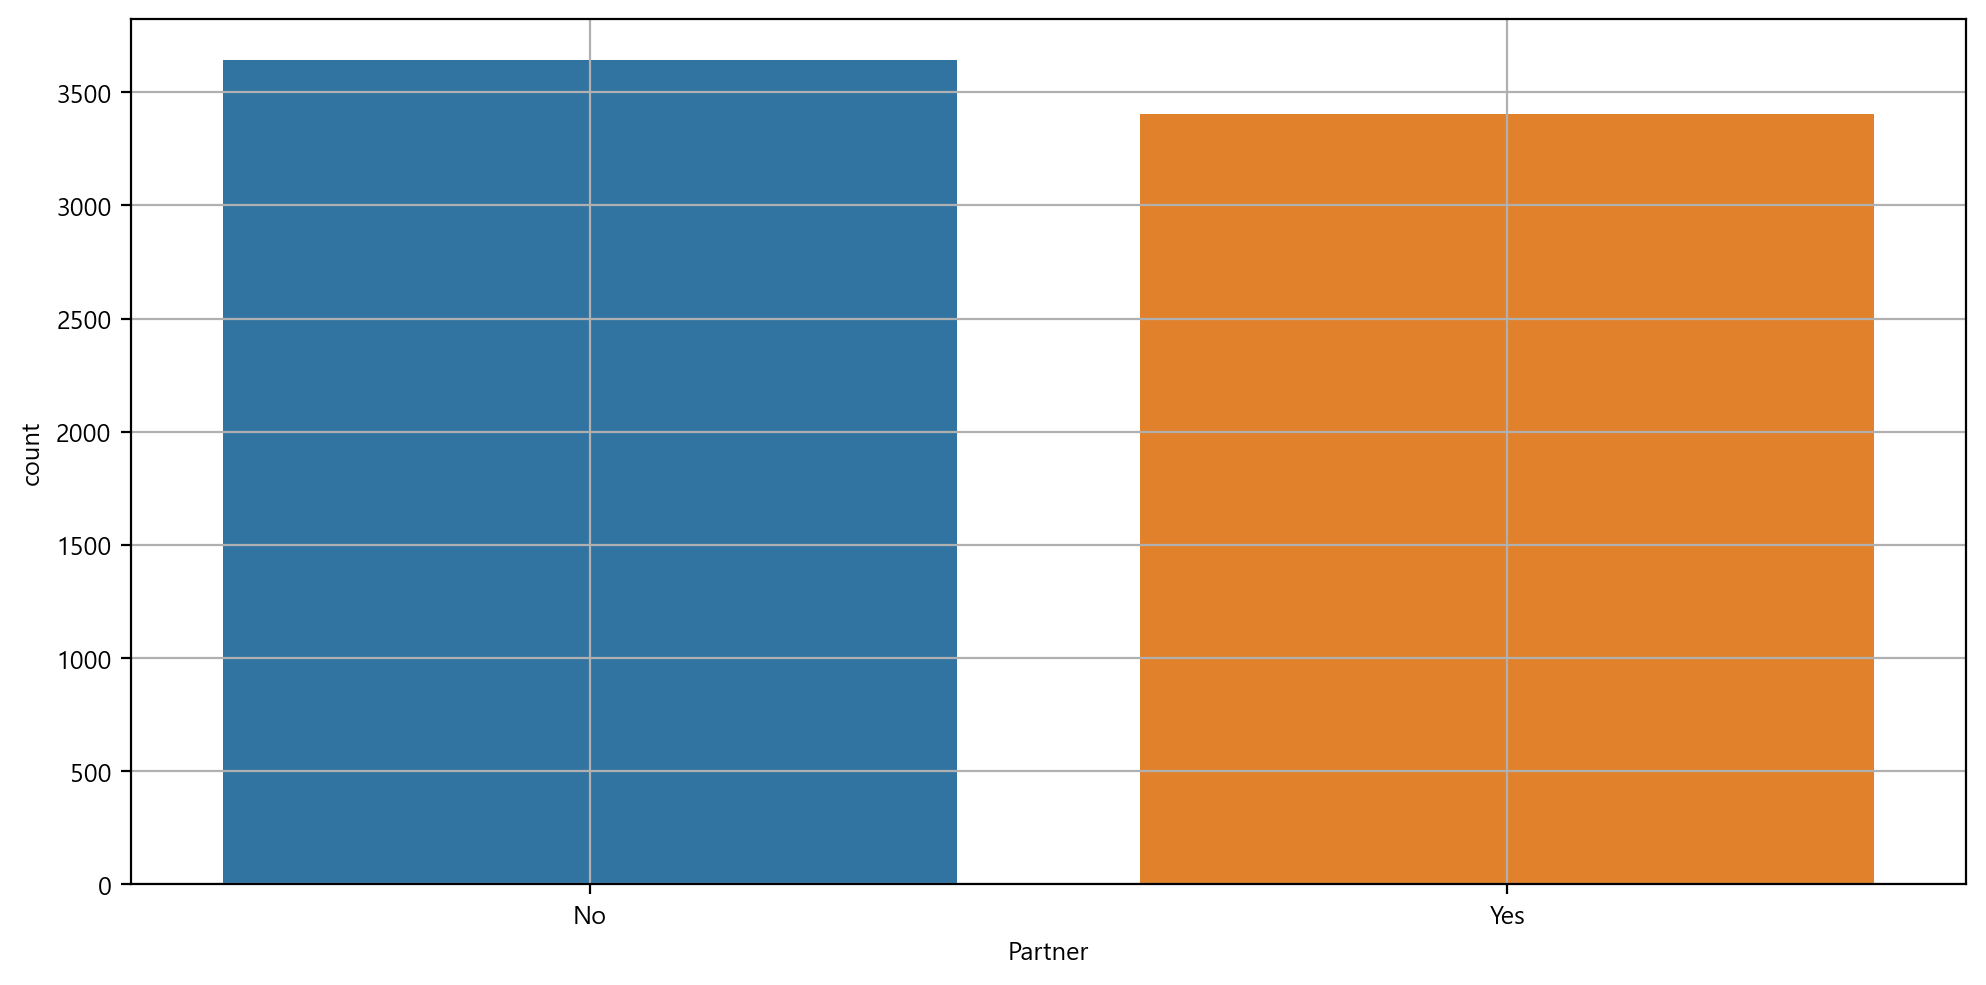

In [13]:
my_countplot(origin, 'Partner', dpi=200)

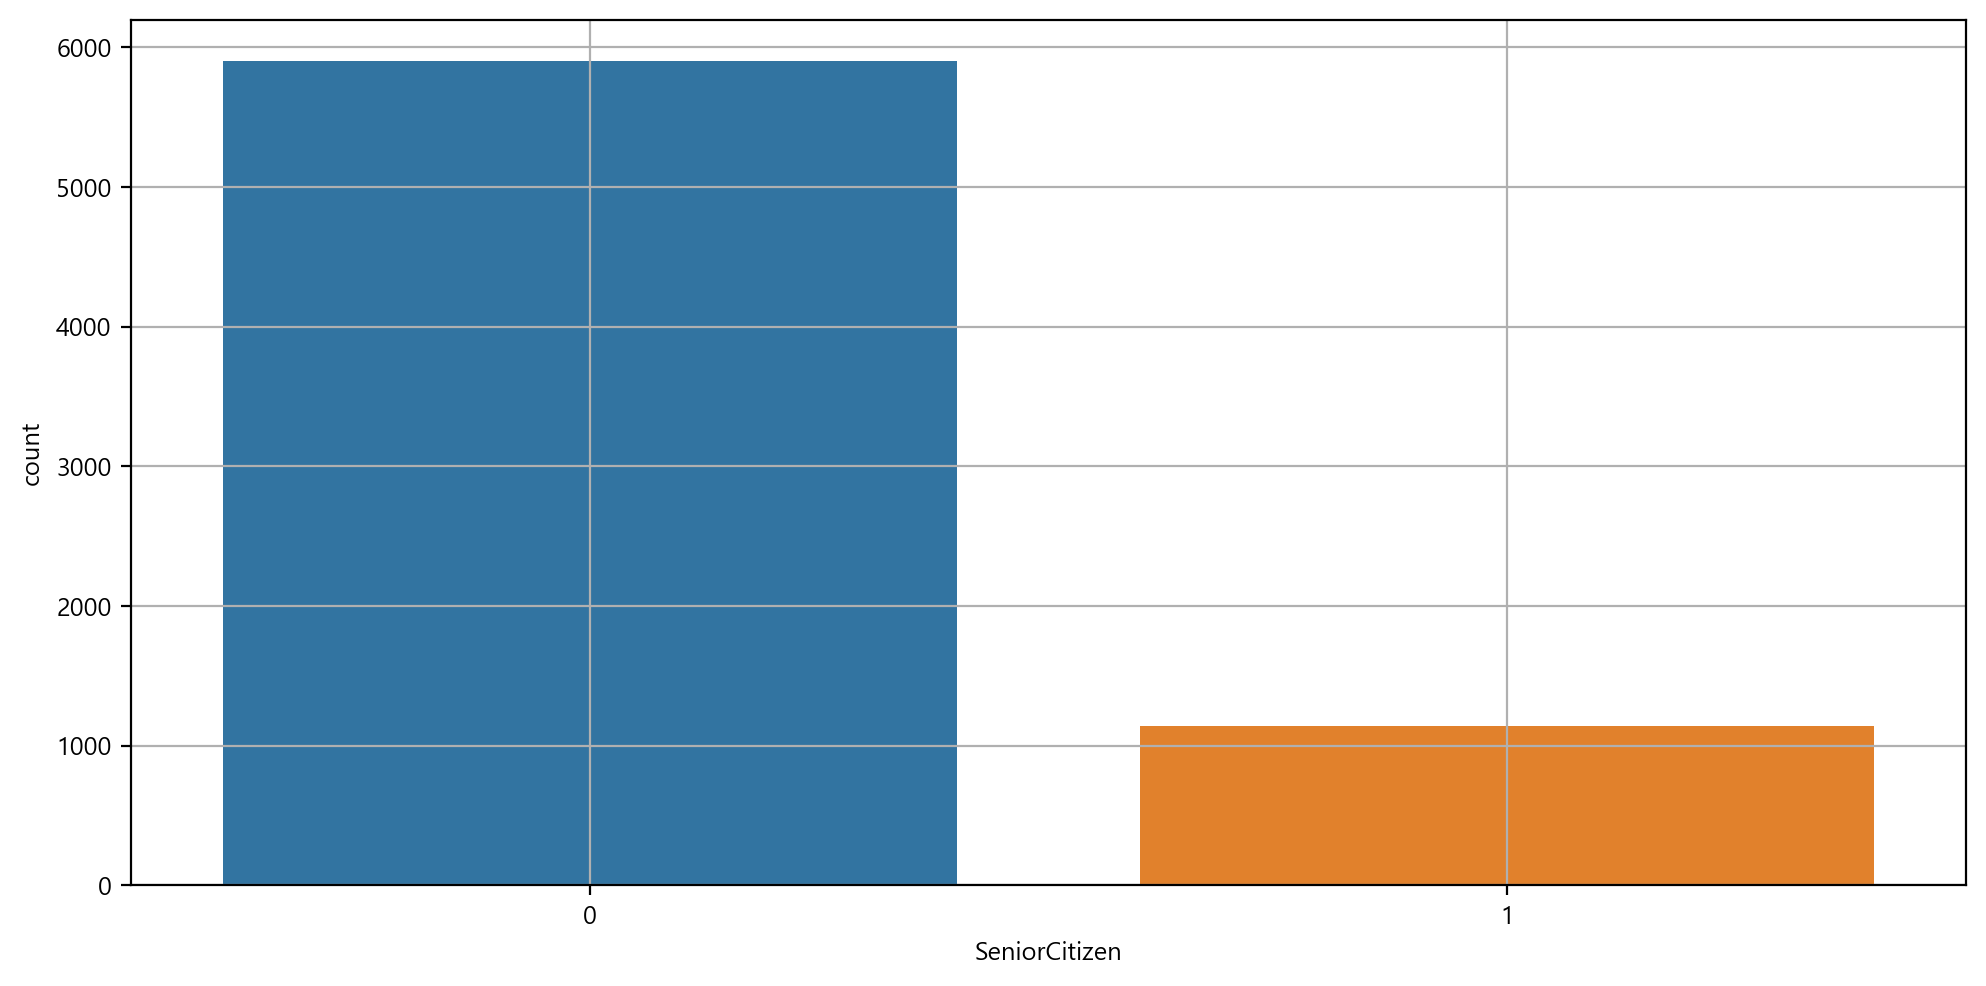

In [14]:
my_countplot(origin, 'SeniorCitizen', dpi=200)

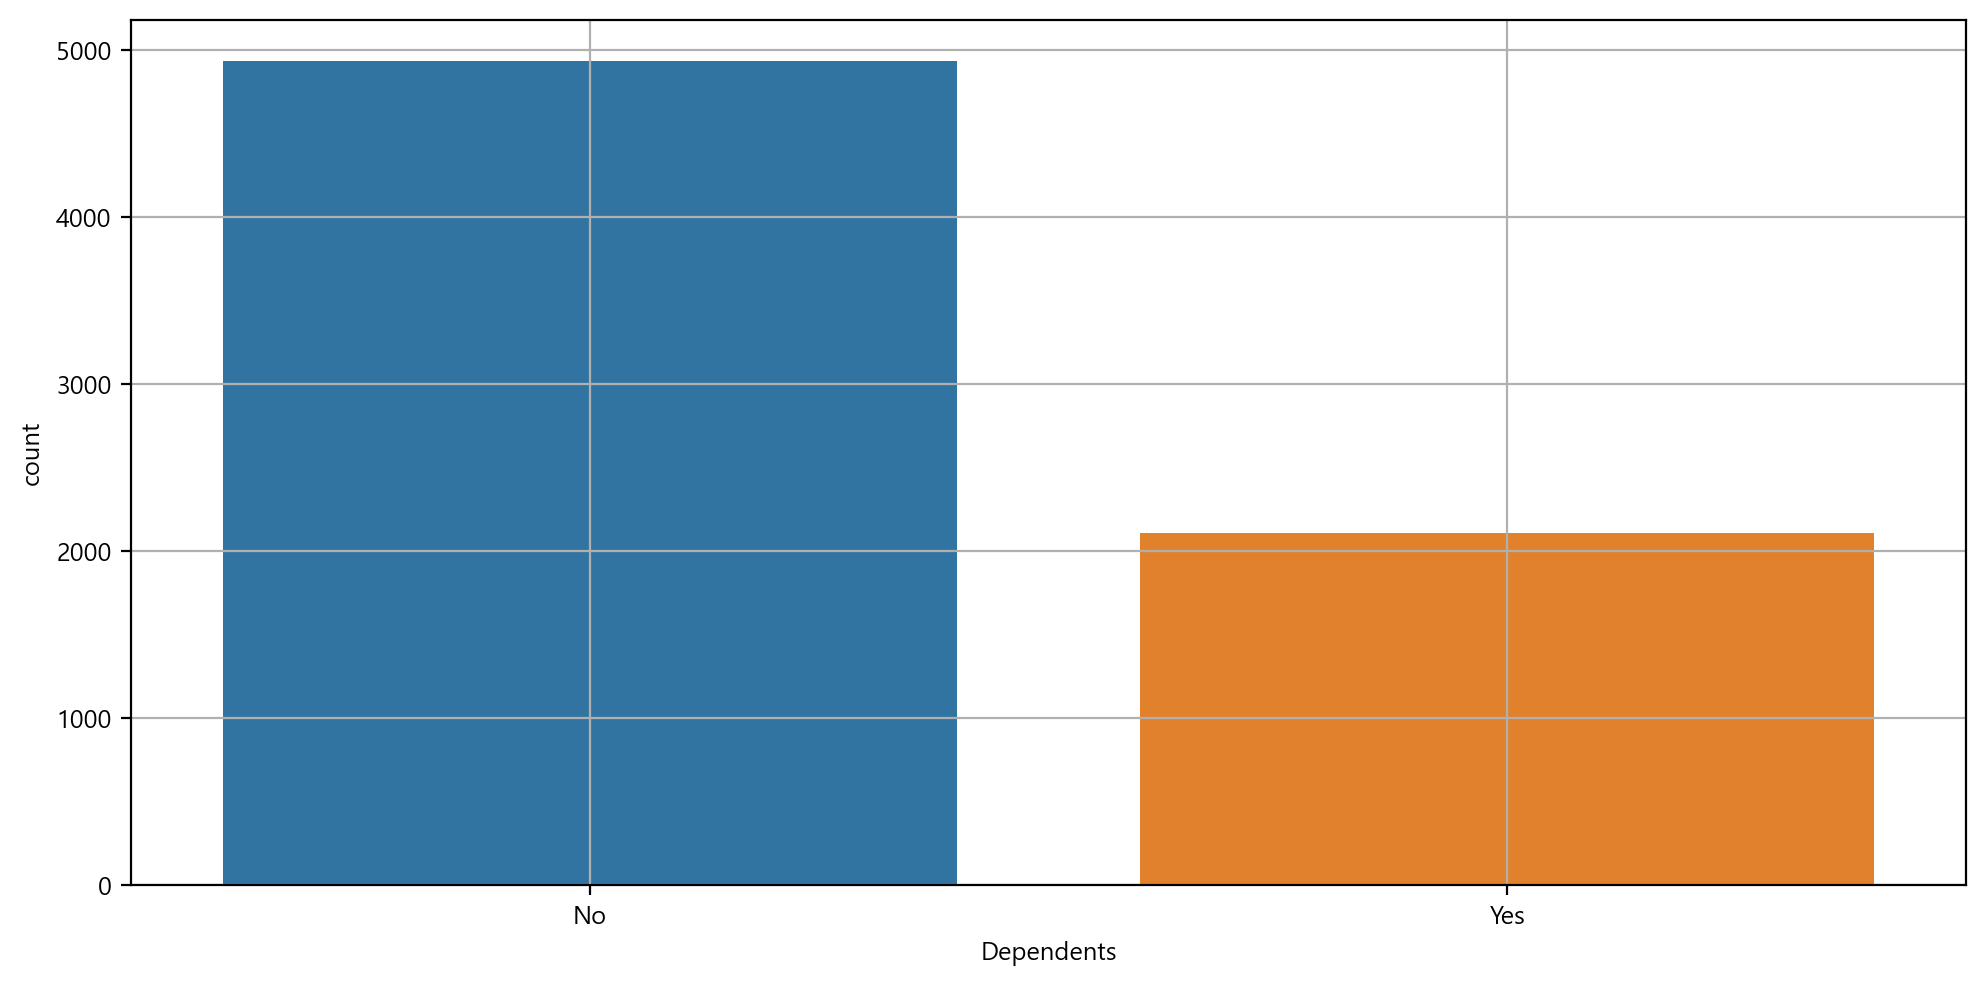

In [15]:
my_countplot(origin, 'Dependents', dpi=200)

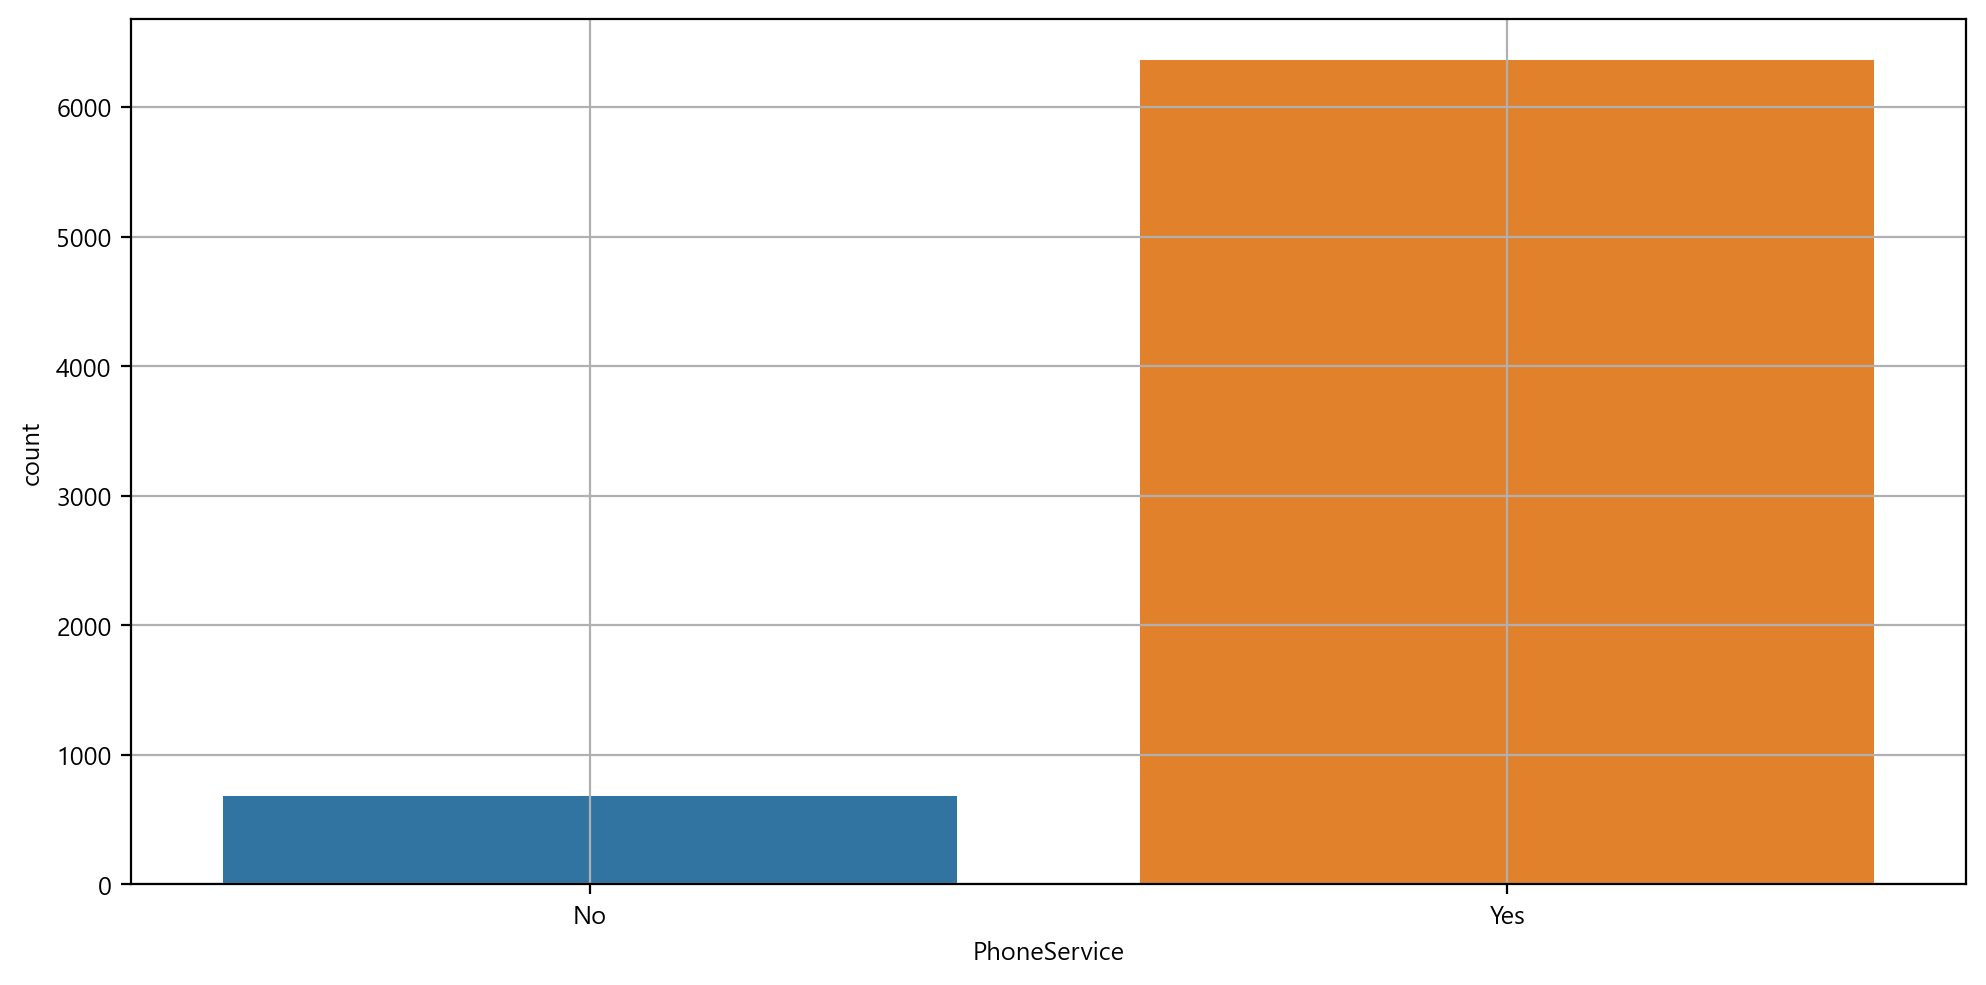

In [16]:
my_countplot(origin, 'PhoneService', dpi=200)

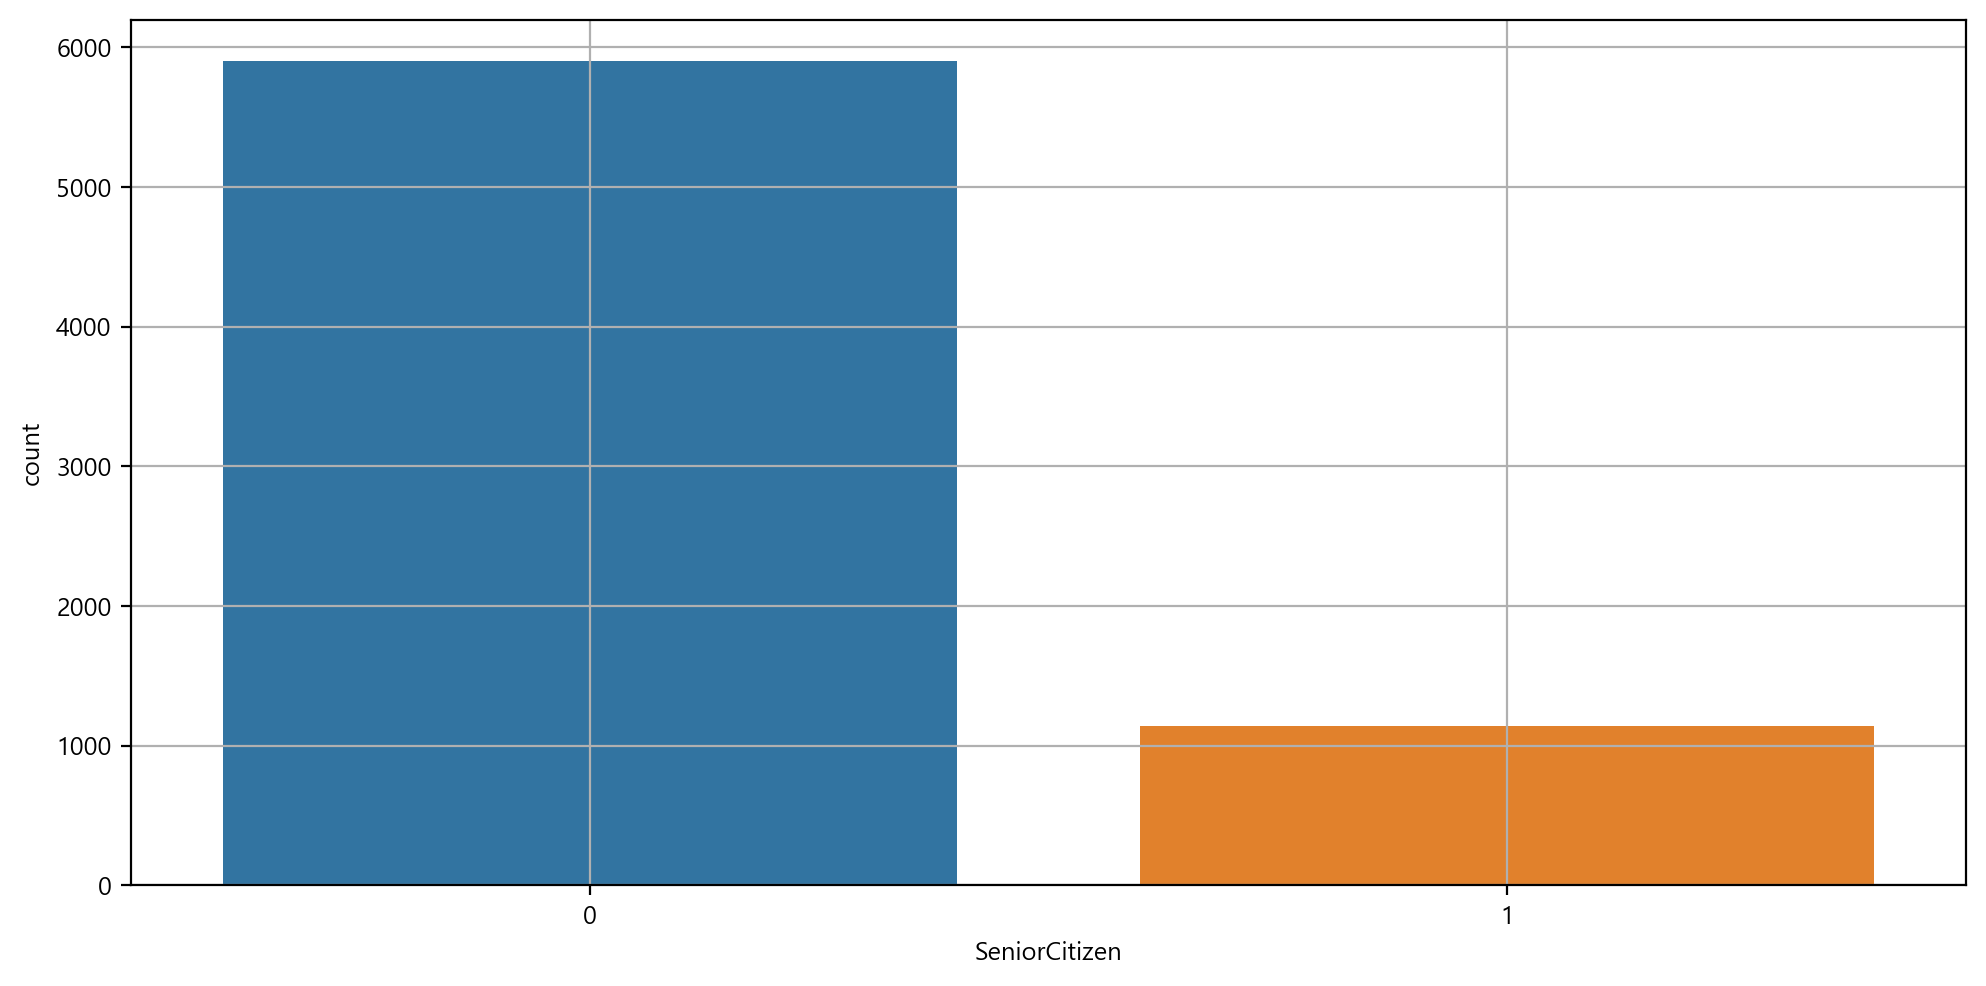

In [17]:
my_countplot(origin, 'SeniorCitizen', dpi=200)

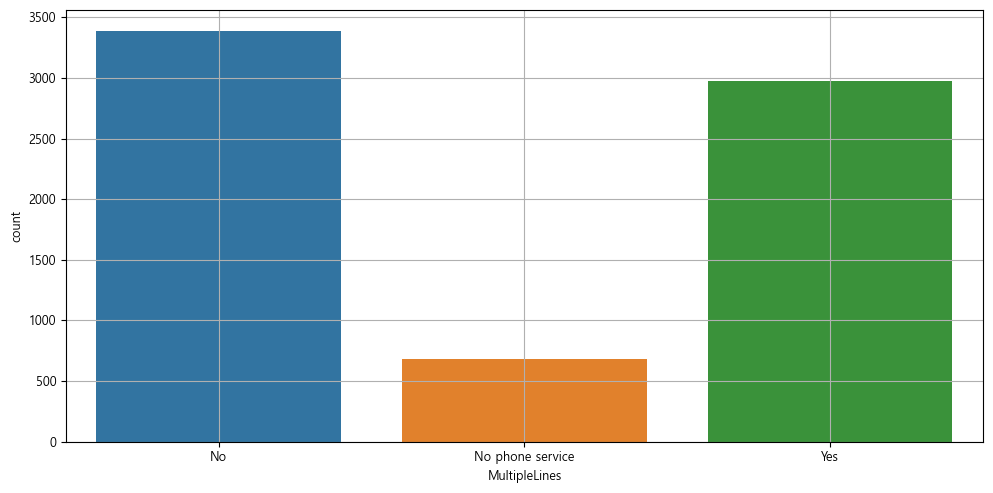

In [18]:
my_countplot(origin, 'MultipleLines', dpi=100)

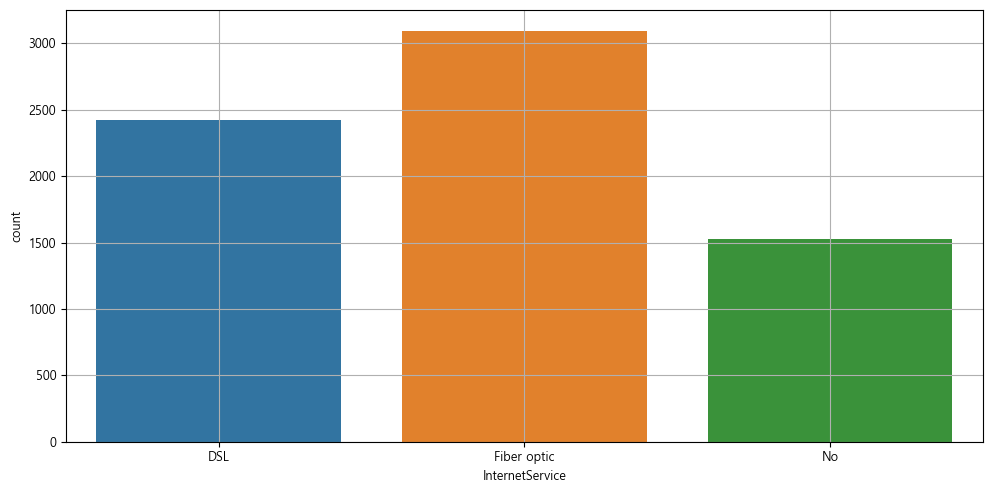

In [19]:
my_countplot(origin, 'InternetService', dpi=100)

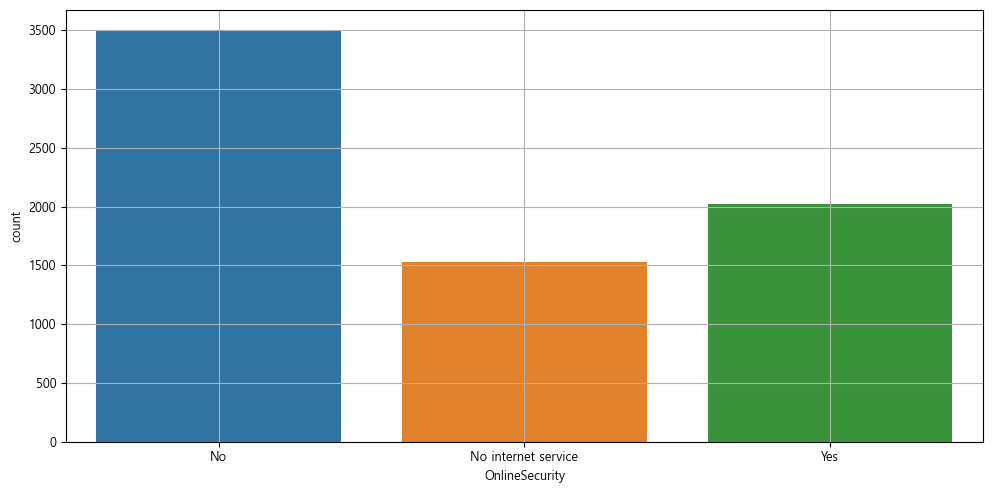

In [20]:
my_countplot(origin, 'OnlineSecurity', dpi=100)

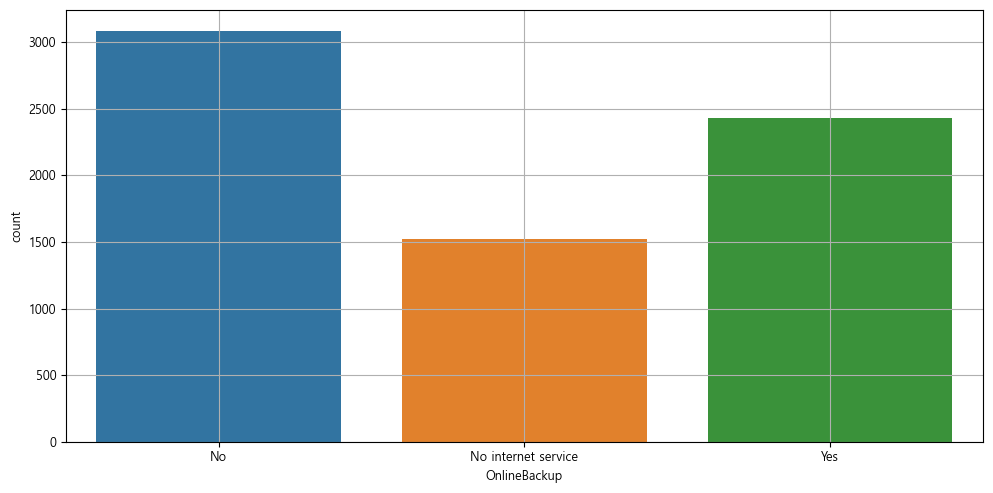

In [21]:
my_countplot(origin, 'OnlineBackup', dpi=100)

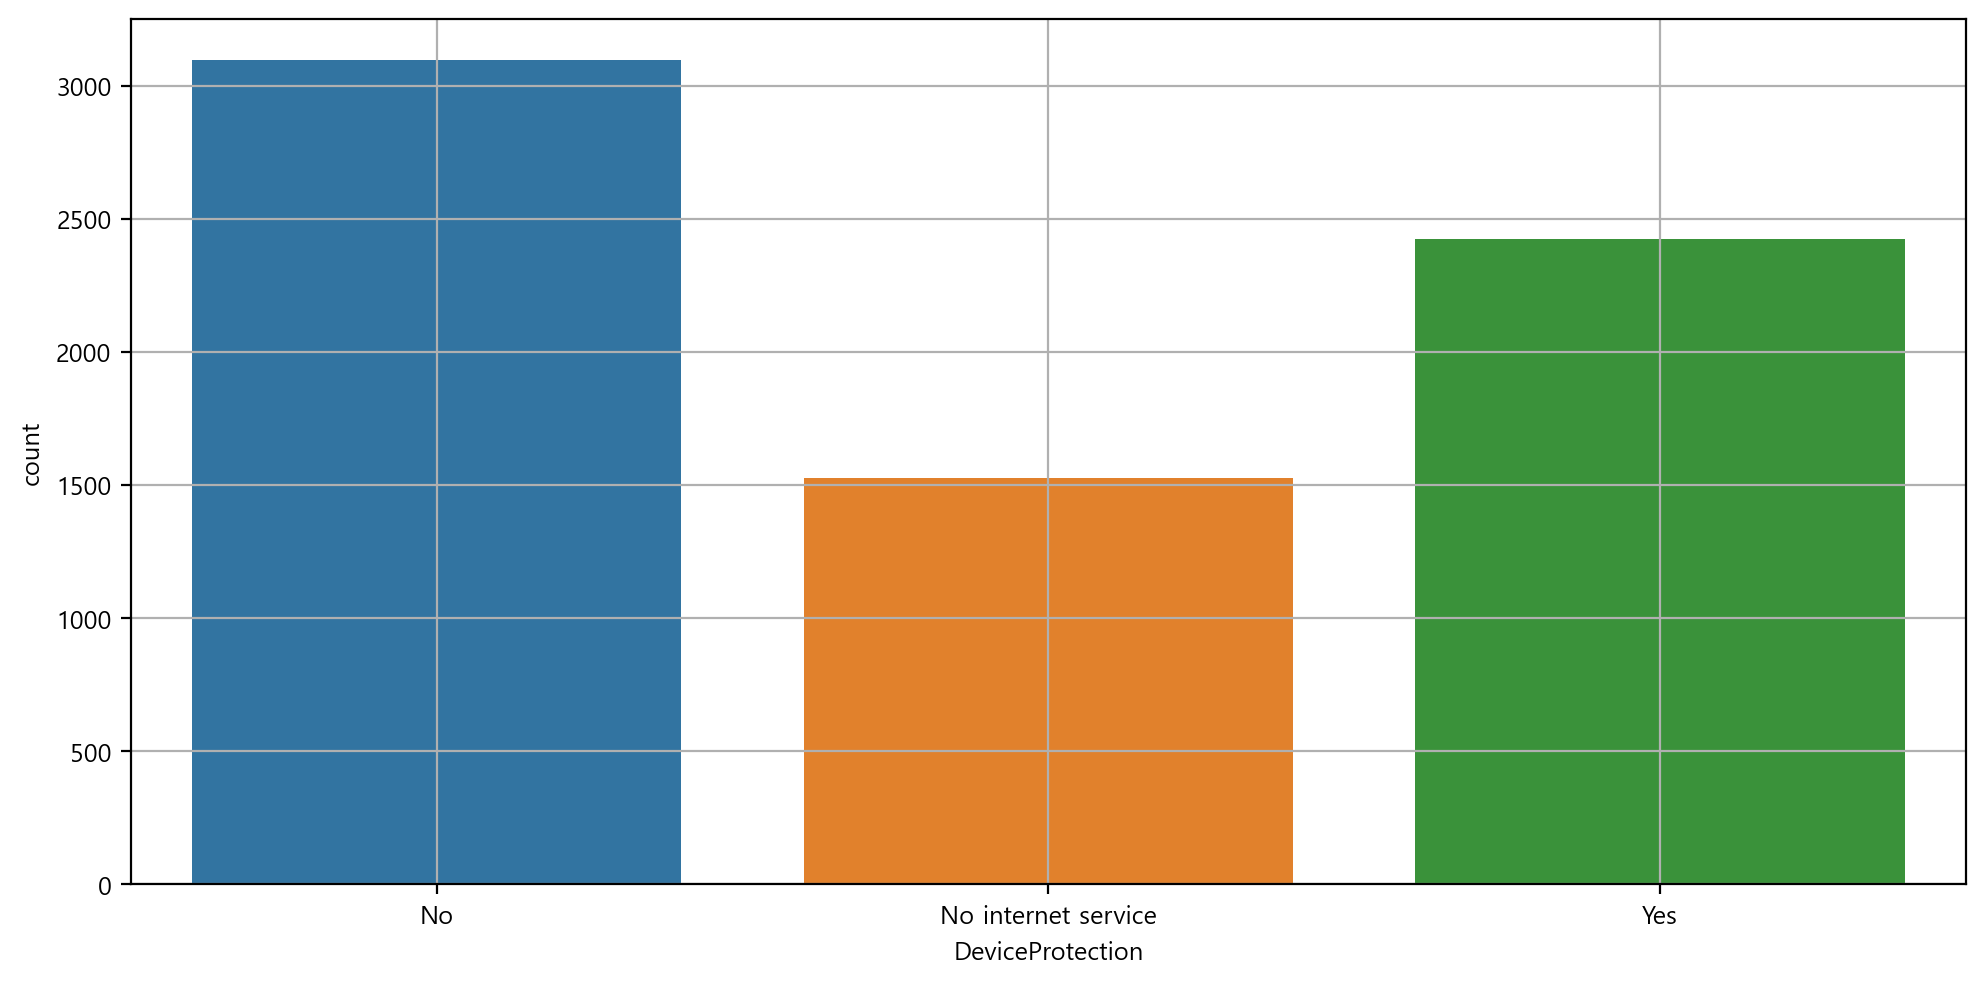

In [22]:
my_countplot(origin, 'DeviceProtection', dpi=200)

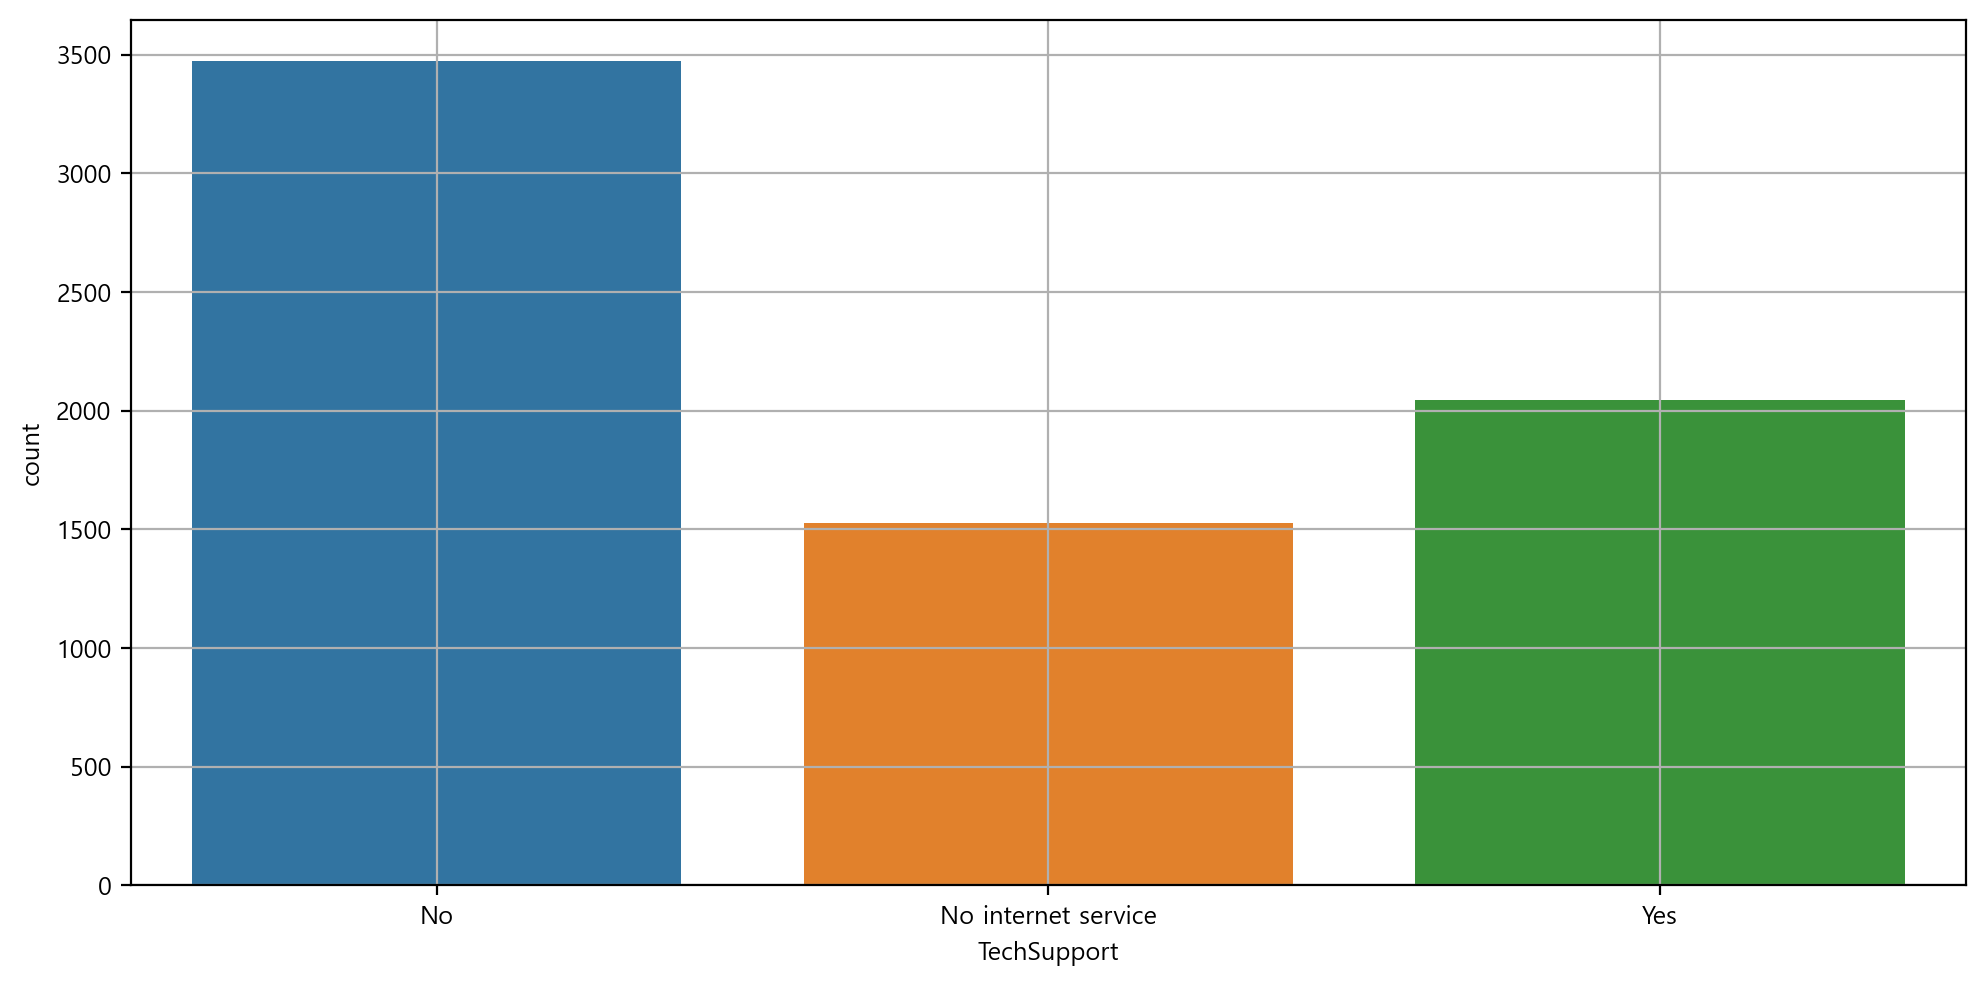

In [23]:
my_countplot(origin, 'TechSupport', dpi=200)

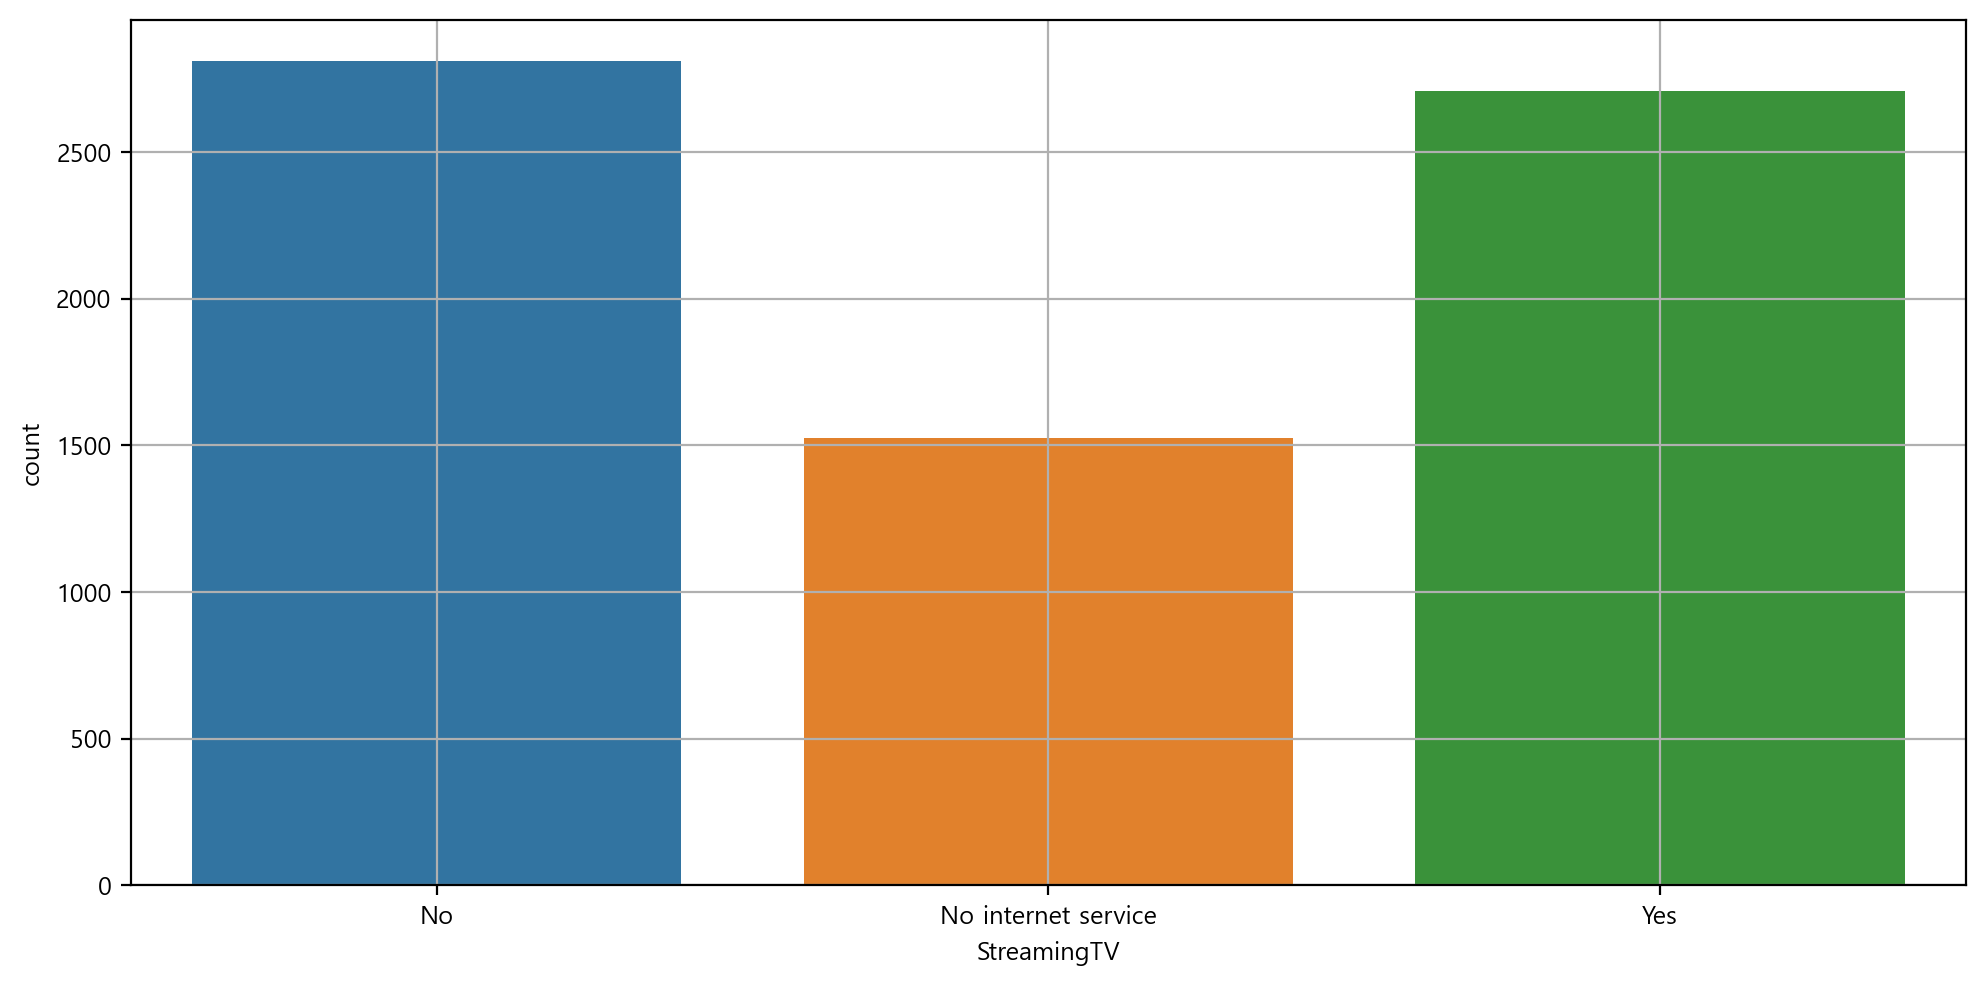

In [24]:
my_countplot(origin, 'StreamingTV', dpi=200)

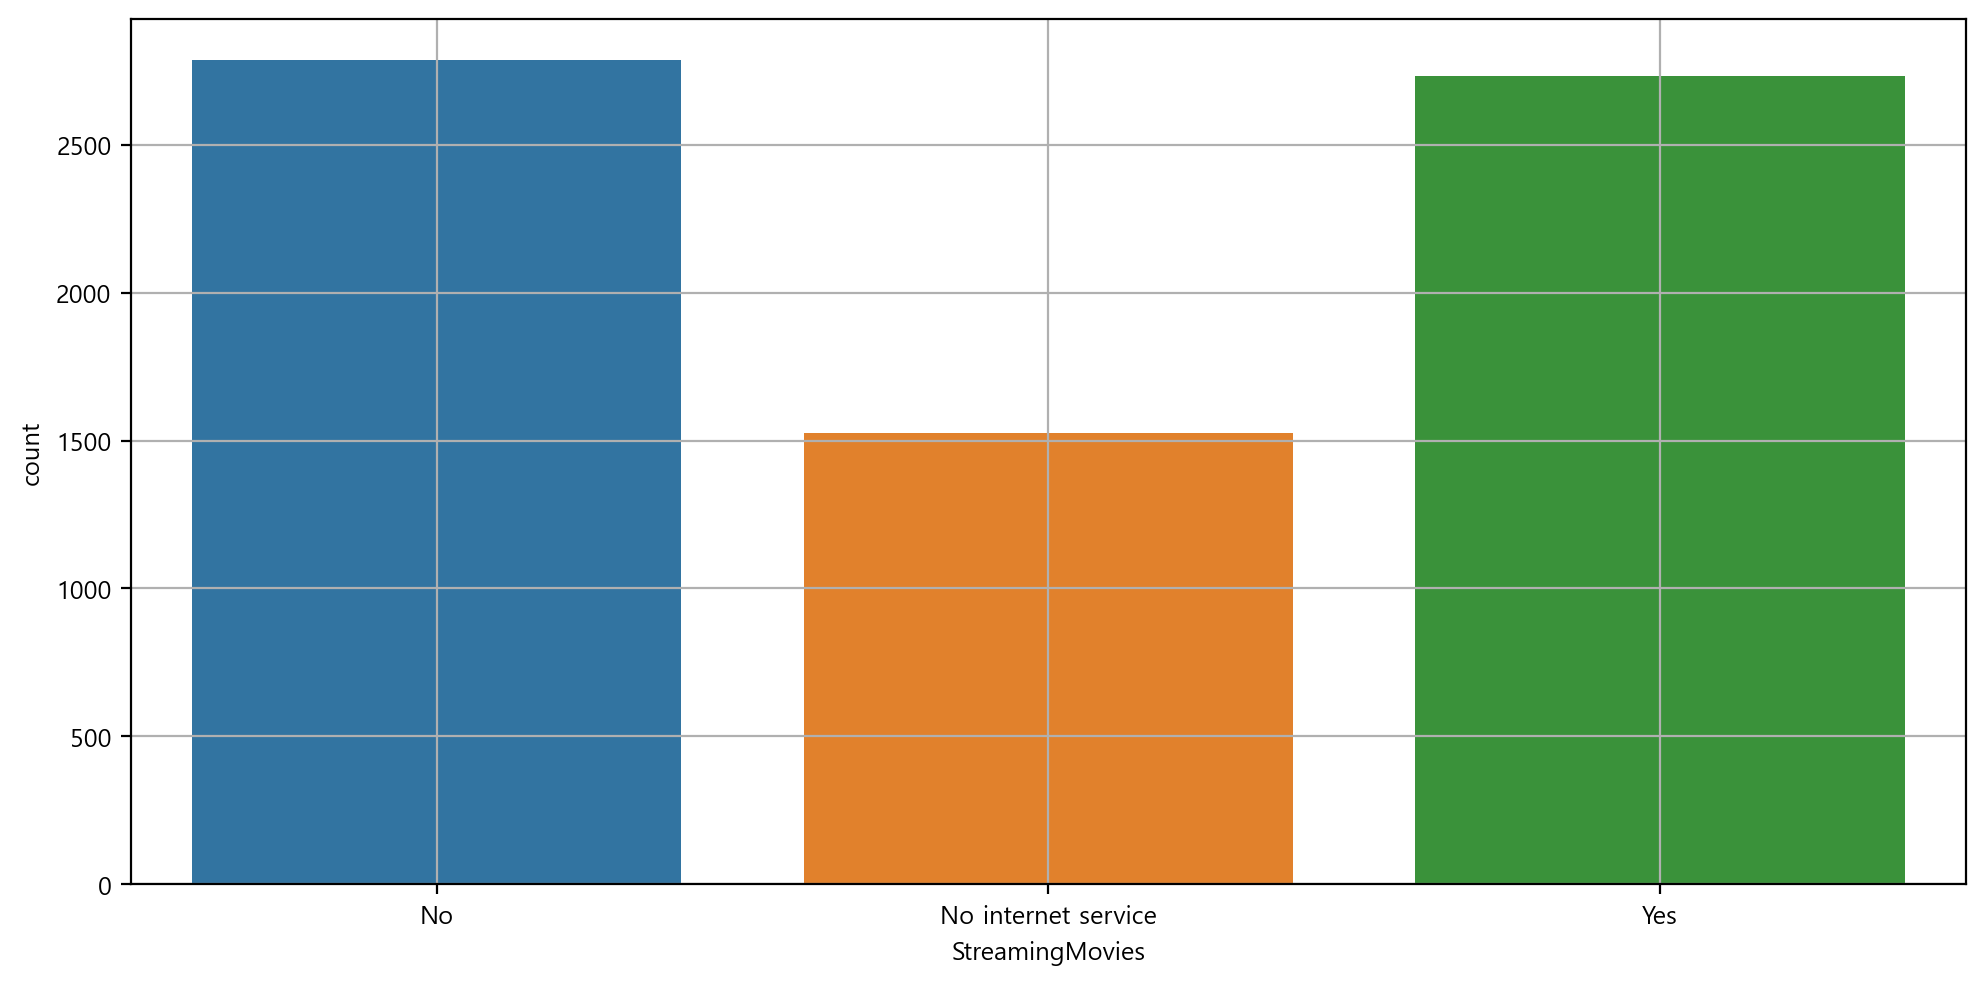

In [25]:
my_countplot(origin, 'StreamingMovies', dpi=200)

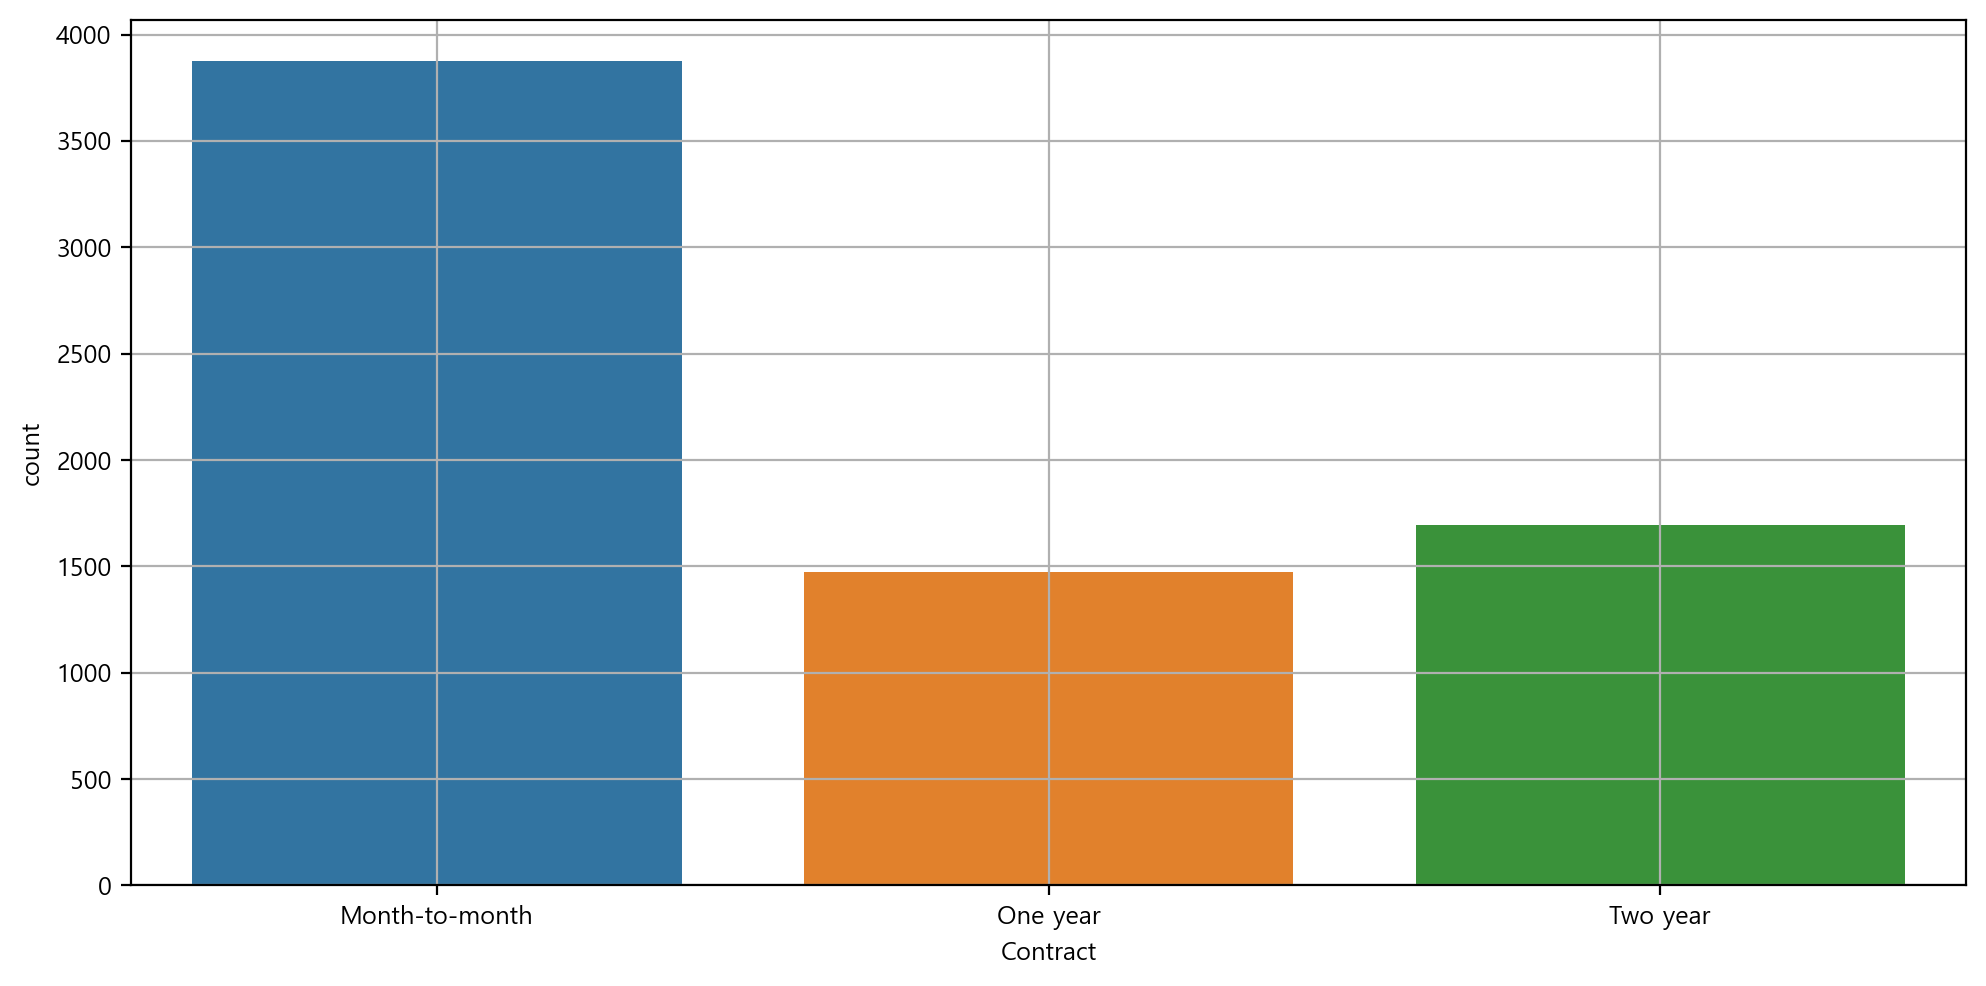

In [26]:
my_countplot(origin, 'Contract', dpi=200)

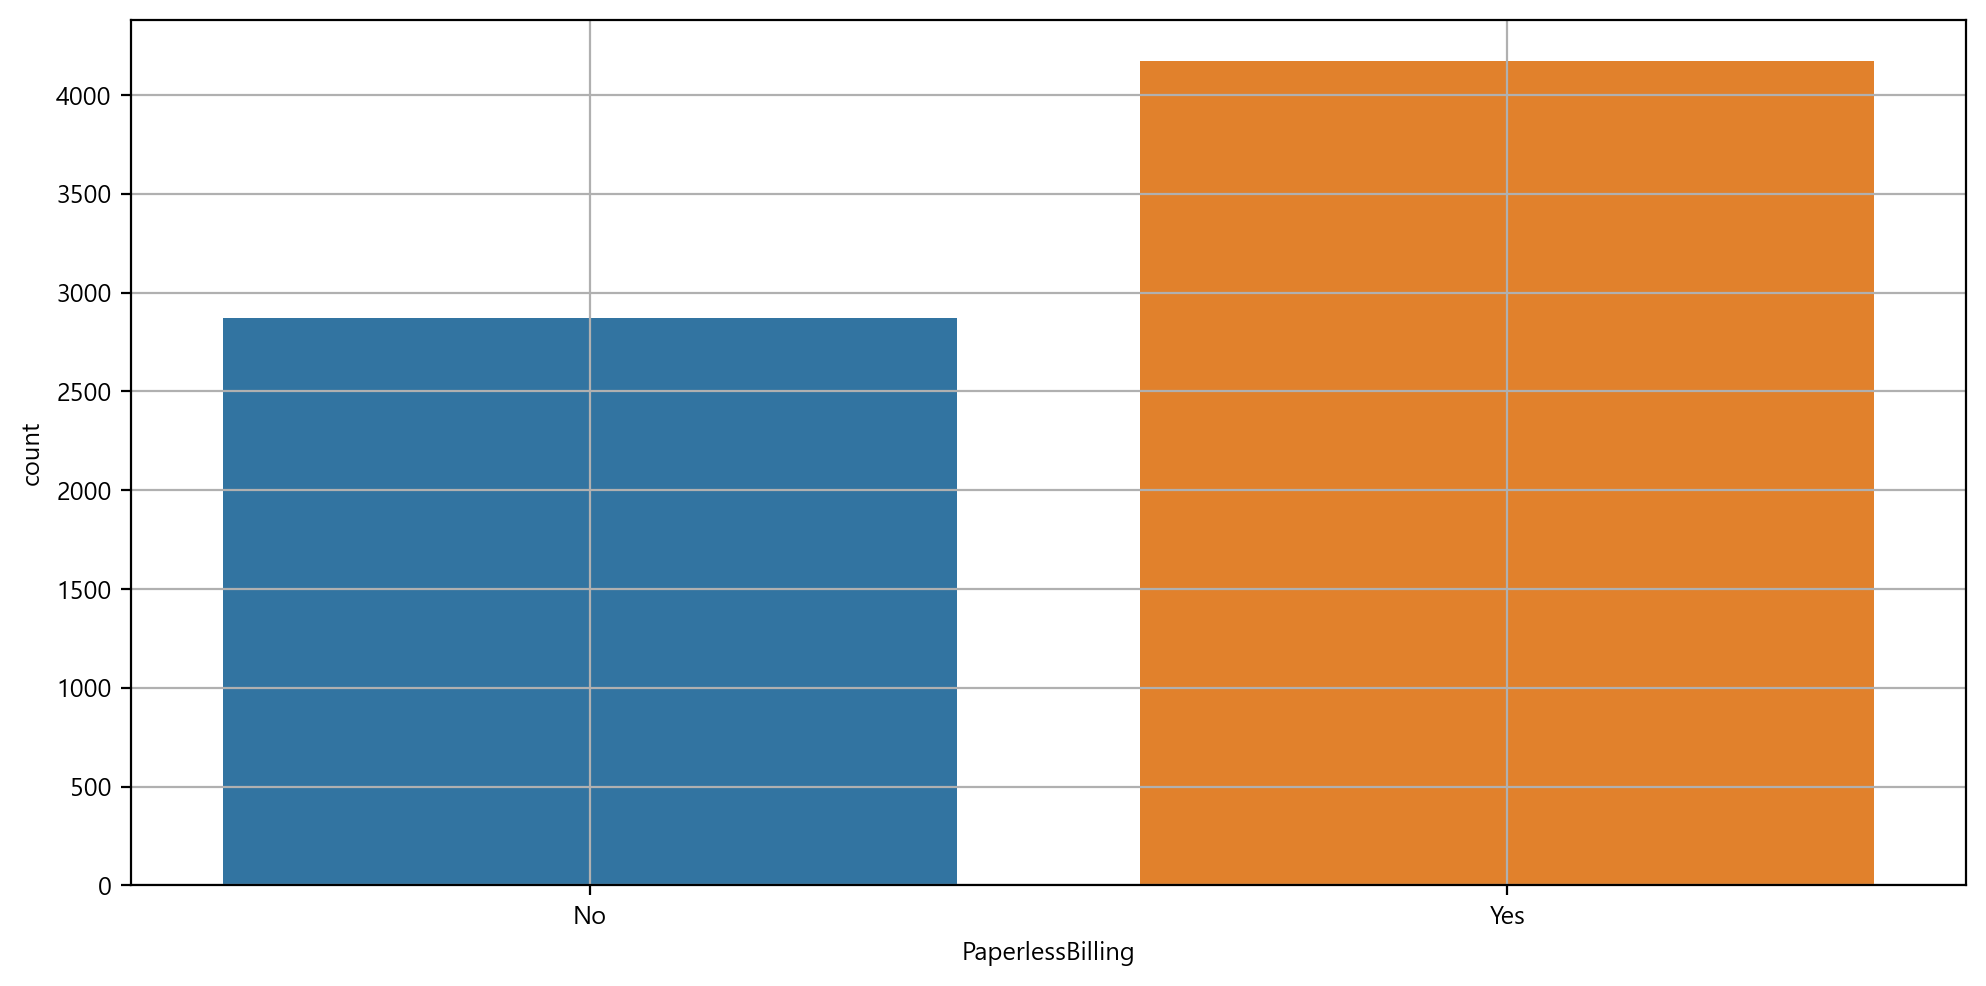

In [27]:
my_countplot(origin, 'PaperlessBilling', dpi=200)

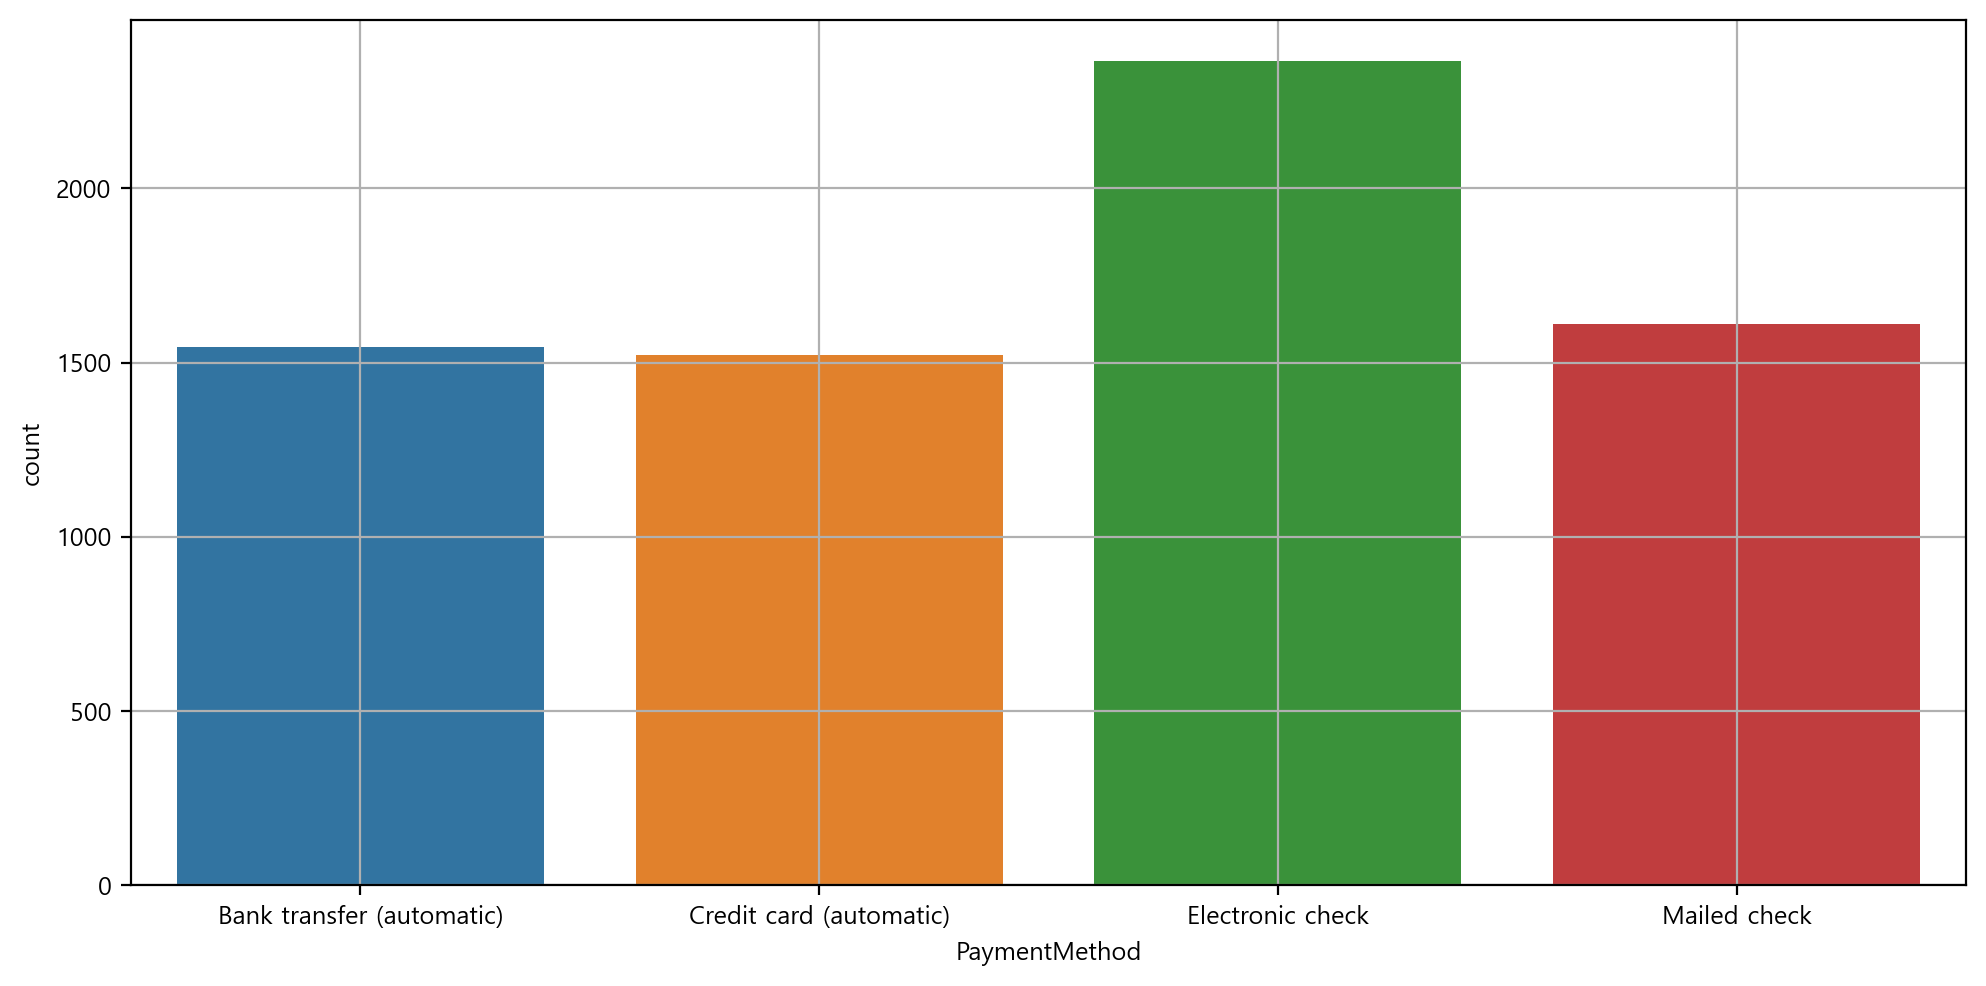

In [28]:
my_countplot(origin, 'PaymentMethod', dpi=200)

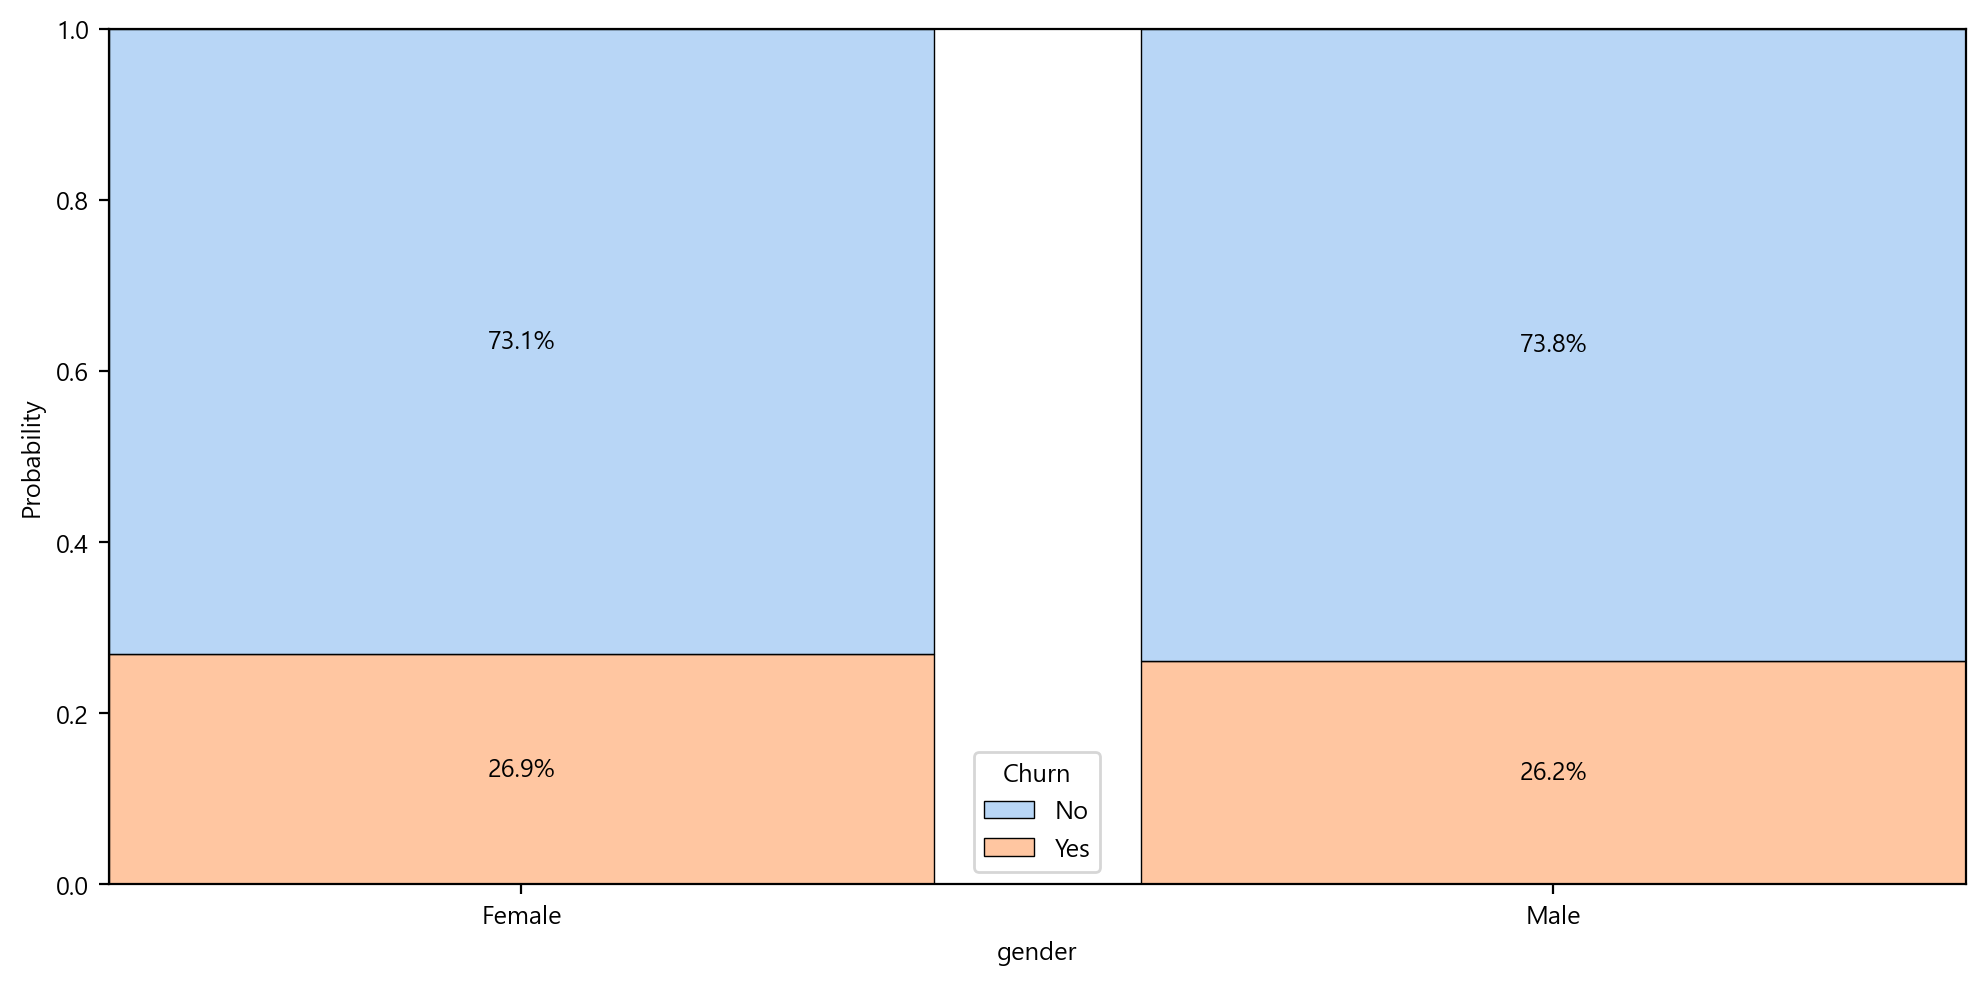

In [29]:
# my_countplot(origin, 'gender', hue='Churn', dpi=200)
my_stackplot(origin, 'gender', hue='Churn', dpi=200, palette="pastel")

> 남녀 간의 구분이 없는 것 같다.

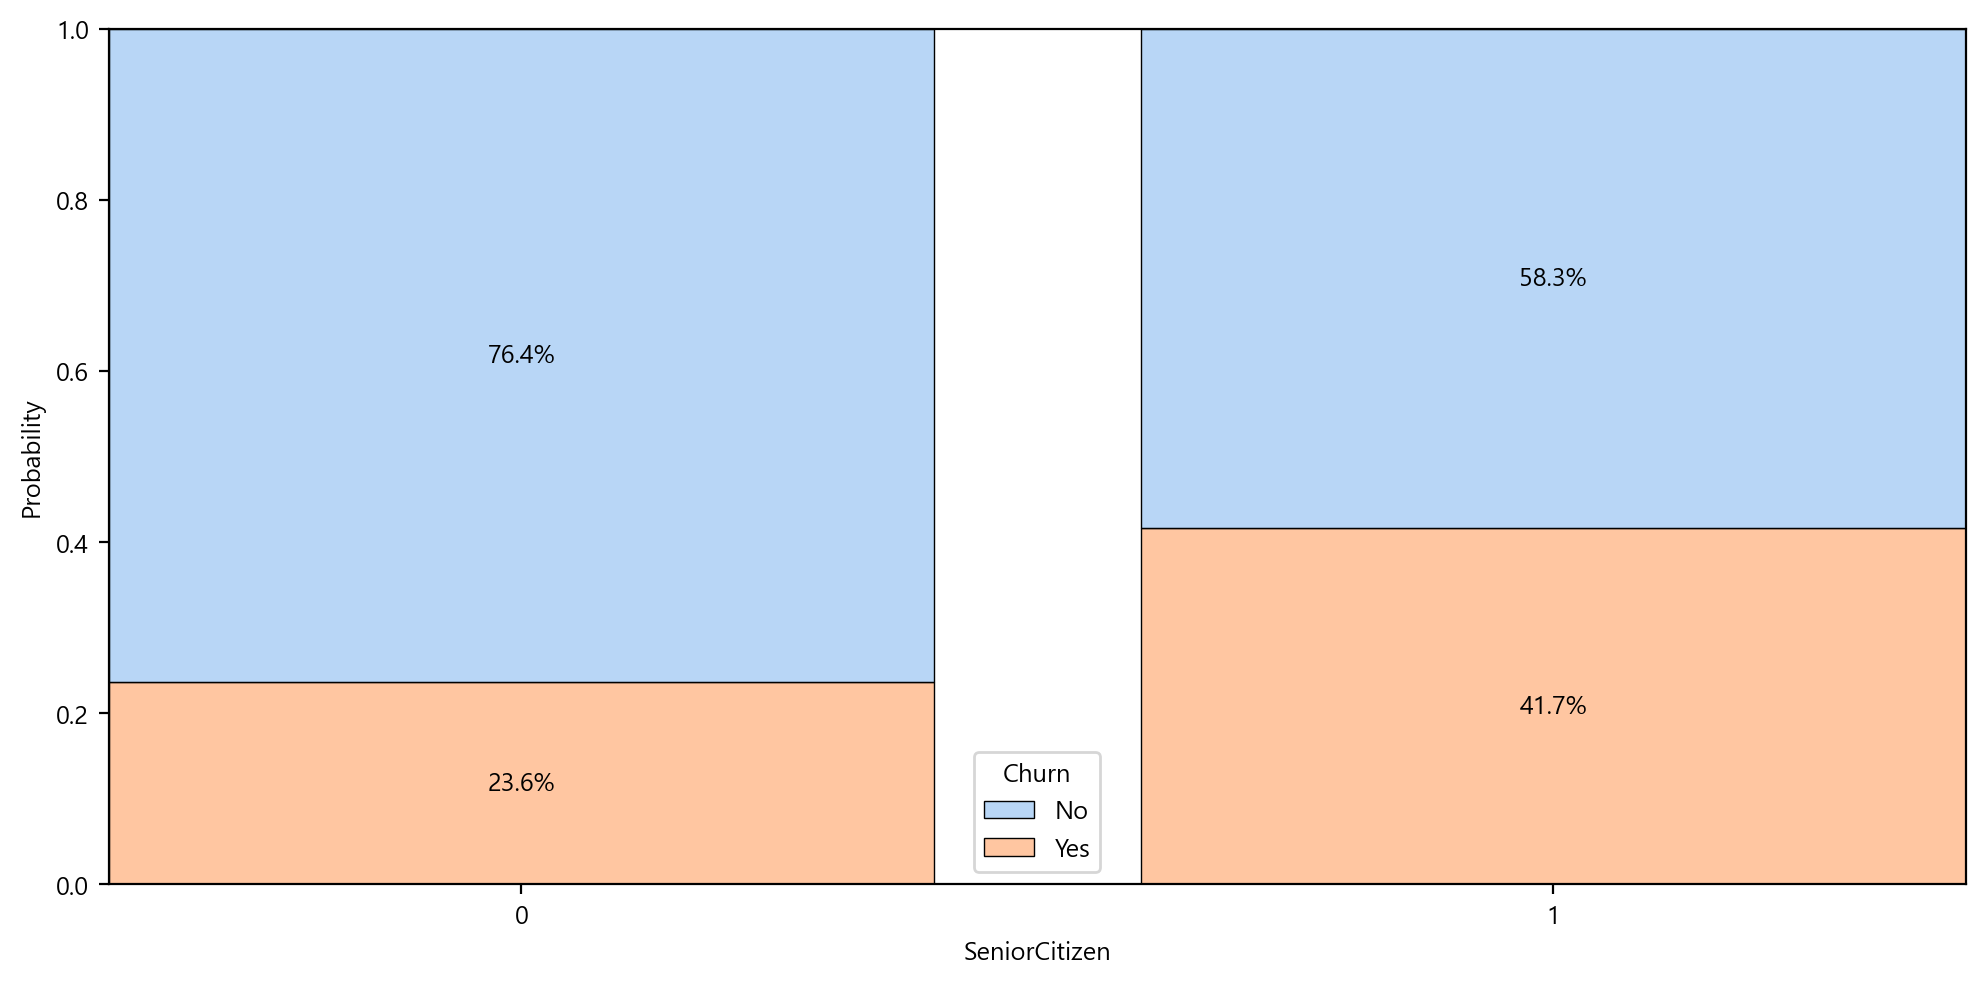

In [30]:
# my_countplot(origin, 'SeniorCitizen', hue='Churn', dpi=200)
my_stackplot(origin, 'SeniorCitizen', hue='Churn', dpi=200, palette="pastel")

> senior citizen의 경우가 그렇지 않은 경우보다 더 높음

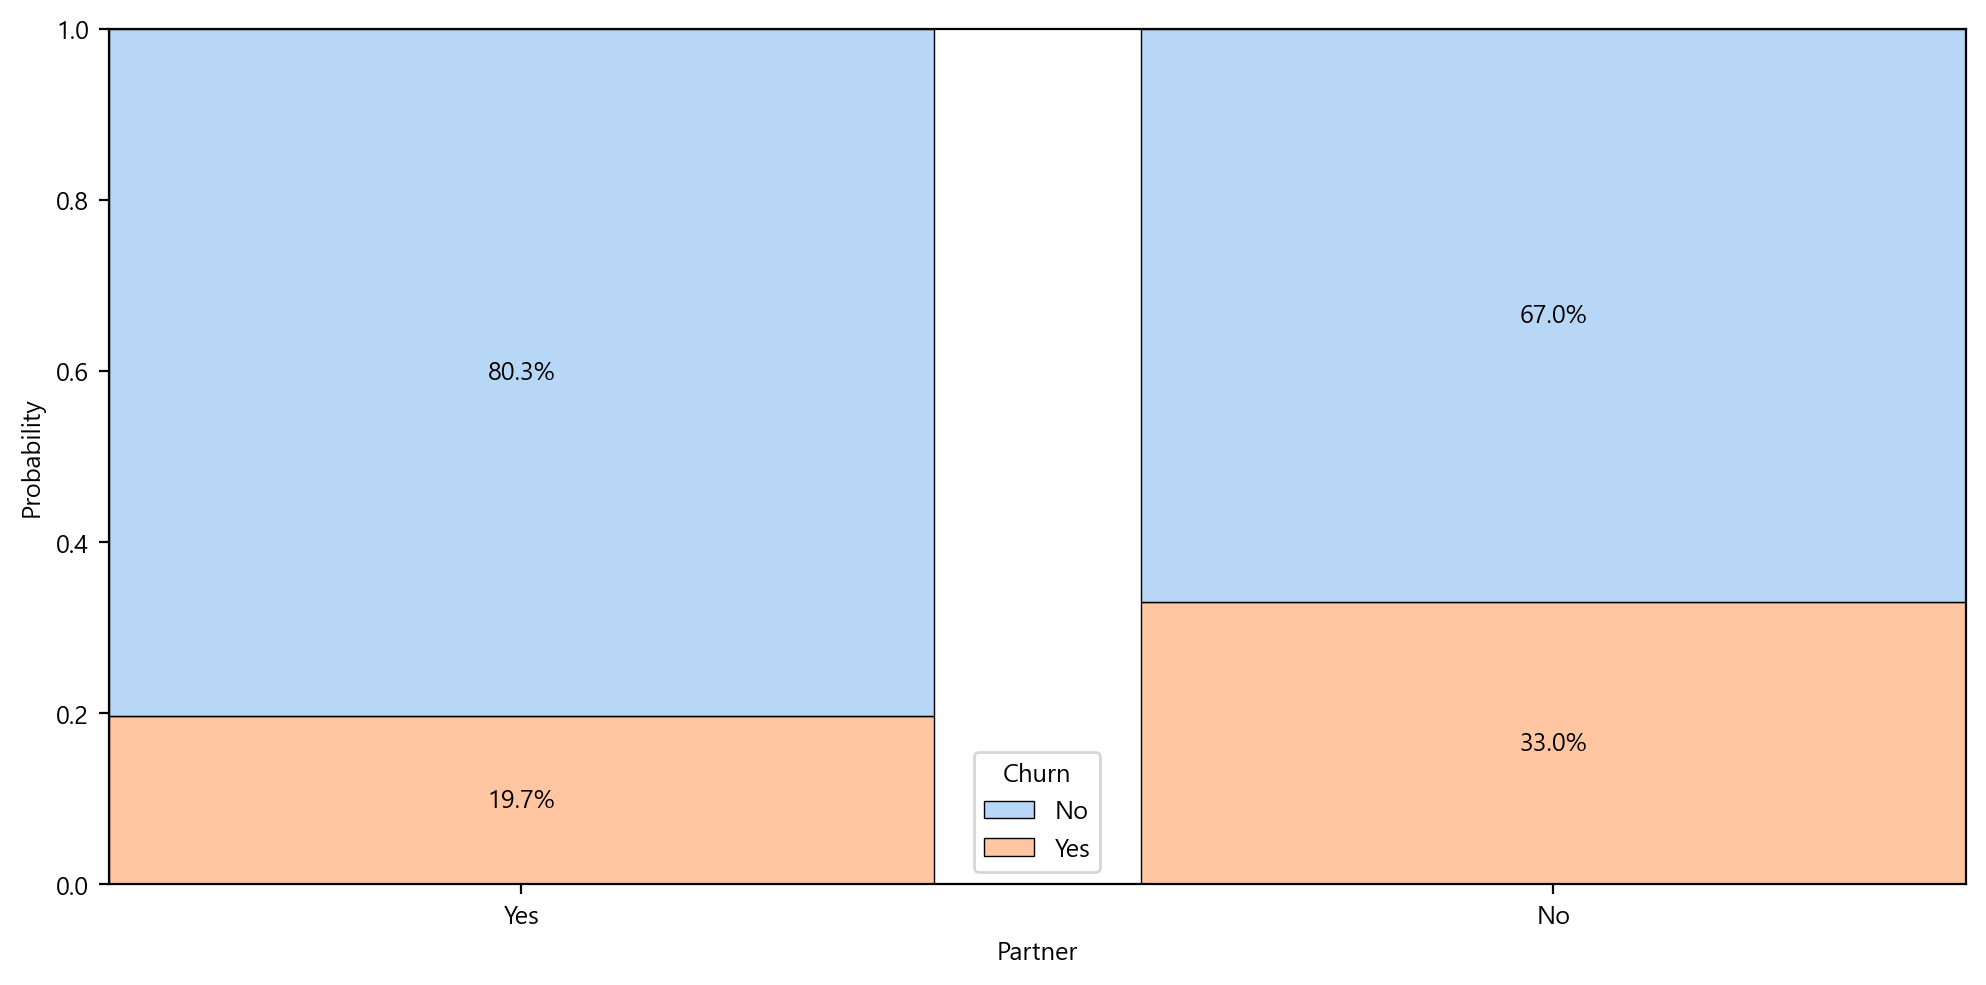

In [31]:
# my_countplot(origin, 'Partner', hue='Churn', dpi=200)
my_stackplot(origin, 'Partner', hue='Churn', dpi=200, palette="pastel")

> 파트너가 있지 않은 경우가 두 배 가량 더 높게 나타남

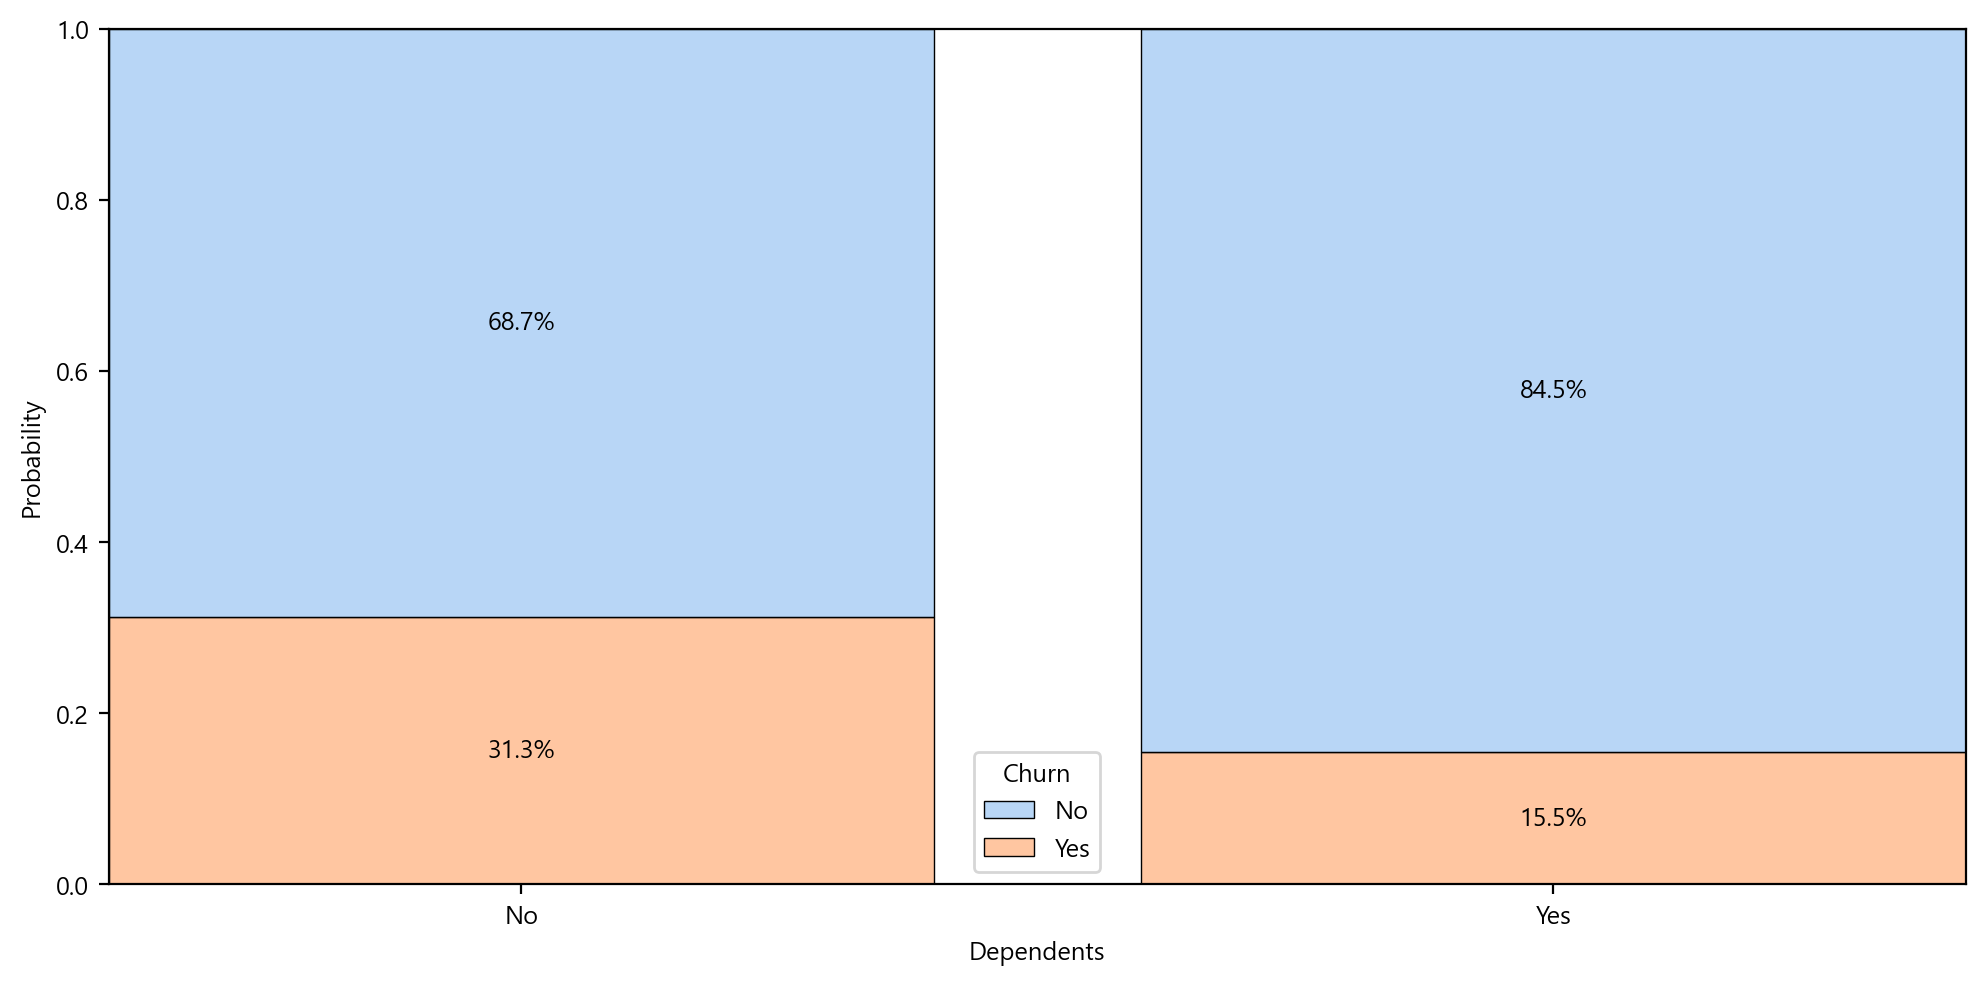

In [32]:
# my_countplot(origin, 'Dependents', hue='Churn', dpi=200)
my_stackplot(origin, 'Dependents', hue='Churn', dpi=200, palette="pastel")

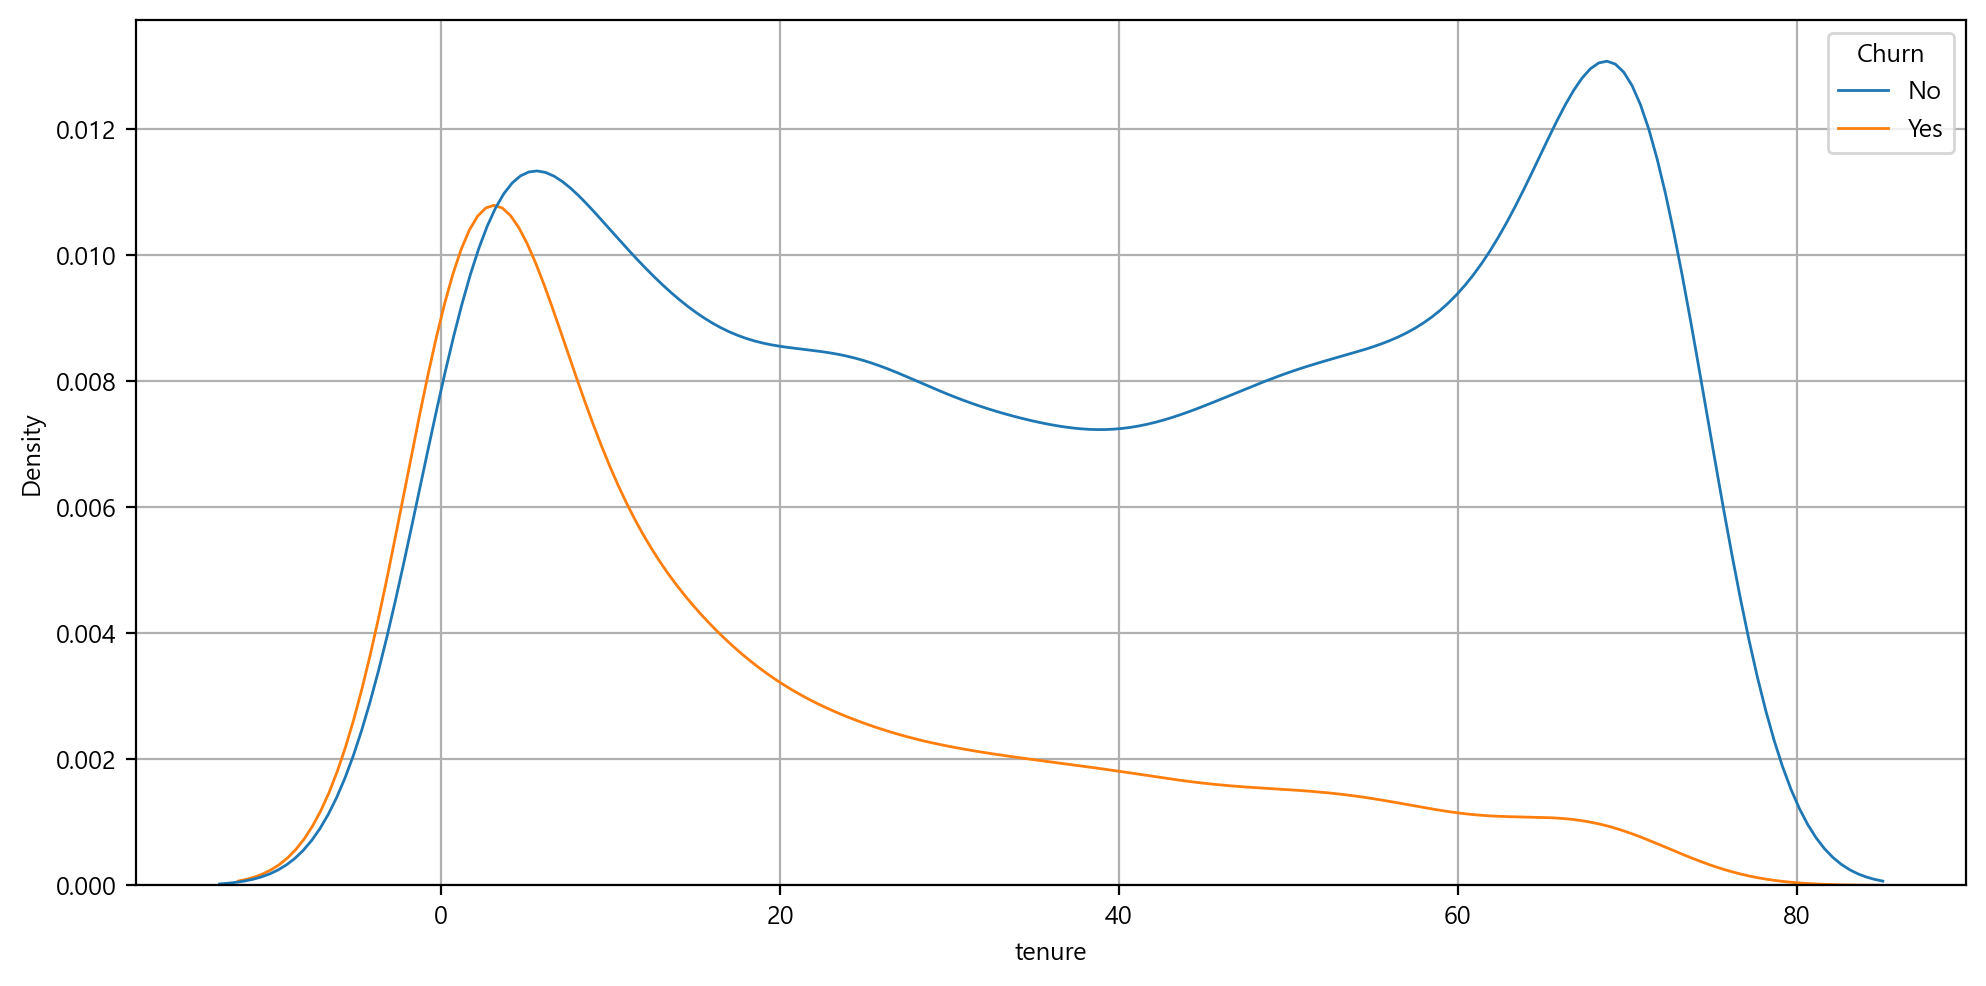

In [33]:
my_kdeplot(origin, 'tenure', hue='Churn', dpi=200)

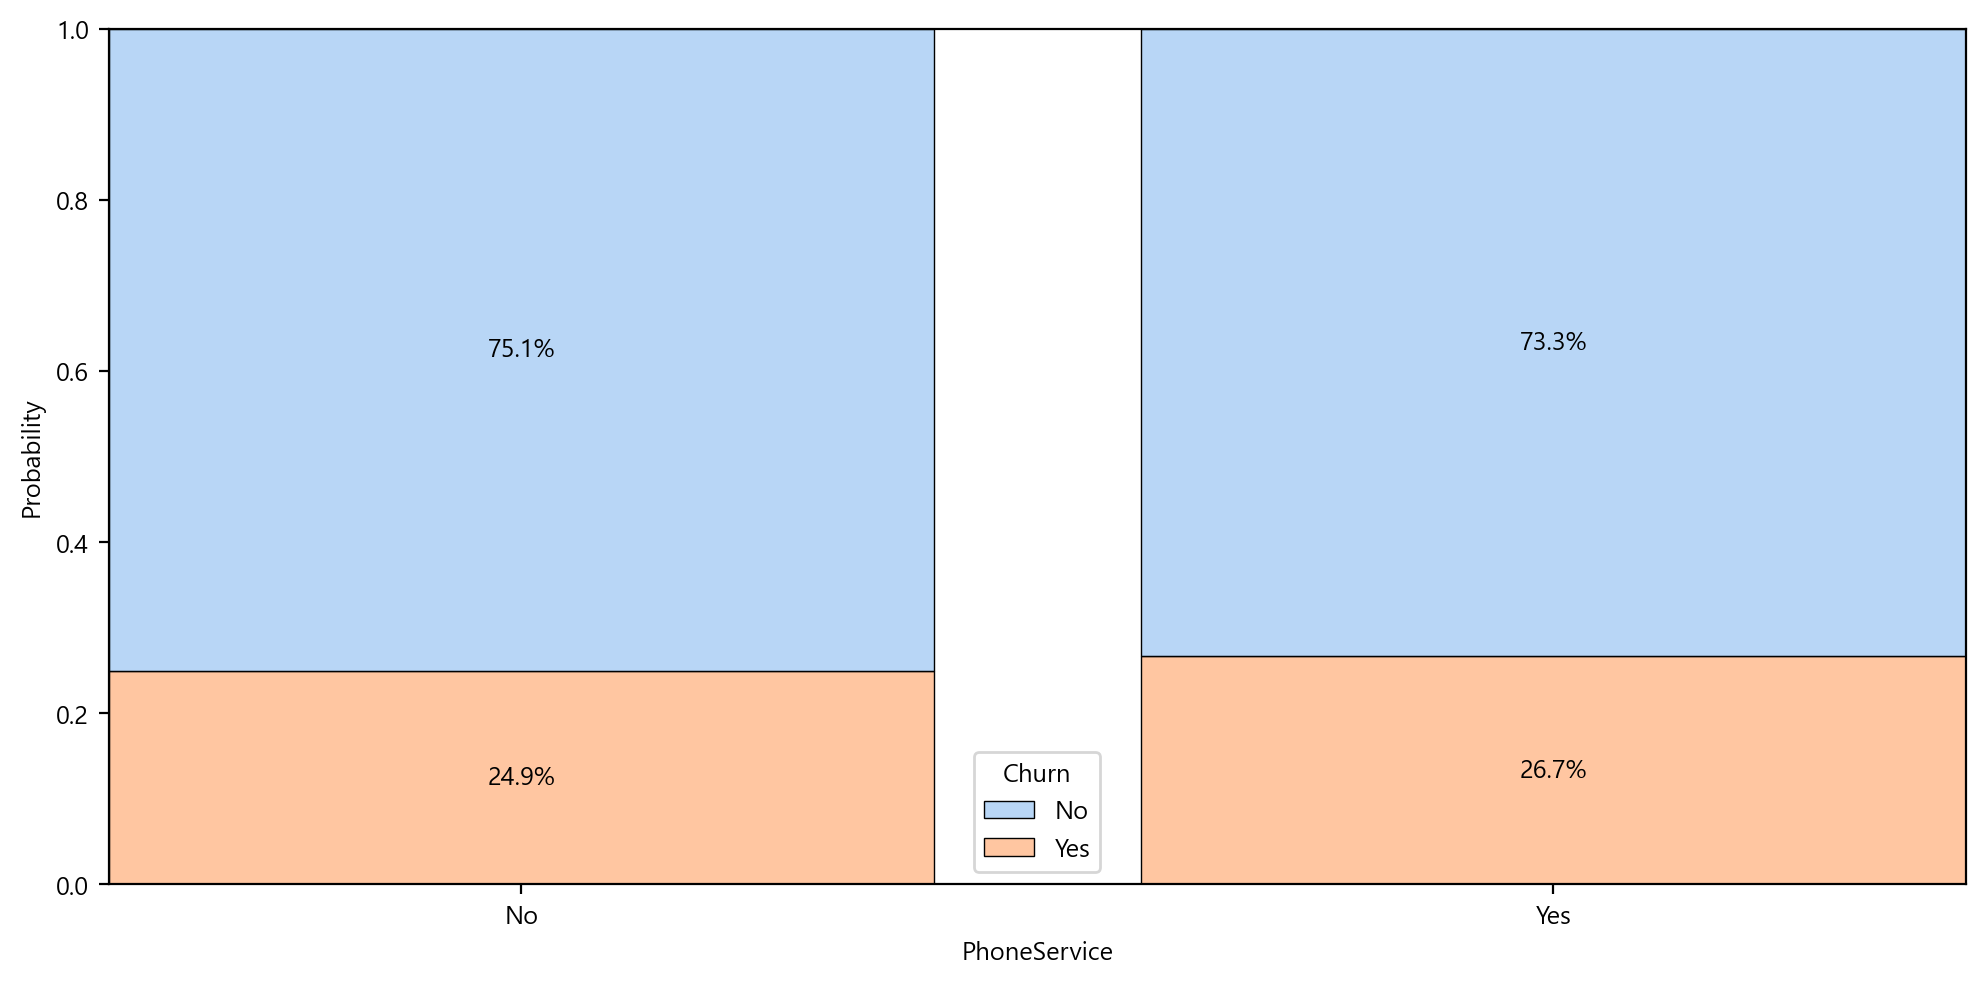

In [34]:
# my_countplot(origin, 'PhoneService', hue='Churn', dpi=200)
my_stackplot(origin, 'PhoneService', hue='Churn', dpi=200, palette="pastel")

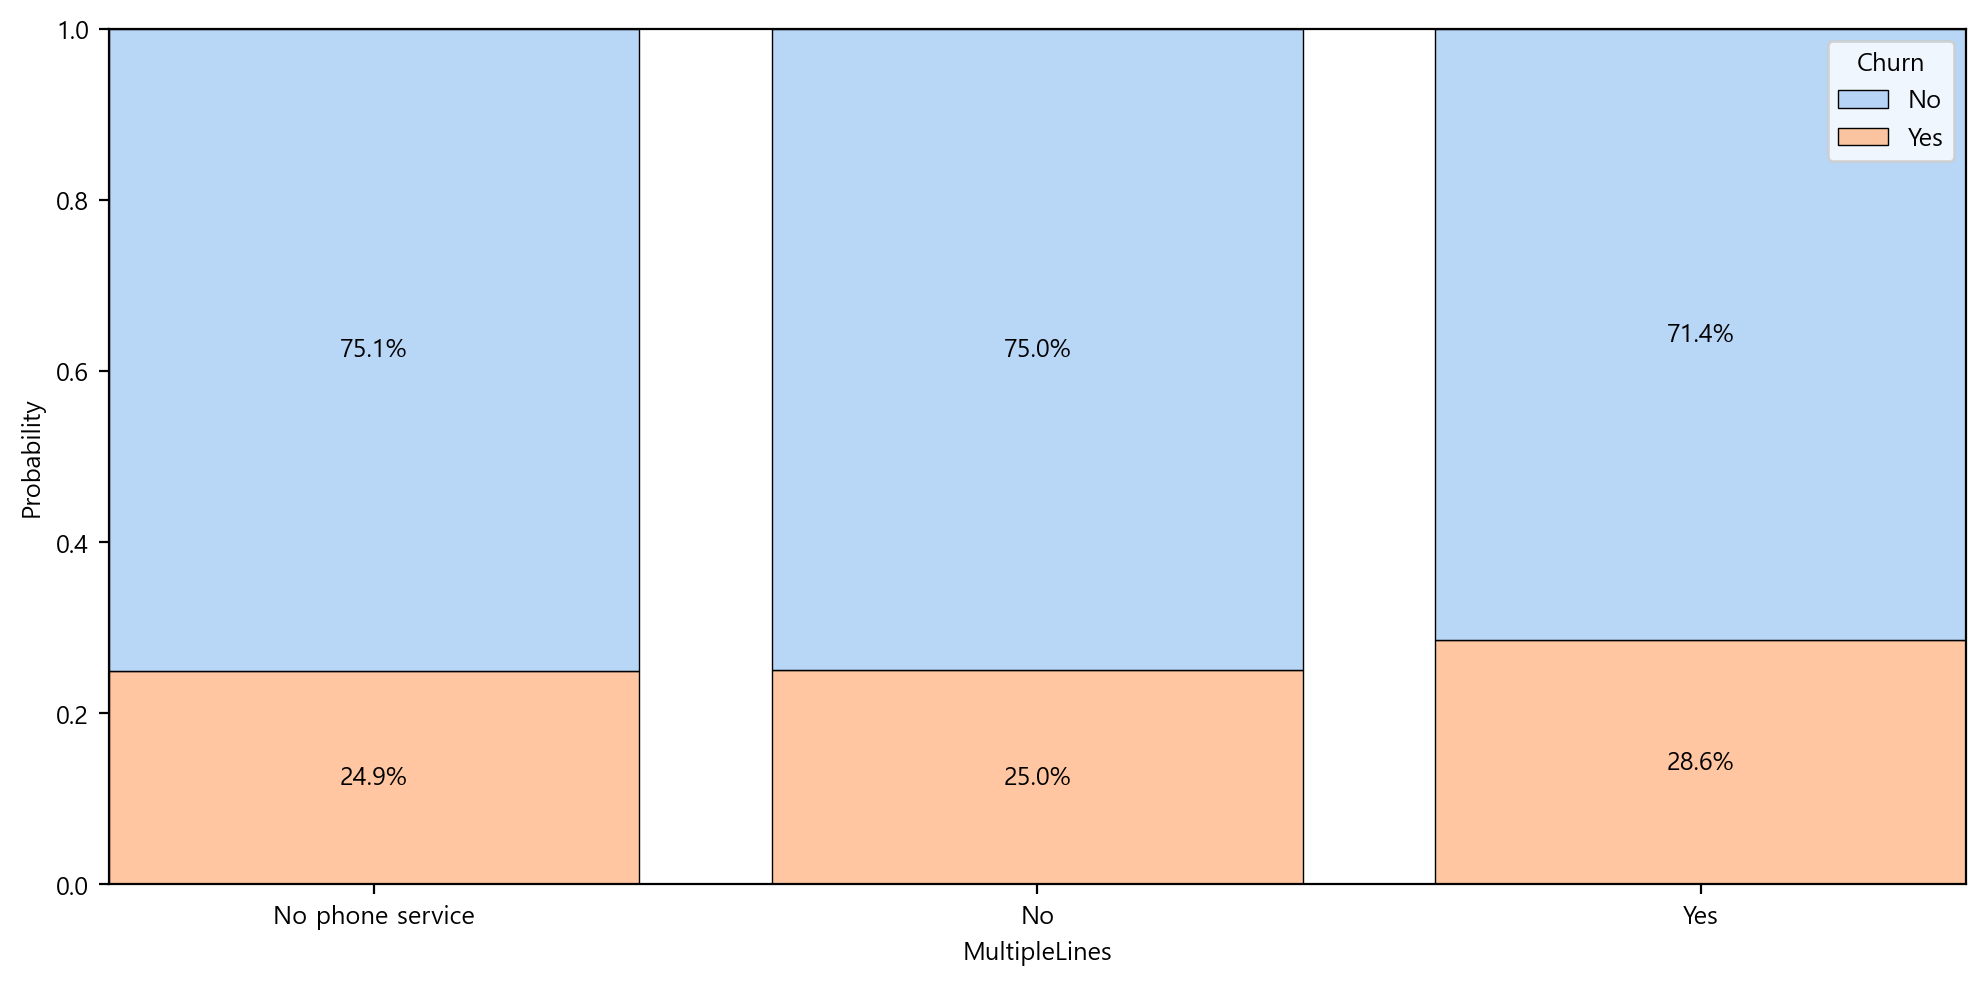

In [35]:
# my_countplot(origin, 'MultipleLines', hue='Churn', dpi=200)
my_stackplot(origin, 'MultipleLines', hue='Churn', dpi=200, palette="pastel")

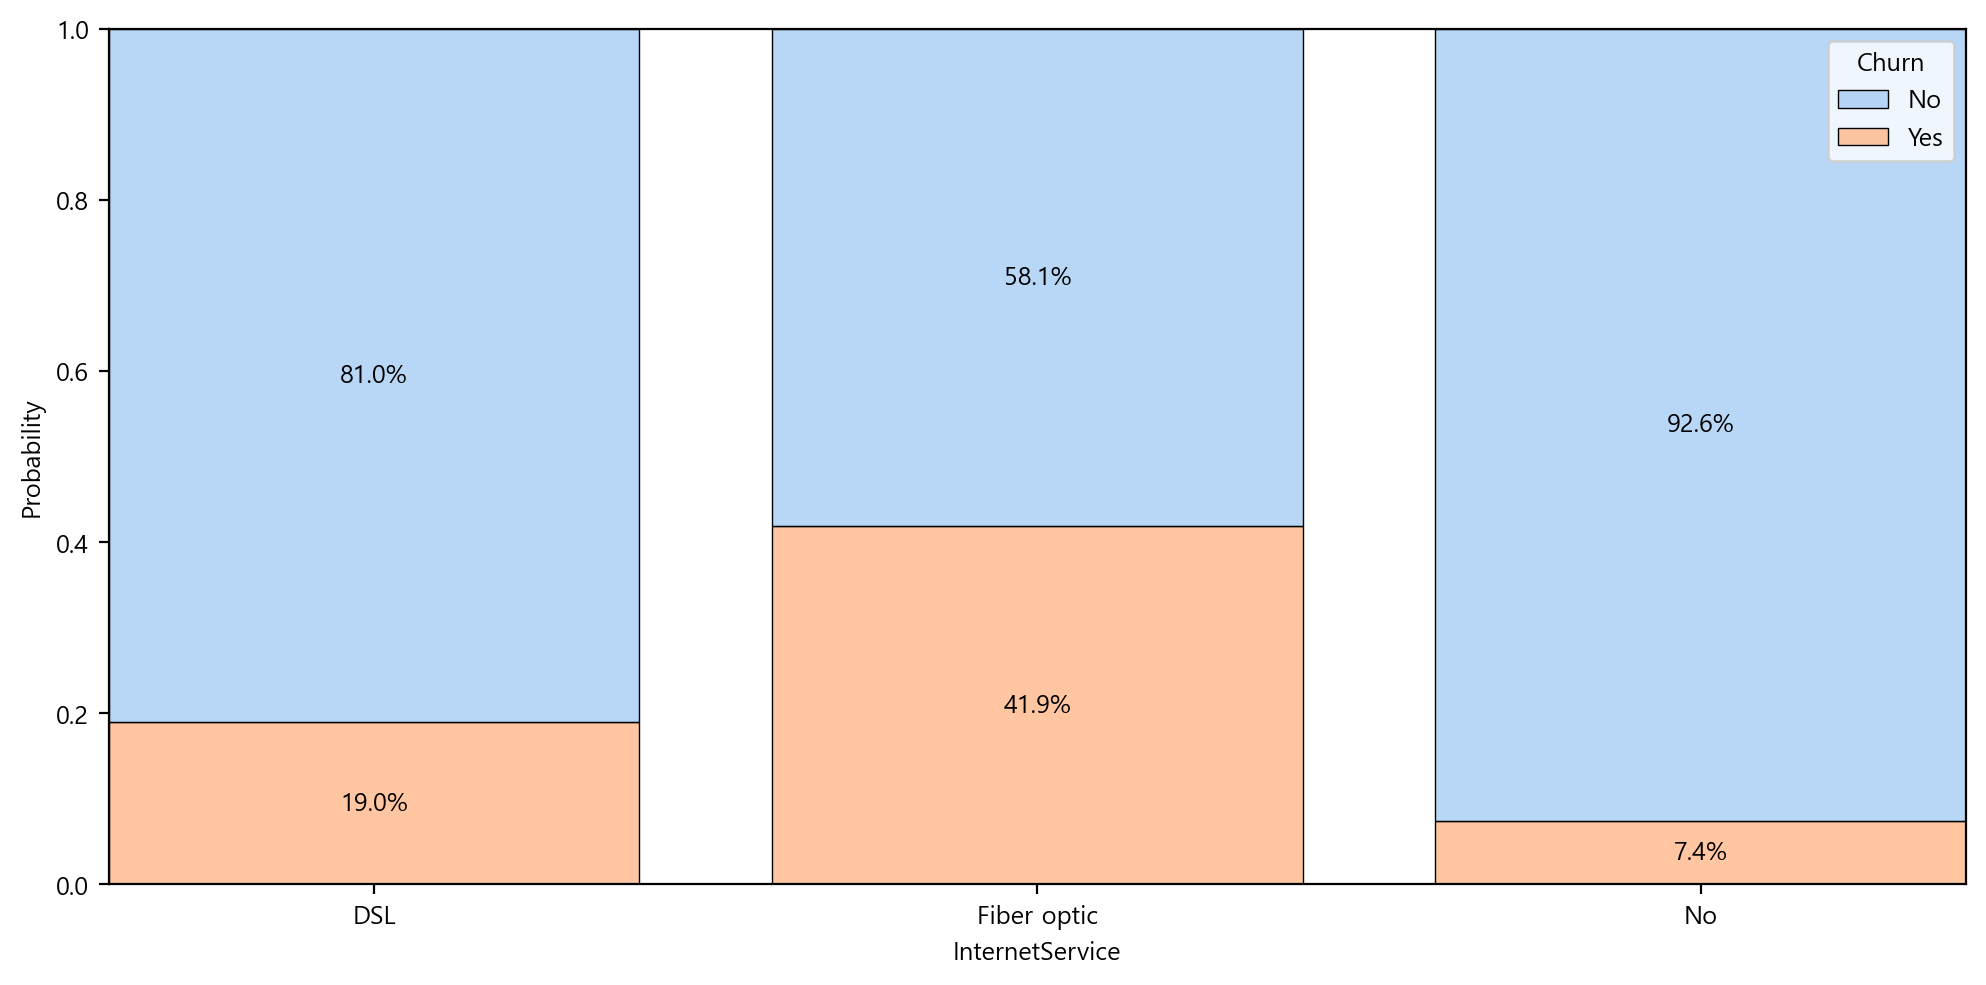

In [36]:
# my_countplot(origin, 'InternetService', hue='Churn', dpi=200)
my_stackplot(origin, 'InternetService', hue='Churn', dpi=200, palette="pastel")

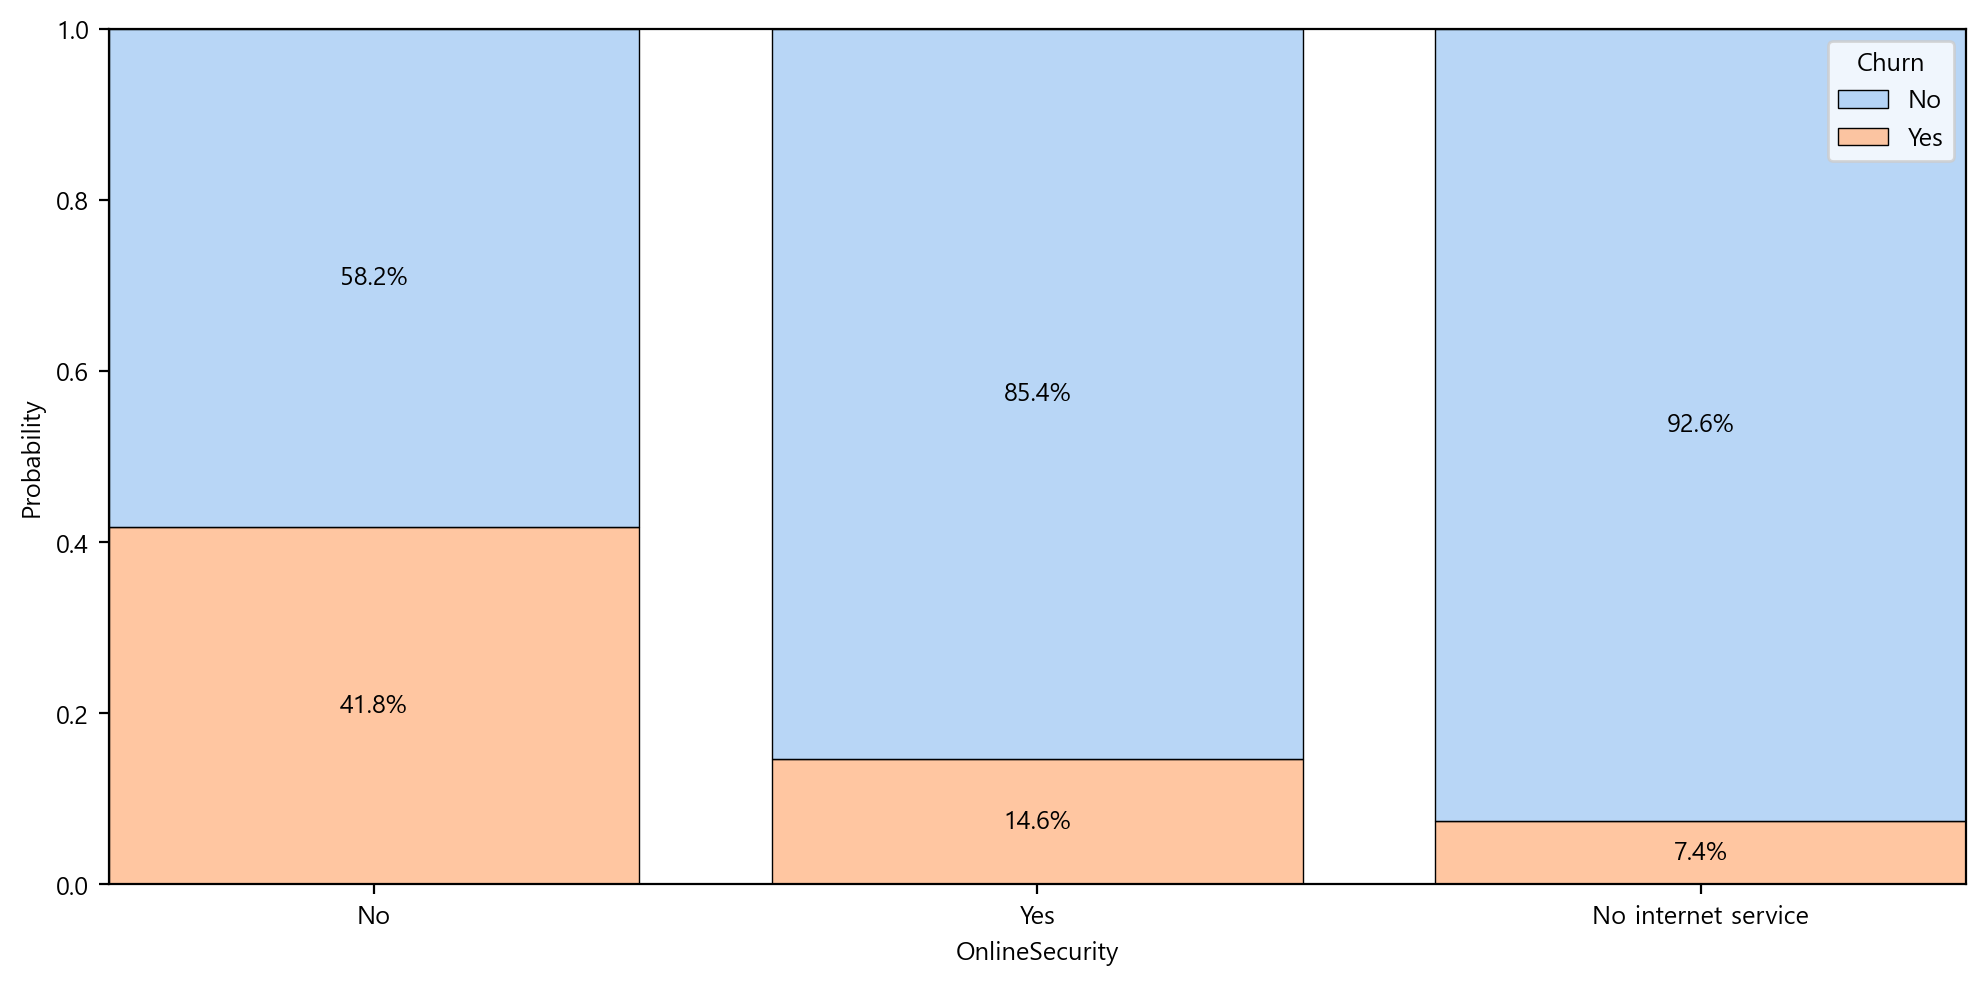

In [37]:
# my_countplot(origin, 'OnlineSecurity', hue='Churn', dpi=200)
my_stackplot(origin, 'OnlineSecurity', hue='Churn', dpi=200, palette="pastel")

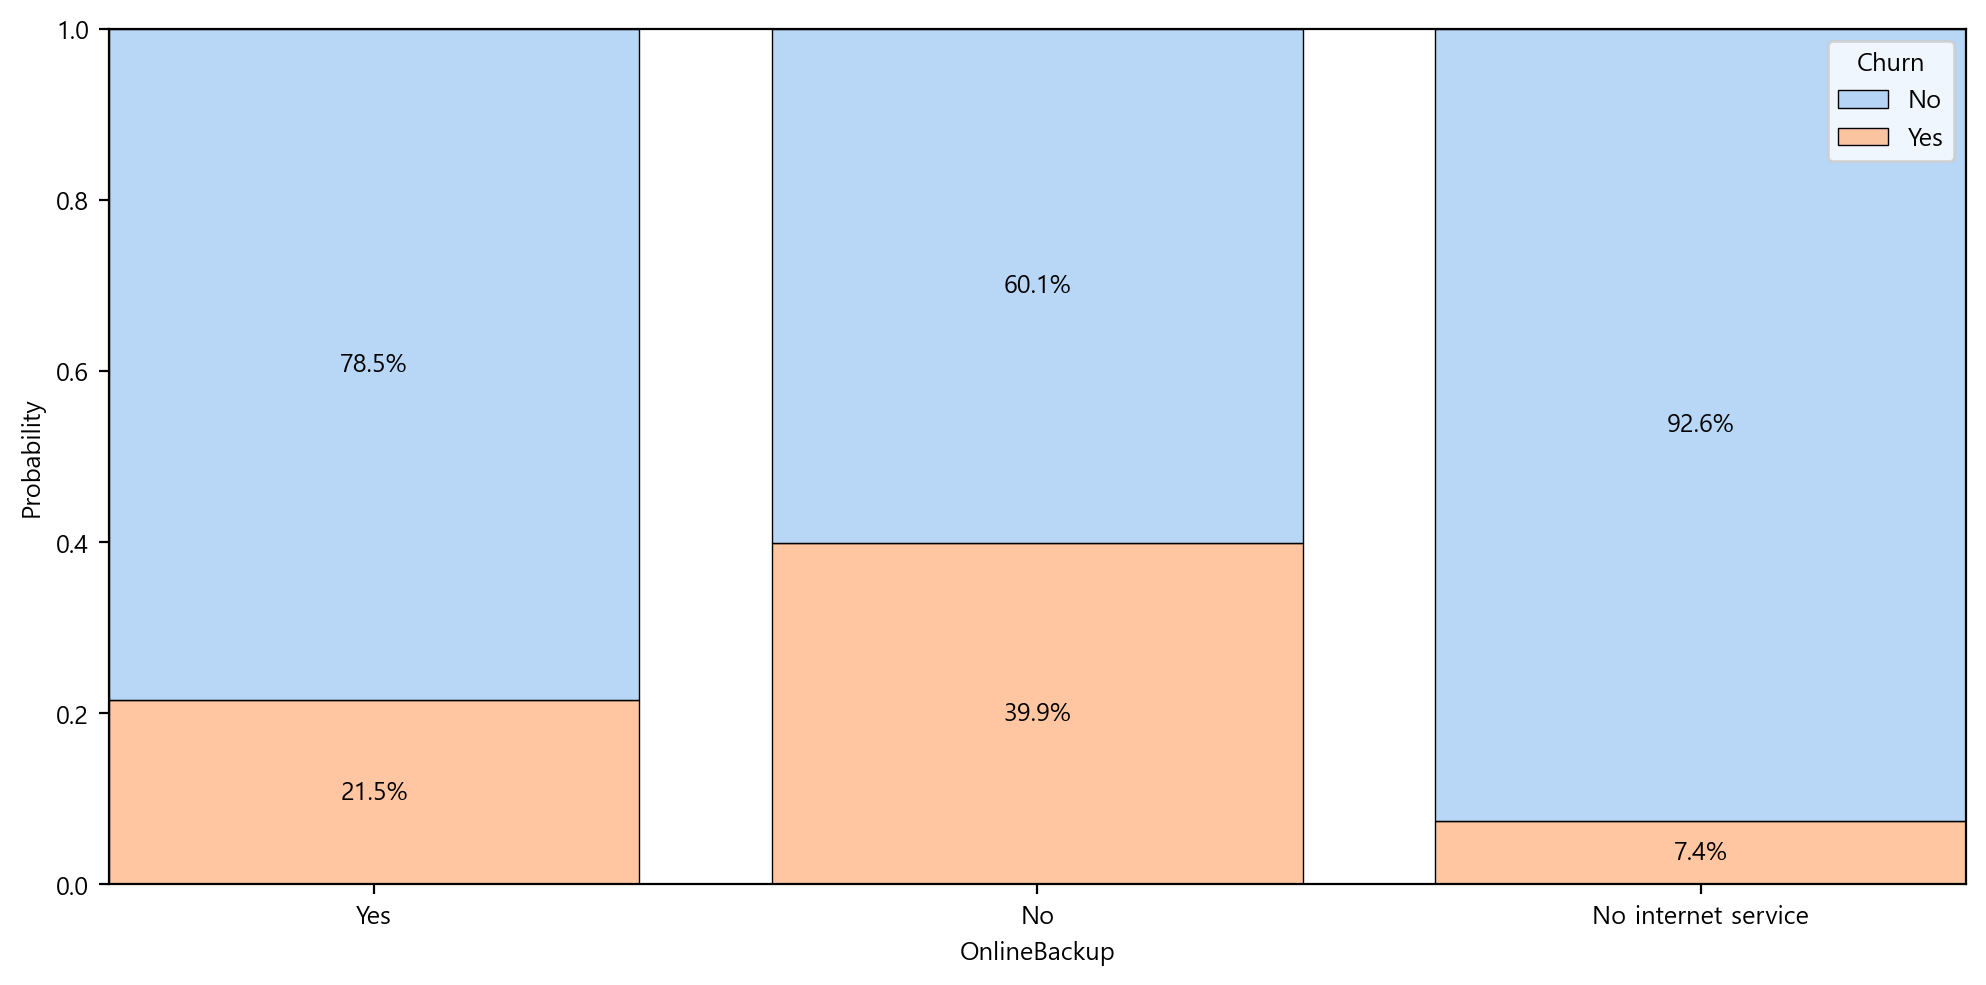

In [38]:
# my_countplot(origin, 'OnlineBackup', hue='Churn', dpi=200)
my_stackplot(origin, 'OnlineBackup', hue='Churn', dpi=200, palette="pastel")

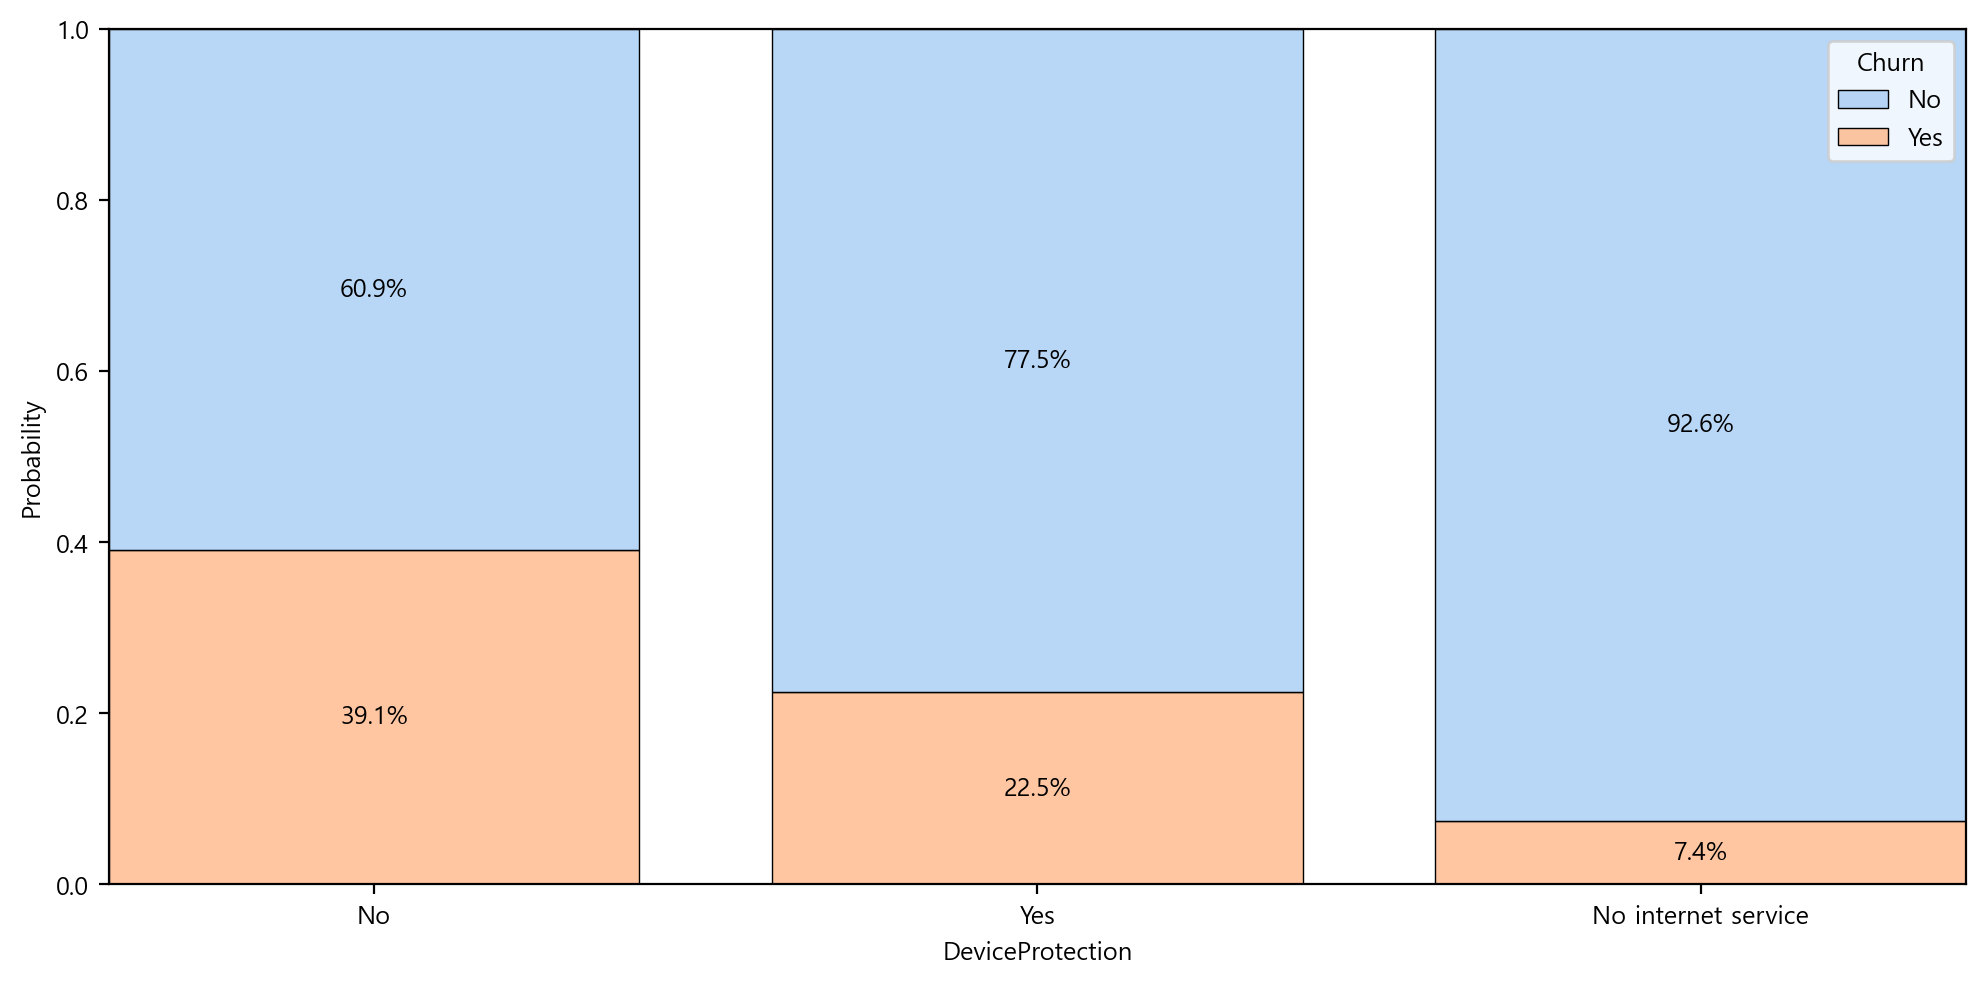

In [39]:
# my_countplot(origin, 'DeviceProtection', hue='Churn', dpi=200)
my_stackplot(origin, 'DeviceProtection', hue='Churn', dpi=200, palette="pastel")

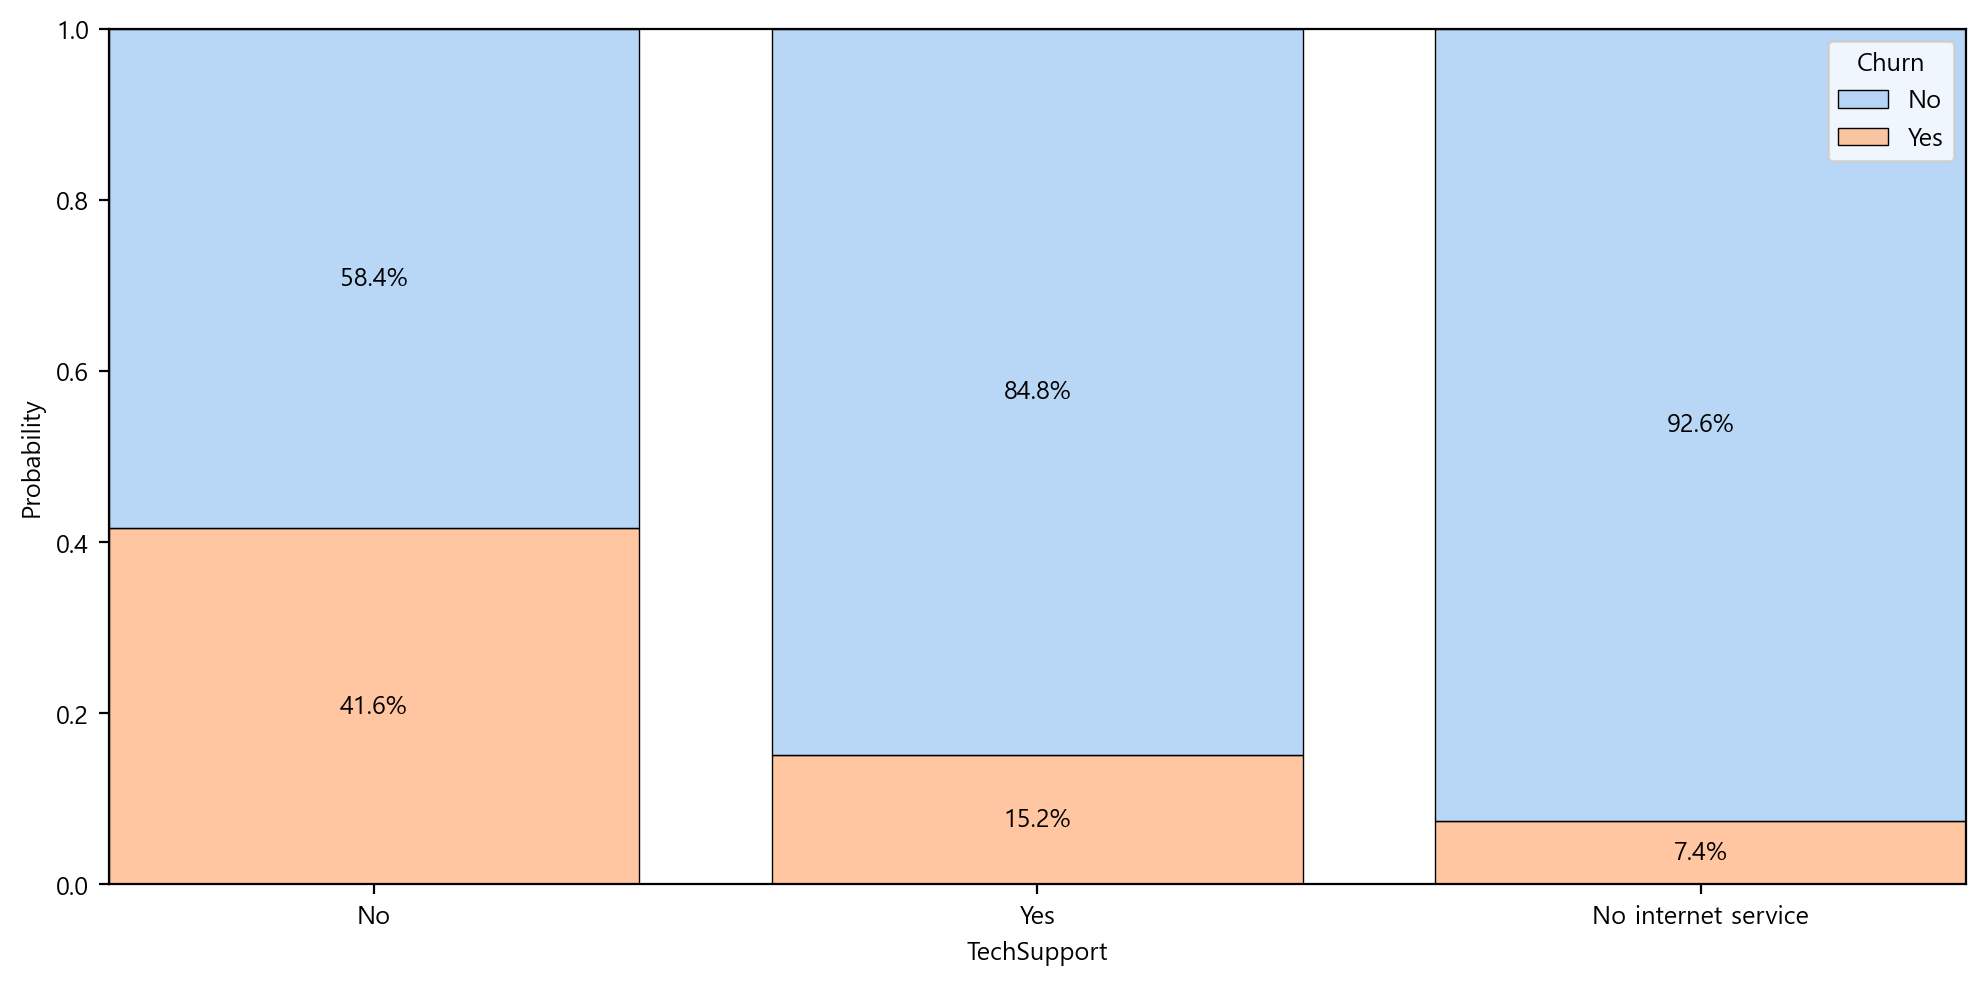

In [40]:
# my_countplot(origin, 'TechSupport', hue='Churn', dpi=200)
my_stackplot(origin, 'TechSupport', hue='Churn', dpi=200, palette="pastel")

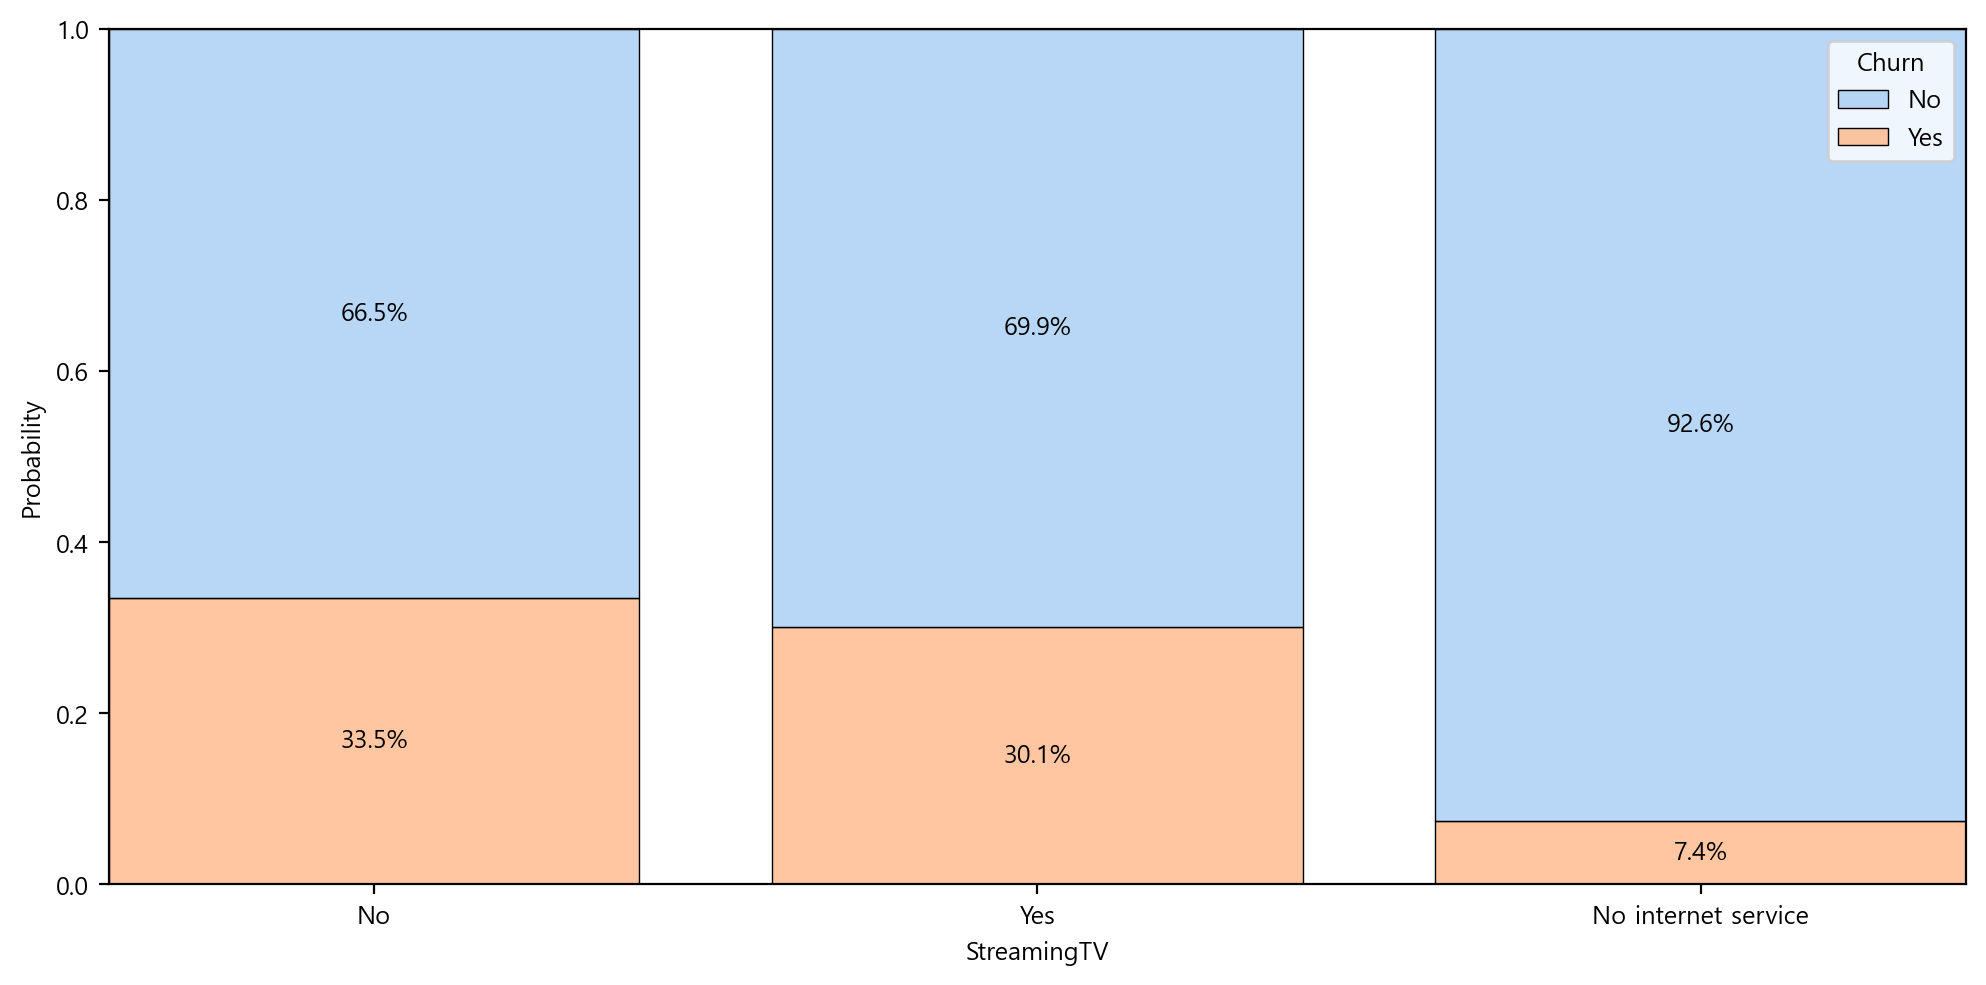

In [41]:
# my_countplot(origin, 'StreamingTV', hue='Churn', dpi=200)
my_stackplot(origin, 'StreamingTV', hue='Churn', dpi=200, palette="pastel")

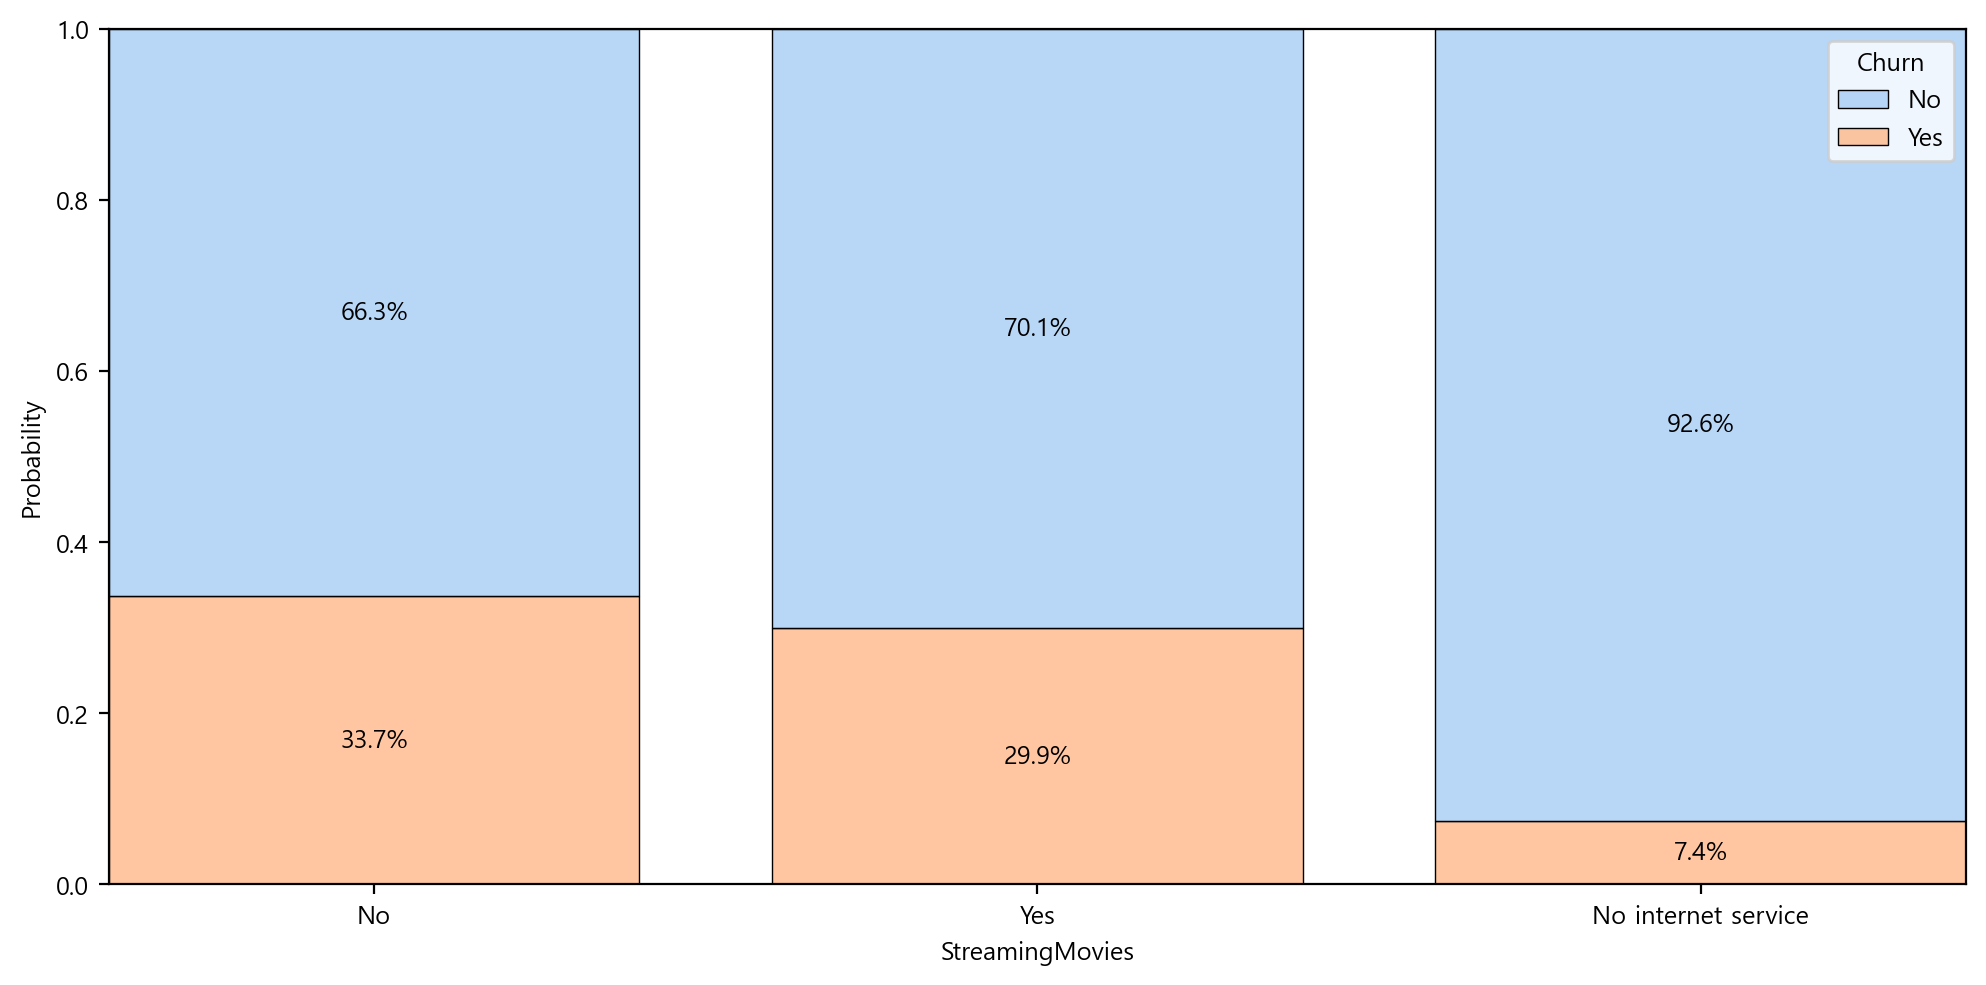

In [42]:
# my_countplot(origin, 'StreamingMovies', hue='Churn', dpi=200)
my_stackplot(origin, 'StreamingMovies', hue='Churn', dpi=200, palette="pastel")

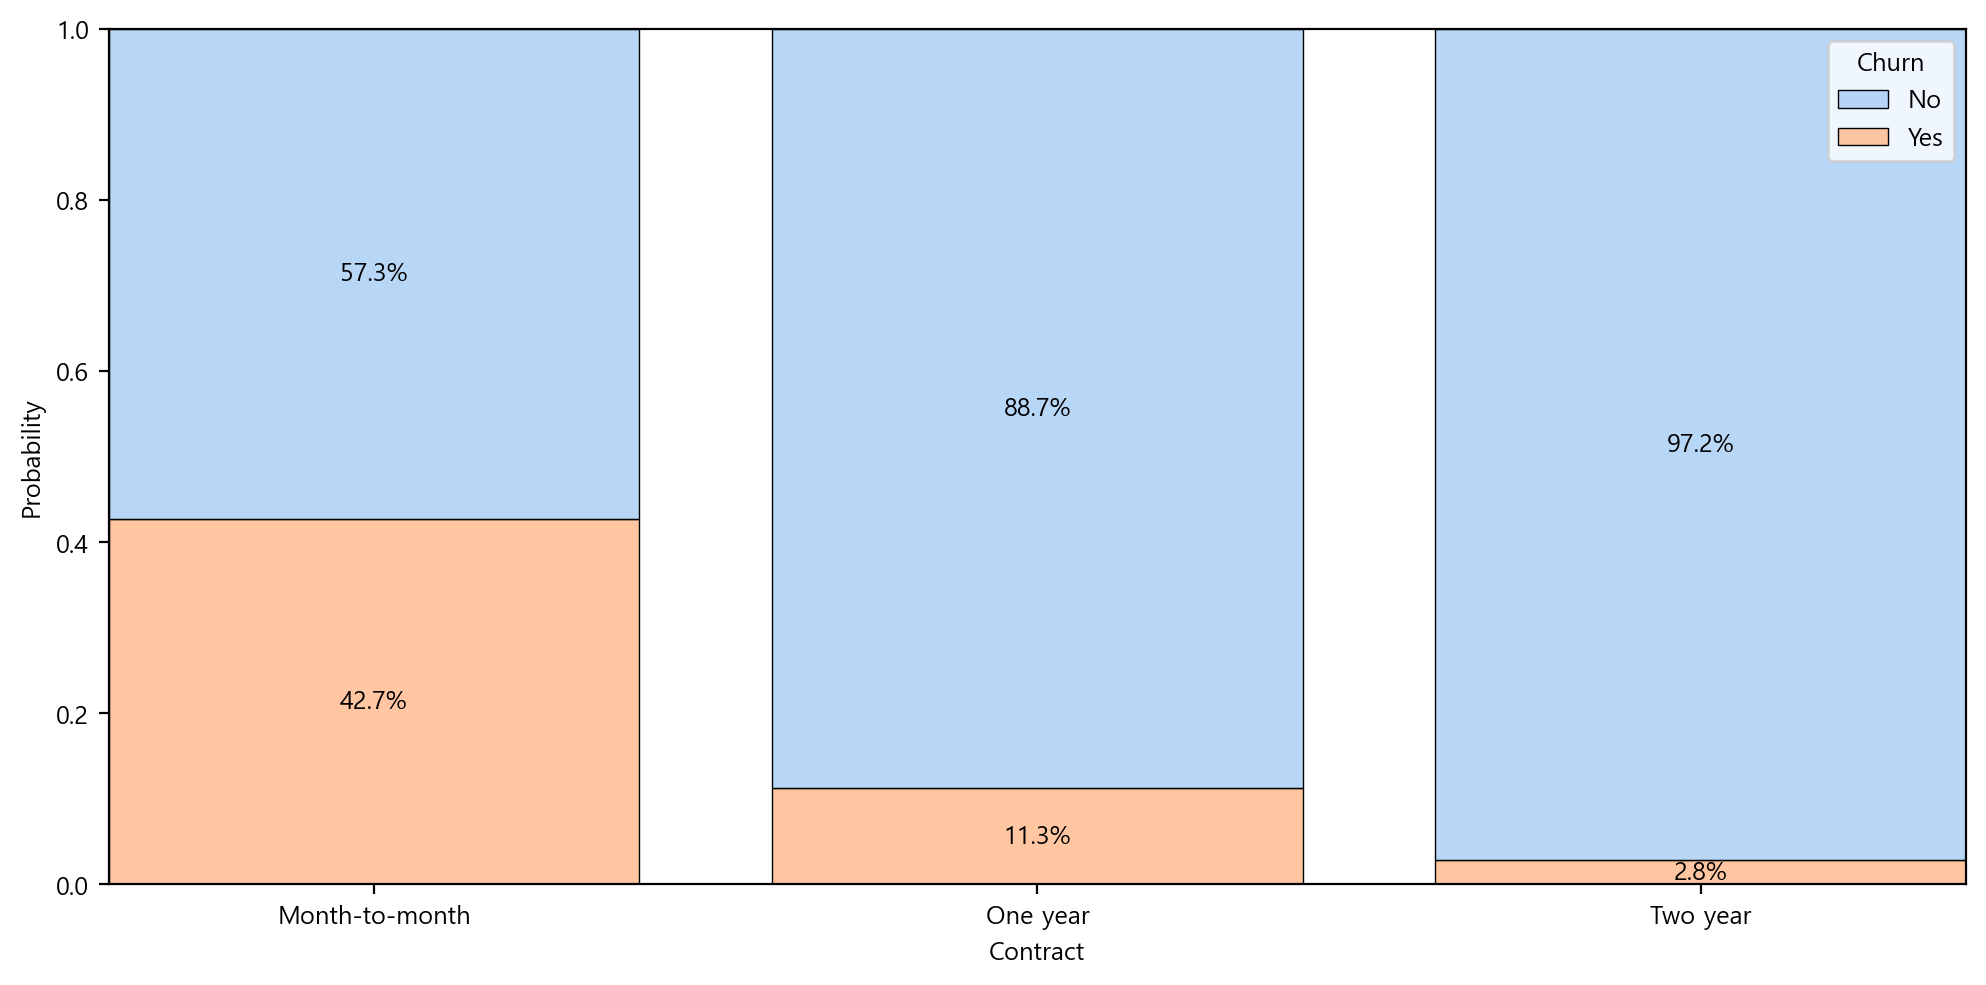

In [43]:
# my_countplot(origin, 'Contract', hue='Churn', dpi=200)
my_stackplot(origin, 'Contract', hue='Churn', dpi=200, palette="pastel")

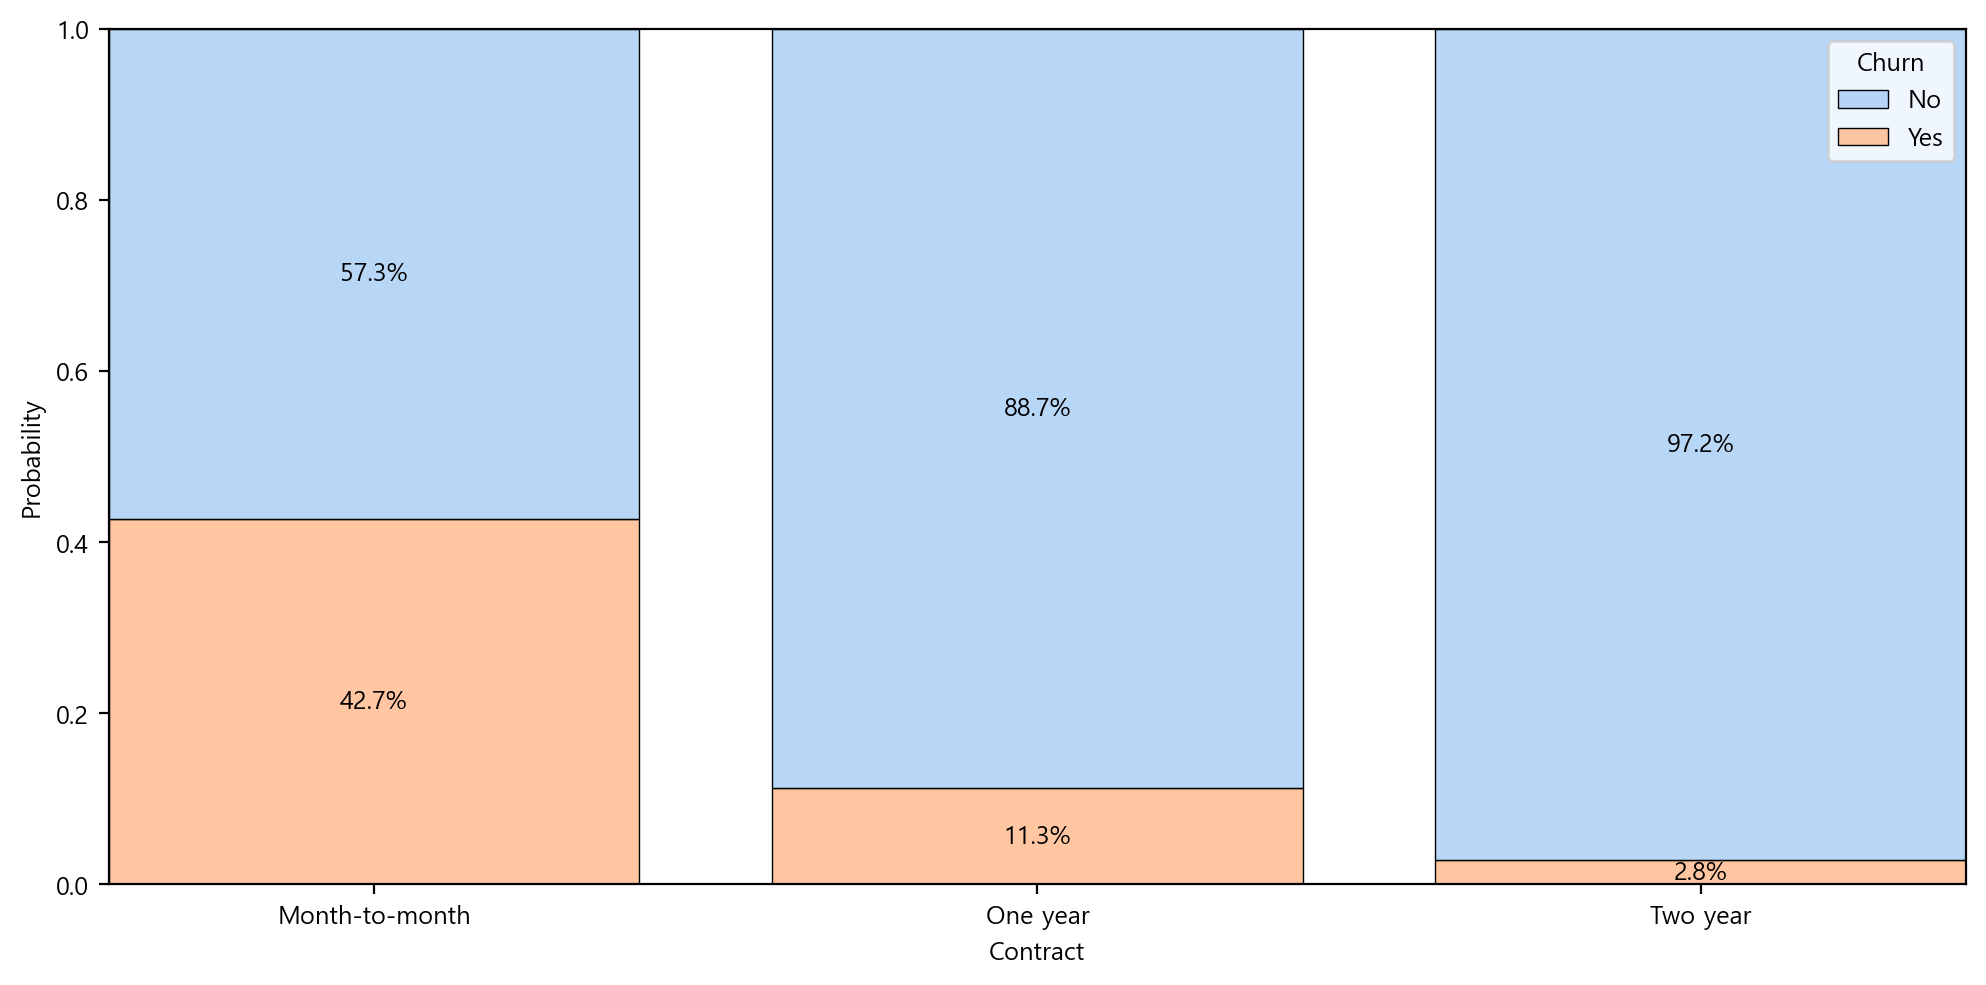

In [44]:
# my_countplot(origin, 'PaperlessBilling', hue='Churn', dpi=200)
my_stackplot(origin, 'Contract', hue='Churn', dpi=200, palette="pastel")

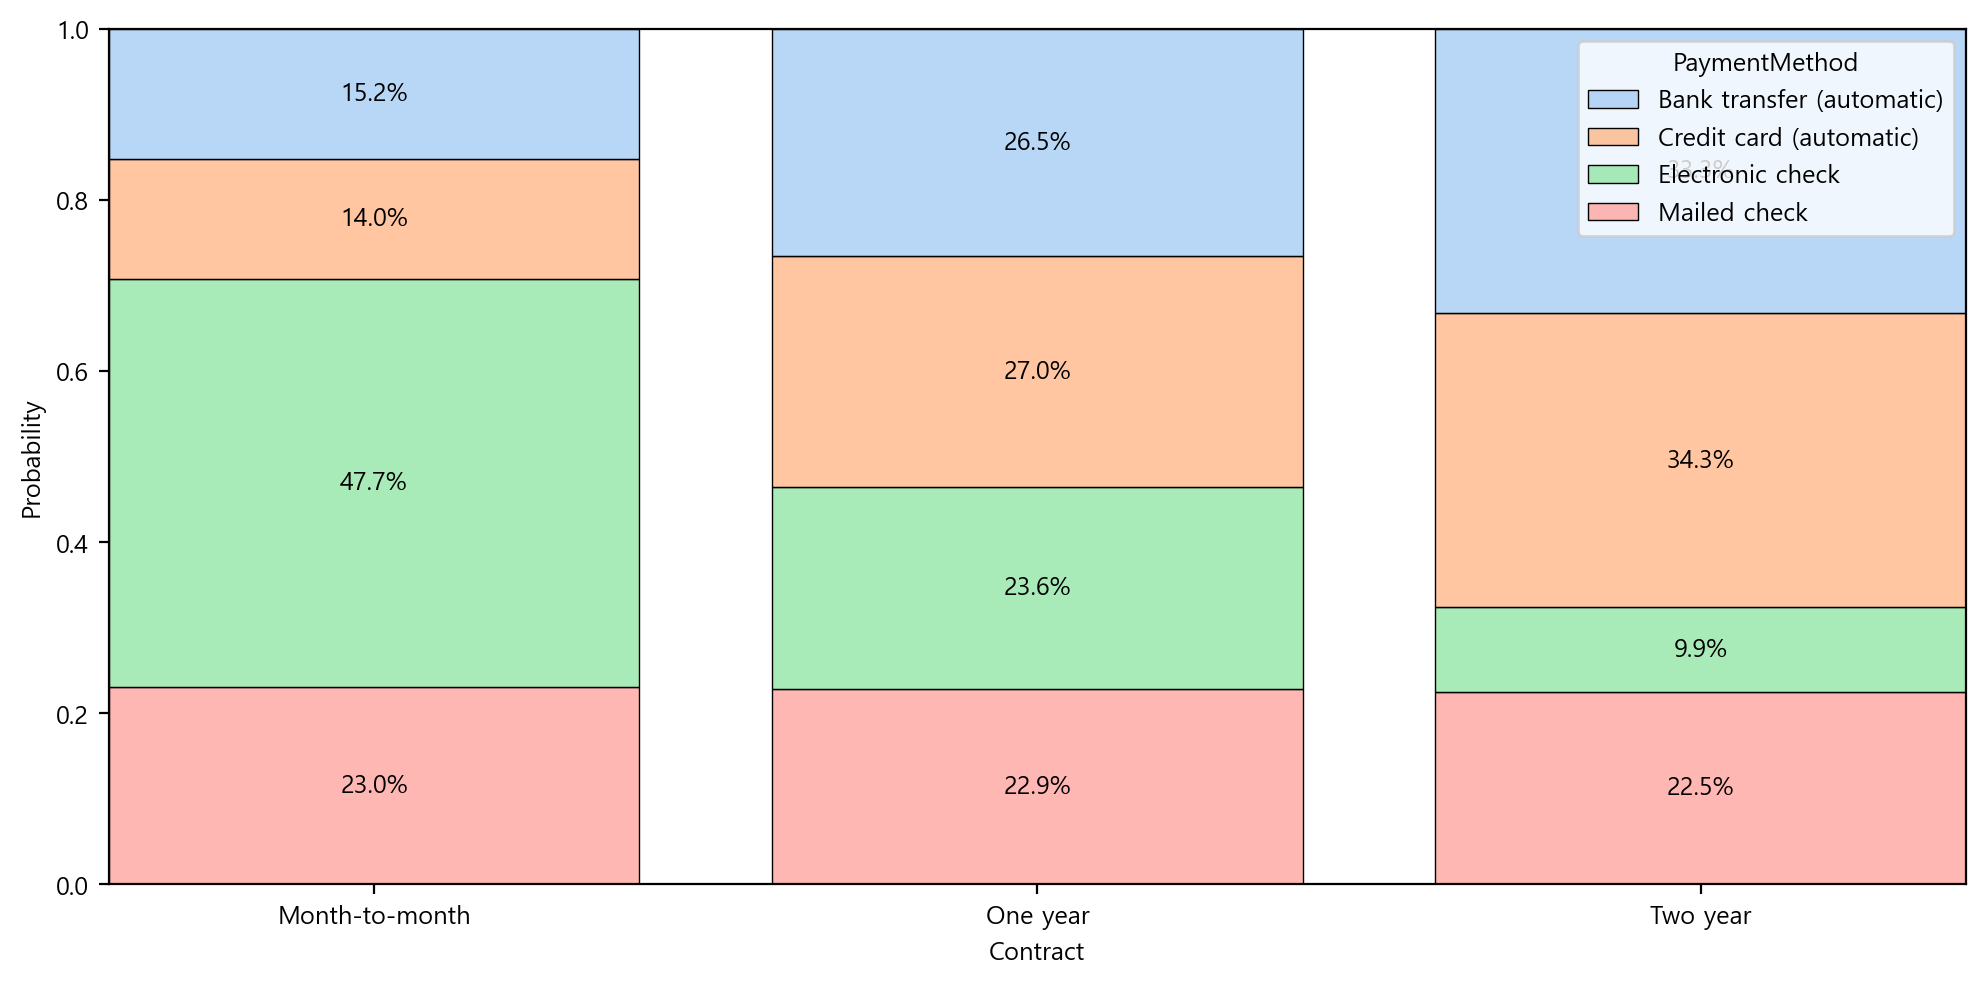

In [45]:
# my_countplot(origin, 'PaymentMethod', hue='Churn', dpi=200)
my_stackplot(origin, 'Contract', hue='PaymentMethod', dpi=200, palette="pastel")

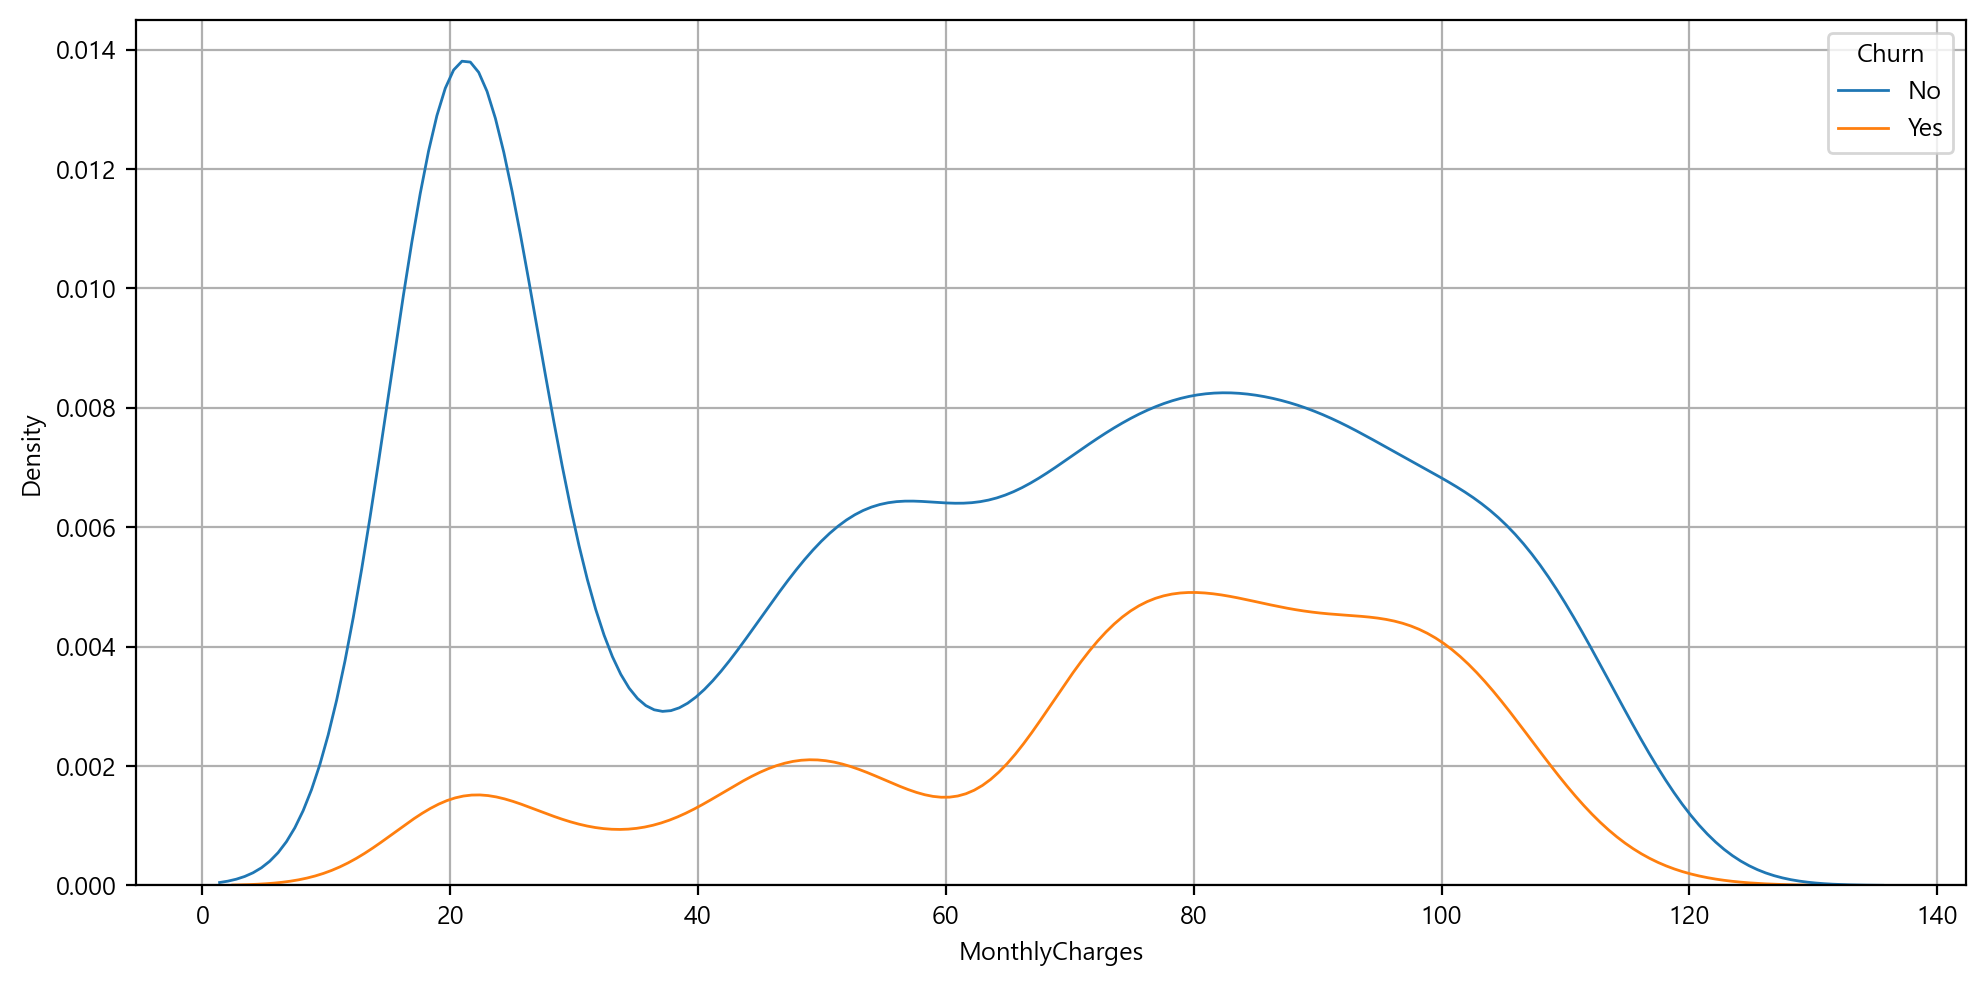

In [46]:
my_kdeplot(origin, 'MonthlyCharges', hue='Churn', dpi=200)

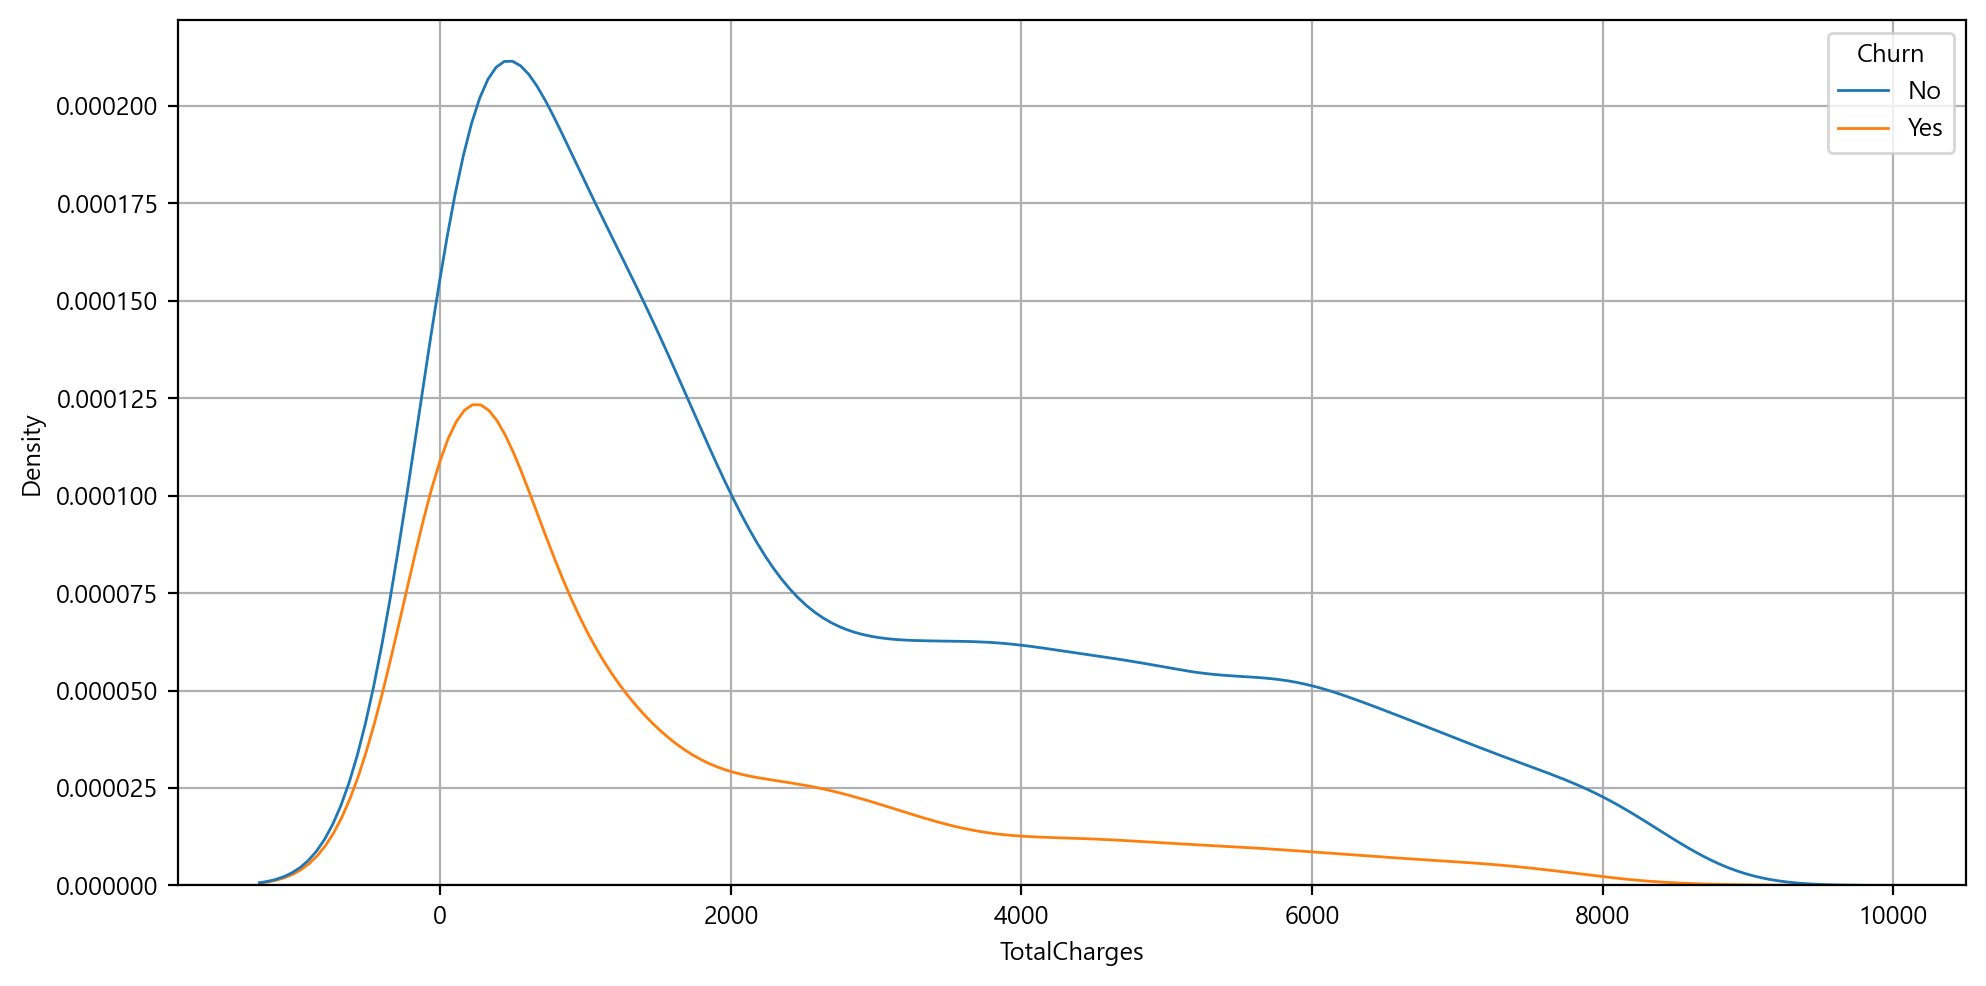

In [47]:
my_kdeplot(origin, 'TotalCharges', hue='Churn', dpi=200)

## #3 데이터 전처리

### [1] 필요없는 항목 제거

In [75]:
df = origin.copy()
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [76]:
df1 =df.copy()

In [77]:
df1.dropna(axis=0, inplace=True)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### [2] 명목변수 라벨링

In [53]:
df1 = df

In [54]:
category = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' , 'Contract', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
my_labelling(df1, category)

AttributeError: 'DataFrame' object has no attribute 'unique'

In [78]:
df= my_labelling(df1, 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' , 'Contract', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn')

In [79]:
std_df = my_standard_scaler(df1, yname='Churn')
my_pretty_table(std_df.head())

+----+-----------+------------------+----------------+----------+-----------------+-----------+--------------+----------------+------------------+-------------------+------------------+----------------+--------------------+---------------+---------------+-------------------+----------------+--------------------+---------------------------+---------+
|    |    tenure |   MonthlyCharges |   TotalCharges | gender   |   SeniorCitizen | Partner   | Dependents   | PhoneService   | MultipleLines    | InternetService   | OnlineSecurity   | OnlineBackup   | DeviceProtection   | TechSupport   | StreamingTV   | StreamingMovies   | Contract       | PaperlessBilling   | PaymentMethod             | Churn   |
|----+-----------+------------------+----------------+----------+-----------------+-----------+--------------+----------------+------------------+-------------------+------------------+----------------+--------------------+---------------+---------------+-------------------+----------------+----

In [80]:
dummy_df = my_dummies(std_df, 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' , 'Contract', 'Contract', 'PaperlessBilling', 'PaymentMethod')
my_pretty_table(dummy_df.head())

+----+-----------+------------------+----------------+---------+---------------+-------------------+---------------+------------------+--------------------+----------------------------------+---------------------+-------------------------------+----------------------+--------------------------------------+----------------------+------------------------------------+--------------------+----------------------------------------+------------------------+-----------------------------------+-------------------+-----------------------------------+-------------------+---------------------------------------+-----------------------+---------------------+---------------------+---------------------+---------------------+------------------------+-----------------------------------------+----------------------------------+------------------------------+
|    |    tenure |   MonthlyCharges |   TotalCharges | Churn   |   gender_Male |   SeniorCitizen_1 |   Partner_Yes |   Dependents_Yes |   PhoneServi

In [81]:
df2 = my_labelling(dummy_df, 'Churn')

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   float64
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7032 non-null   int32  
 4   gender_Male                            7032 non-null   uint8  
 5   SeniorCitizen_1                        7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

### [2] 훈련, 검증 데이터 분리

In [83]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Churn', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5625, 32), (1407, 32), (5625,), (1407,))

## #4 로지스틱 회귀 모형

In [84]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("훈련데이터 점수: ", model.score(x_train, y_train))
print("검증데이터 점수: ", model.score(x_test, y_test))

훈련데이터 점수:  0.8042666666666667
검증데이터 점수:  0.8102345415778252


## #5 검증데이터를 통한 추정값 생성

In [86]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])